# Aplicación del aprendizaje automático en la medicina predictiva.

## Práctica 1: Clasificación para el diagnóstico de enfermedades.



### Indice


* [1. Objetivos](#1)
  
* [2. Problema](#2)
  
* [3. Datos](#3)
  

* [4. Desarrollo de la práctica](#4)
  
* * [4.1. Carga de los datos en `R` y `Python`](#5)
  


* * [4.2. EDA en `R`](#6)
* * * [4.2.1 EDA con `skimr`](#6.1)
* * * [4.2.2 EDA con `DataExplorer`](#6.2)

* * [4.3. EDA en `Python`](#7)
  

* * * [4.3.1. Estructura del data-set](#8)
* * * [4.3.2. Resumen Estadístico Descriptivo Básico](#9)
* * * [4.3.3. Analisis gráfico general](#10)
* * * * [4.3.3.1. Histogramas de las variables cuantitativas](#11)
* * * * [4.3.3.2. Diagramas de barras de las variables categoricas](#12)
* * * * [4.3.3.3. Box-plots de las variables cuantitativas](#13)
* * * [4.3.4. Analisis de la relación entre los predictores categoricos y la respuesta](#14)
* * * * [4.3.4.1. Analisis relación entre respuesta (Diseased) y Gender](#15)
* * * * [4.3.4.2. Analisis relación entre respuesta (Diseased) y Grupo de Edad](#16)
* * * [4.3.5. Analisis de la relación entre los predictores cuantitativos y la respuesta](#17)
* * * * [4.3.5.1. Resumen Estadisticos Descriptivos Cuantitativos en funcion de la respuesta (Diseased)](#18)
* * * * [4.3.5.2. Diagrama de puntos de los predictores cuantitativos en función de la respuesta (Diseased) ](#19)
* * * * [4.3.5.3. Box-plots de los predictores cuantitativos en función de la respuesta (Diseased)](#20)


* * [4.4. Arboles de clasificación en `R`](#21)
* * * [4.4.1. Algoritmo rpart en `R`](#22)
* * * [4.4.2.  Algoritmo C50 en `R`](#23)
* * * [4.4.3. Algoritmo CART en `R` con `mlr3`](#24)
* * * [4.4.4. Algoritmo C5.0 en `R` con `mlr3`](#25)



* * [4.5. Arboles de clasificación en `Python`](#26)
* * * [4.5.1. Arboles de clasificación: teoria](#27)
* * * [4.5.2. Algoritmo de creación propia en `Python`](#28)
* * * [4.5.3. Arboles de clasificación en `Python` con `sklearn`](#29)
* * * [4.5.4. Arboles de clasificación penalizados con `sklearn`](#30)
* * * [4.5.4. Comparación final entre aroboles de clasificación por validación simple](#31)



* * [4.6. KNN para clasificación en `Python`](#32)
* * * [4.6.1. KNN para clasificación: teoria](#33)
* * * [4.6.2. Algoritmo de creación propia en `Python`](#34)
* * * [4.6.3. KNN para clasificación en `Python` con `sklearn`](#35)


* * [4.7. Comparación final entre árboles y KNN para clasificación por validación simple](#36)

----


## 1. Objetivos <a class="anchor" id="1"></a>

- Conocer un contexto de aplicación real.

- Ejercitarnos en el análisis de datos y la implementación de algoritmos de clasificación, para adquirir criterio en la aplicación de los mismos.

- Evaluar las capacidades de R y mlr para la implementación.



## 2. Problema <a class="anchor" id="2"></a>

- Resolver un problema de clasificación para el diagnóstico de pacientes hepáticos.



## 3. Datos <a class="anchor" id="3"></a>

- Usaremos el conjunto de datos “Indian Liver Patient Dataset”: Los pacientes con enfermedades del hígado han ido aumentando continuamente debido al consumo excesivo de alcohol, inhalación de gases nocivos, ingesta de alimentos contaminados, encurtidos y drogas. 

- Este conjunto de datos se utilizó para evaluar los algoritmos de predicción en un esfuerzo por reducir la cargapara los médicos. Este conjunto de datos contiene 416 registros de pacientes hepáticos y 167 registros de pacientes no hepáticos recopilados en el noreste de Andhra Pradesh, India.

- La variable de respuesta es “diseased” (personas que tienen enfermedad del hígado)

- El data set encuentra en la librería “mlr3data”. 
data("ilpd", package = "mlr3data")



## 4. Desarrollo de la práctica <a class="anchor" id="4"></a>


Vamos a desarrollar esta práctica en los lenguajes de programación `R` y `Python` simultaneamente. 

En general lo haremos a través el lenguaje `Python` utilizando un paquete llamado `rpy2` que permite ejecutar codigo `R` desde `Python` 

### 4.1. Carga de los datos <a class="anchor" id="5"></a>


Empezamos la práctica cargando los datos, tanto en `R` como en `Python` :

Importamos en Python la libreria rpy2 que nos será esencial para trabajar con R y Python simultaneamente desde el mismo entorno:

In [303]:
import rpy2

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [304]:
%%R

# install.packages("mlr3data")
# install.packages("mlr3")

NULL


Cargamos los datos en `R`

In [305]:
%%R

data("ilpd", package = "mlr3data")

head(ilpd,5)

  age gender total_bilirubin direct_bilirubin alkaline_phosphatase
1  65 Female             0.7              0.1                  187
2  62   Male            10.9              5.5                  699
3  62   Male             7.3              4.1                  490
4  58   Male             1.0              0.4                  182
5  72   Male             3.9              2.0                  195
  alanine_transaminase aspartate_transaminase total_protein albumin
1                   16                     18           6.8     3.3
2                   64                    100           7.5     3.2
3                   60                     68           7.0     3.3
4                   14                     20           6.8     3.4
5                   27                     59           7.3     2.4
  albumin_globulin_ratio diseased
1                   0.90      yes
2                   0.74      yes
3                   0.89      yes
4                   1.00      yes
5                   

Cargamos los datos en `Python`

In [306]:
import warnings
warnings.filterwarnings("ignore")

In [307]:
import pandas as pd

In [308]:
Data_Python = pd.read_csv('indian_liver_patient.csv')

In [309]:
Data_Python = Data_Python.rename({'Dataset': 'Diseased'}, axis=1)

In [310]:
Data_Python.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diseased
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Describiremos cada una de las variables:**

- age: edad del paciente. A los pacientes que exceden 89 son listados con la edad 90
- gender: género del paciente.
- total_bilirubin: Total de bilirubina.
- direct_bilirubin: Bilirubina directa.
- alkaline_phosphatase: Fosfatasa alcalina.
- alanine_transaminase: alanina aminotransferasa o transamisana glutámico pirúvica.
- aspartate_trasaminase: aspartato aminotransferasa.
- total_protein: proteinas totales.
- albumin: albúmina.
- albumin_globulin_ratio: albúmina y globulina ratio.
- diseased: Si tienen (1) o no (2) enfermadad en el hígado.



Ahora que ya tenenmos cargados los datos y hemos visto la apariencia de los mismo procedemos a hacer un EDA (exploratory data analysis).


## 4.2. EDA en `R` <a class="anchor" id="6"></a>


### 4.2.1. EDA con `skimr` <a class="anchor" id="6"></a>



Haremos el EDA con la librería `skimr`, como se pide en el enunciado de la práctica.


In [311]:
%%R

# install.packages('skimr')

NULL


In [312]:
%%R

library(skimr) # Cargamos librería

skim(ilpd) # EDA con librería

-- Data Summary ------------------------
                           Values
Name                       ilpd  
Number of rows             583   
Number of columns          11    
_______________________          
Column type frequency:           
  factor                   2     
  numeric                  9     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 gender                0             1 FALSE          2 Mal: 441, Fem: 142
2 diseased              0             1 FALSE          2 yes: 416, no: 167 

-- Variable type: numeric ------------------------------------------------------
  skim_variable          n_missing complete_rate    mean      sd   p0   p25
1 age                            0             1  44.7    16.2    4    33  
2 total_bilirubin                0             1   3.30    6.21   0.4   0.8


También haremos uso de la función `str()` que nos da la estructura de nuestro dataset.


In [313]:
%%R

str(ilpd) # Analizamos la estructura de los datos

'data.frame':	583 obs. of  11 variables:
 $ age                   : int  65 62 62 58 72 46 26 29 17 55 ...
 $ gender                : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 1 1 2 2 ...
 $ total_bilirubin       : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ direct_bilirubin      : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ alkaline_phosphatase  : int  187 699 490 182 195 208 154 202 202 290 ...
 $ alanine_transaminase  : int  16 64 60 14 27 19 16 14 22 53 ...
 $ aspartate_transaminase: int  18 100 68 20 59 14 12 11 19 58 ...
 $ total_protein         : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ albumin               : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ albumin_globulin_ratio: num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ diseased              : Factor w/ 2 levels "yes","no": 1 1 1 1 1 1 1 1 2 1 ...



Claramente podemos ver como con skimr, las variables que son numéricas las considera todas numéricas, mientras que la función str nos especifica las variables numéricas en si son variables que toman valores reales o enteros.


### 4.2.2. EDA con `DataExplorer` <a class="anchor" id="6"></a>



Por último sacaremos un reporte con la librería "DataExplorer"


In [314]:
%%R

# install.packages('DataExplorer')

NULL


In [315]:
%%R

# DataExplorer::create_report(ilpd,y="diseased") # Reporte EDA en html, no se pide como tal.

NULL


Se genera un reporte en HTML que puede ser abierto en el navegador. 



Aqui esta la version en PDF de dicho reporte:

https://github.com/FabioScielzoOrtiz/Estadistica4all.github.io/blob/main/Notebooks/Aprendizaje%20Automatico/Data%20Profiling%20Report.pdf


Aunque hemos visto el número de valores ausentes en la salida que nos da skimr, esto se puede hacer a mano como sigue:


In [316]:
%%R

library(tidyverse)

In [317]:
%%R 

ilpd %>% map_dbl(.f = function(x){sum(is.na(x))}) # Número de missing values

                   age                 gender        total_bilirubin 
                     0                      0                      0 
      direct_bilirubin   alkaline_phosphatase   alanine_transaminase 
                     0                      0                      0 
aspartate_transaminase          total_protein                albumin 
                     0                      0                      0 
albumin_globulin_ratio               diseased 
                     0                      0 



Podemos sacar las siguientes conclusiones del EDA anterior:
- Se dispone de 583 instancias y 11 variables (2 de tipo factor biclase, 5 de tipo numérico y 4 enteras)
- No hay ausencia de valores por lo que no habrá que eliminar instancias o al menos los modelos no se verán dificultados por los mismos.
- La variable respuesta es diseased que es una de las variables tipo factor biclase que puede tomar valores "yes" o "no". Se puede ver como esta variable está un poco desbalanceada ya que tenemos muchas más observaciones con valor "yes"(416 observaciones) que con valor "no"(167 observaciones).
- En cuanto a las correlaciones se puede ver que son relativamente altas entre los pares que tienen que ver con sustancias similares, como bilirubina directa y bilirubina total. Con respecto a la variable respuesta podemos ver como hay relaciones directas con el resto de variables y una correlacion similar en torno a 0.7.




## 4.3. EDA en `Python` <a class="anchor" id="7"></a>


Ahora vamos a realizar un EDA del data-set pero usando `Python`

El EDA (Exploratory Data Analysis) en lineas generales va a consistir en:

- Analizar estructura del data-set que tenemoss (dimensiones, tipo de variables, valores faltantes, etc)
- Cálculo de estadísticos básicos para cada variable
-  Generación de gráficos que aporten información relevante (histogramas, diagramas de barras, scatter plots, box plots, etc)
- Análisis de relaciones entre los predictores y la respuesta.


### 4.3.1. Estructura del data-set <a class="anchor" id="8"></a>

In [318]:
import warnings
warnings.filterwarnings("ignore")

In [319]:
Data_Python.shape

(583, 11)

Tenemos un data-set con 11 variables y 583 observaciones.

Las variables son:

- 10 predictores (age , gender , Total_Bilirubin , Direct_Bilirubin , Alkaline_Phosphotase , Alamine_Aminotransferase , Aspartate_Aminotransferase ,Total_Protiens , Albumin , Albumin_and_Globulin_Ratio ) 
  
- 1 respuesta ( Diseased )

La variables **categoricas** del data-set son: 

- Diseased y Gender (*binarias*)

Las variables **cuantitativas** del data-set son: 

- age , Alkaline_Phosphotase, Alamine_Aminotransferase  , Aspartate_Aminotransferase (*discretas*) y   Total_Bilirubin , Direct_Bilirubin, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio (*continuas*)

Con el siguiente código podemos ver el tipo de cada una de las variables en Python (que podría no coincidir con el descrito anteriormente, en su caso habría que modificarlo.)

In [320]:
Data_Python.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Diseased                    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


En este caso el tipo en Python es correcto para todas las variables salvo para la respuesta (Diseased) ya que Python la considera entera (cuantitativa discreta: int64) cuando realmente es categórica binaria, por ello tranformamos su tipo de int64 a object (el tipo clasico de las variables categoricas en Python).

In [321]:
Data_Python['Diseased'] = Data_Python['Diseased'].astype('object')

Comprobamos que los cambios se han producido correctamente:

In [322]:
Data_Python.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Diseased                    583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


Ahora vamos a ver si existe algún valor nulo en el data-set:

In [323]:
Data_Python.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Diseased                      0
dtype: int64

Ninguna de las variables tiene valores faltantes (nulos).

Ahora vamos a ver cual es el rango de las variables categoricas, y posteriormete lo codificaremos en formato estandar $\lbrace 0,1,2,...\rbrace$ , si es que no lo están ya.

In [324]:
Data_Python['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [325]:
Data_Python['Diseased'].unique()

array([1, 2], dtype=object)

Vamos a codificar en formato estandar la variable **Gender** tal que: **Female=0** , **Male=1** , y la variable **Diseased** tal que: **1=0** , **2=1**

Para ello vamos a apoyarnos en la libreria `sklearn`, que posteriormente volverá a ser usada. Se podría hacer esto de otras formas, como con un bucle for, pero en casos en los que el número de categorias es alto, la opción aportada por `sklearn` es bastante más eficiente que un bucle.

In [326]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [327]:
Data_Python['Gender'] = ord_enc.fit_transform(Data_Python[['Gender']])

Data_Python['Diseased'] = ord_enc.fit_transform(Data_Python[['Diseased']])

Comprobamos que los cambios se han realizado correctamente:

In [328]:
Data_Python['Gender'].unique()

array([0., 1.])

In [329]:
Data_Python['Diseased'].unique()

array([0., 1.])

Pero cuidado, tras realizar estos cambios tambien se cambia en Python el tipo de las variables codificadas a 'float64' , que es un tipo cuantitativo (continuo), por lo que debemos volver a fijar el tipo de Diseased y Gender como 'object' (ya que son categoricas).

In [330]:
Data_Python.dtypes

Age                             int64
Gender                        float64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Diseased                      float64
dtype: object

In [331]:
Data_Python['Diseased'] = Data_Python['Diseased'].astype('object')
Data_Python['Gender'] = Data_Python['Gender'].astype('object')

Verificamos que se han realizado correctamente los cambios:

In [332]:
Data_Python.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Diseased                       object
dtype: object

### 4.3.2. Resumen Estadístico Descriptivo Básico <a class="anchor" id="9"></a>

Ahora vamos a hacer una descripcion estadística básica de las variables del data-set:

In [333]:
Data_Python.describe(include='all') # include='all' para dar un tratamiento diferente a las categoricas que a las cuantitativas

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diseased
count,583.000000,583.0,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.0
unique,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.0
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,NaN
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,NaN
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,NaN
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,NaN
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,NaN
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,NaN


### 4.3.3. Análisis gráfico general <a class="anchor" id="10"></a>

#### 4.3.3.1. Histogramas para las variables cuantitativas <a class="anchor" id="11"></a>

In [334]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

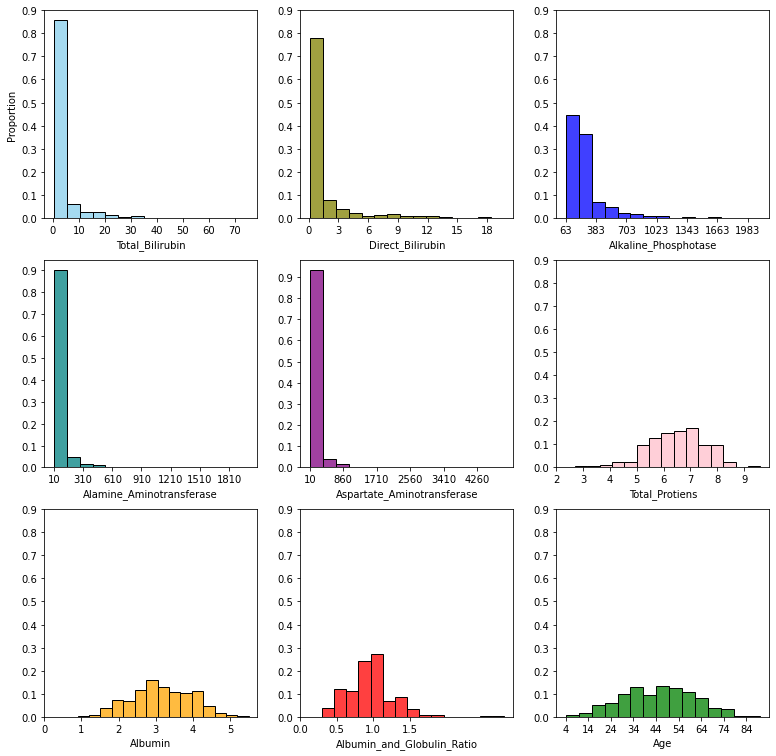

In [335]:
fig, axs = plt.subplots(3, 3, figsize=(13, 13))

p1 = sns.histplot(data=Data_Python, x="Total_Bilirubin", stat="proportion", bins=15, color="skyblue", ax=axs[0, 0])
p1.set_xticks( range(int(Data_Python['Total_Bilirubin'].min()) , int(Data_Python['Total_Bilirubin'].max()) , 10) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.histplot(data=Data_Python, x="Direct_Bilirubin", stat="proportion", bins=15, color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='Direct_Bilirubin', ylabel=' ')
p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 3) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p3 = sns.histplot(data=Data_Python, x="Alkaline_Phosphotase", stat="proportion", bins=15, color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='Alkaline_Phosphotase', ylabel=' ')
p3.set_xticks( range(int(Data_Python['Alkaline_Phosphotase'].min()) , int(Data_Python['Alkaline_Phosphotase'].max()) , 320) )
p3.set_yticks( np.arange(0, 1, 0.1)  )

p4 = sns.histplot(data=Data_Python, x="Alamine_Aminotransferase", stat="proportion", bins=15, color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='Alamine_Aminotransferase', ylabel=' ')
p4.set_xticks( range(int(Data_Python['Alamine_Aminotransferase'].min()) , int(Data_Python['Alamine_Aminotransferase'].max()) , 300) )
p4.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.histplot(data=Data_Python, x="Aspartate_Aminotransferase", stat="proportion", bins=15, color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='Aspartate_Aminotransferase', ylabel=' ')
p5.set_xticks( range(int(Data_Python['Aspartate_Aminotransferase'].min()) , int(Data_Python['Aspartate_Aminotransferase'].max()) , 850) )
p5.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.histplot(data=Data_Python, x="Total_Protiens", stat="proportion", bins=15, color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='Total_Protiens', ylabel=' ')
p6.set_xticks( range(int(Data_Python['Total_Protiens'].min()) , int(Data_Python['Total_Protiens'].max()+1) , 1) )
p6.set_yticks( np.arange(0, 1, 0.1)  )

p7 = sns.histplot(data=Data_Python, x="Albumin", stat="proportion", bins=15, color="orange", ax=axs[2, 0])
p7.axes.set(xlabel='Albumin', ylabel=' ')
p7.set_xticks( range(int(Data_Python['Albumin'].min()) , int(Data_Python['Albumin'].max()+1) , 1) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

p8 = sns.histplot(data=Data_Python, x="Albumin_and_Globulin_Ratio", stat="proportion", bins=15, color="red", ax=axs[2, 1])
p8.axes.set(xlabel='Albumin_and_Globulin_Ratio', ylabel=' ')
p8.set_xticks( np.arange(0, 2, 0.5)  )
p8.set_yticks( np.arange(0, 1, 0.1)  )

p9 = sns.histplot(data=Data_Python, x="Age", stat="proportion", bins=15, color="green", ax=axs[2, 2])
p9.axes.set(xlabel='Age', ylabel=' ')
p9.set_xticks( range(int(Data_Python['Age'].min()) , int(Data_Python['Age'].max()) , 10) )
p9.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

#### 4.3.3.2. Diagramas de barras para las variables categóricas <a class="anchor" id="12"></a>

Ahora vamos a realizar una serie de operaciones para generar dos diagramas de barrras, uno para la variable Gender y otro para Diseased.

In [336]:
proportion_Female = len( Data_Python.loc[ Data_Python['Gender']==0 , :] ) / len(Data_Python)
proportion_Male = len( Data_Python.loc[ Data_Python['Gender']==1 , :] ) / len(Data_Python)

proportion_Diseased_yes = len( Data_Python.loc[ Data_Python['Diseased']==0 , :] ) / len(Data_Python)
proportion_Diseased_no = len( Data_Python.loc[ Data_Python['Diseased']==1 , :] ) / len(Data_Python)

In [337]:
Data_Python['proportion_Gender'] = 0


for i in range(0, len(Data_Python)):

    if Data_Python['Gender'][i] == 0 :

        Data_Python['proportion_Gender'][i] = proportion_Female

    else :

        Data_Python['proportion_Gender'][i] = proportion_Male

In [338]:
Data_Python['proportion_Diseased'] = 0


for i in range(0, len(Data_Python)):

    if Data_Python['Diseased'][i] == 0 :

        Data_Python['proportion_Diseased'][i] = proportion_Diseased_yes

    else :

        Data_Python['proportion_Diseased'][i] = proportion_Diseased_no

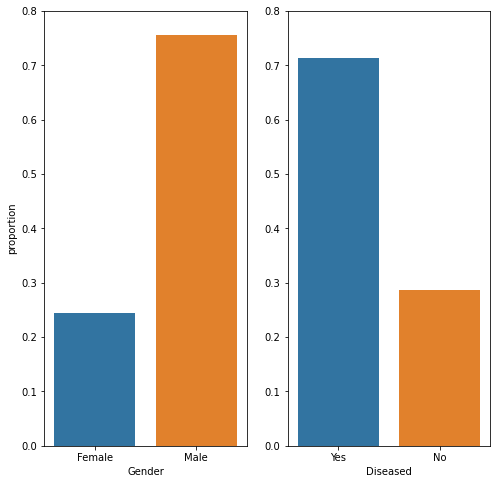

In [339]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

p1 = sns.barplot(x='Gender', y='proportion_Gender', data=Data_Python, ax=axs[0]) 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Female', 'Male'])
p1.axes.set(xlabel='Gender', ylabel='proportion')

p2 = sns.barplot(x='Diseased', y='proportion_Diseased', data=Data_Python, ax=axs[1]) 
p2.set_yticks( np.arange(0, 0.85, 0.1)  )
p2.set_xticklabels(['Yes', 'No'])
p2.axes.set(xlabel='Diseased', ylabel=' ')

plt.show()

In [340]:
[ proportion_Female , proportion_Male ]

[0.24356775300171526, 0.7564322469982847]

In [341]:
[ proportion_Diseased_yes , proportion_Diseased_no ]

[0.7135506003430532, 0.2864493996569468]

Como puede verse el porcentaje de mujeres en la muestra es del 24.36% , mientras que el de hombres es del 75.64%

Por otro lado el porcentaje de endfermos es del71.36%, mientras que el de no enfermos es del 28.64%

#### 4.3.3.3. Box-plots para las variables cuantitativas  <a class="anchor" id="13"></a>

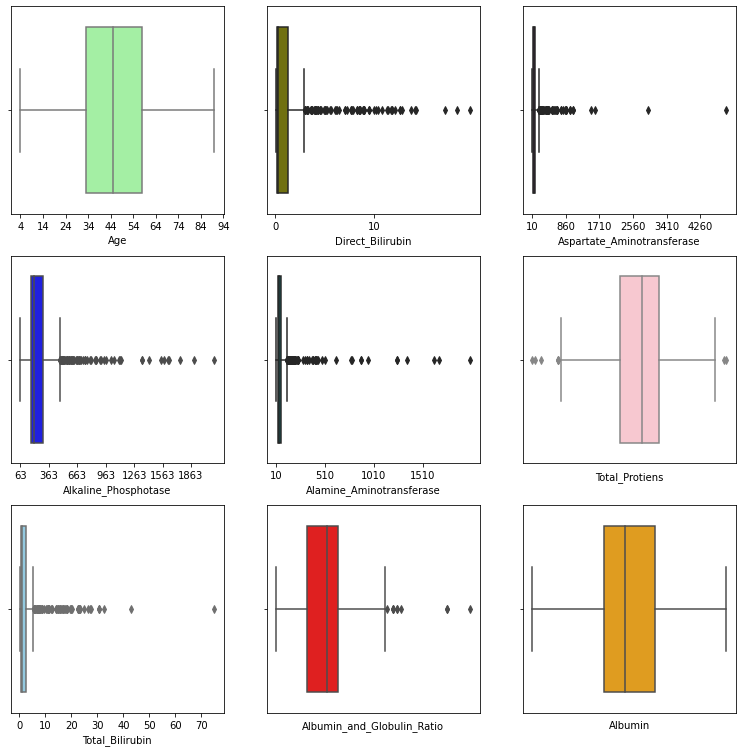

In [342]:
fig, axs = plt.subplots(3, 3, figsize=(13, 13))

p1 = sns.boxplot(x=Data_Python['Age'], color="palegreen", ax=axs[0, 0])
p1.set_xticks( range(int(Data_Python['Age'].min()) , int(Data_Python['Age'].max()+10) , 10) )

p2 = sns.boxplot(x=Data_Python['Direct_Bilirubin'], color="olive", ax=axs[0, 1])
p2.set_xticks( range(int(Data_Python['Direct_Bilirubin'].min()) , int(Data_Python['Direct_Bilirubin'].max()) , 10) )

p3 = sns.boxplot(x=Data_Python['Alkaline_Phosphotase'], color="blue", ax=axs[1, 0])
p3.set_xticks( range(int(Data_Python['Alkaline_Phosphotase'].min()) , int(Data_Python['Alkaline_Phosphotase'].max() ) , 300) )

p4 = sns.boxplot(x=Data_Python['Alamine_Aminotransferase'], color="teal", ax=axs[1, 1])
p4.set_xticks( range(int(Data_Python['Alamine_Aminotransferase'].min()) , int(Data_Python['Alamine_Aminotransferase'].max()) , 500) )

p5 = sns.boxplot(x=Data_Python['Aspartate_Aminotransferase'], color="purple", ax=axs[0, 2])
p5.set_xticks( range(int(Data_Python['Aspartate_Aminotransferase'].min()) , int(Data_Python['Aspartate_Aminotransferase'].max()) , 850) )

p6 = sns.boxplot(x=Data_Python['Total_Protiens'], color="pink", ax=axs[1, 2])
p6.set_xticks( range(int(Data_Python['Total_Protiens'].min()) , int(Data_Python['Total_Protiens'].max()) , 10) )

p7 = sns.boxplot(x=Data_Python['Albumin'], color="orange", ax=axs[2, 2])
p7.set_xticks( range(int(Data_Python['Albumin'].min()) , int(Data_Python['Albumin'].max()) , 10) )

p8 = sns.boxplot(x=Data_Python['Albumin_and_Globulin_Ratio'], color="red", ax=axs[2, 1])
p8.set_xticks( range(int(Data_Python['Albumin_and_Globulin_Ratio'].min()) , int(Data_Python['Albumin_and_Globulin_Ratio'].max()) , 10) )

p9 = sns.boxplot(x=Data_Python['Total_Bilirubin'], color="skyblue", ax=axs[2, 0])
p9.set_xticks( range(int(Data_Python['Total_Bilirubin'].min()) , int(Data_Python['Total_Bilirubin'].max()) , 10) )


plt.show()

### 4.3.4. Análisis de la relación entre los predictores categoricos y la respuesta <a class="anchor" id="14"></a>

#### 4.3.4.1. Analisis relación entre respuesta (Diseased) y Gender <a class="anchor" id="15"></a>

**Frecuencia relativa de genero condicionada a enfermedad**

Ahora vamos a realizar una serie de operaciones para obtener una tabla de frecuencias relativas de la variable Gender condicionada a la respuesta (Diseased). También obtendremos el gráfico de barras asociado a esta tabla.

In [343]:
Df_Diseased_Yes = Data_Python.loc[ Data_Python['Diseased']==0 , :] 

proportion_Female_in_Diseased_Yes = len( Df_Diseased_Yes.loc[Df_Diseased_Yes['Gender']==0 , :] ) / len(Df_Diseased_Yes)

####################

Df_Diseased_Yes = Data_Python.loc[ Data_Python['Diseased']==0 , :] 

proportion_Male_in_Diseased_Yes = len( Df_Diseased_Yes.loc[Df_Diseased_Yes['Gender']==1 , :] ) / len(Df_Diseased_Yes)

####################

Df_Diseased_No = Data_Python.loc[ Data_Python['Diseased']==1 , :] 

proportion_Female_in_Diseased_No = len( Df_Diseased_No.loc[Df_Diseased_No['Gender']==0 , :] ) / len(Df_Diseased_No)

####################

Df_Diseased_No = Data_Python.loc[ Data_Python['Diseased']==1 , :] 

proportion_Male_in_Diseased_No = len( Df_Diseased_No.loc[Df_Diseased_No['Gender']==1 , :] ) / len(Df_Diseased_No)


Función para calcular tablas de frecuencias relativas condicionadas con dos variables:

In [344]:
def Table_Con_Rel_Freq_2_Var_Py (df, var1, p1, p2, var1_name='var1' , var2_name='var2') :

    table = np.zeros(( p2+1 , p1+1 ))
    table[:] = np.nan

##########################################################

    for i in range(0, p2+1):
        for j in range(0, p1+1):

            df_new = df.loc[ var1 == j   , : ]

            table[i,j] = len( df_new.loc[ df_new[var2_name] == i , :] ) / len(df_new)
    
    table = pd.DataFrame(table)

    return table

In [345]:
Frec_Relativas_Condicionadas_Gender_in_Diseased = Table_Con_Rel_Freq_2_Var_Py (Data_Python, Data_Python['Diseased'], 1, 1, var1_name='Diseased' , var2_name='Gender')

Frec_Relativas_Condicionadas_Gender_in_Diseased.index = ['Female' , 'Male']
Frec_Relativas_Condicionadas_Gender_in_Diseased.columns = ['Yes' , 'No']
Frec_Relativas_Condicionadas_Gender_in_Diseased = Frec_Relativas_Condicionadas_Gender_in_Diseased.style.set_caption("Gender  |  Diseased ")

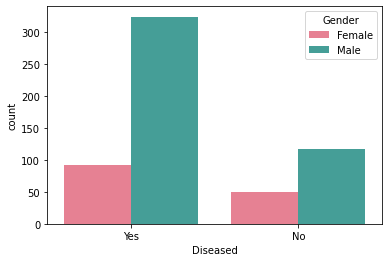

In [346]:
p1 = sns.countplot(data=Data_Python, x="Diseased", hue="Gender", palette="husl")
p1.set_xticklabels(['Yes', 'No'])
p1.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

In [347]:
Frec_Relativas_Condicionadas_Gender_in_Diseased

,Yes,No
Female,0.221154,0.299401
Male,0.778846,0.700599


In [348]:
[proportion_Female_in_Diseased_Yes , proportion_Male_in_Diseased_Yes]

[0.22115384615384615, 0.7788461538461539]

In [349]:
[proportion_Female_in_Diseased_No , proportion_Male_in_Diseased_No]

[0.2994011976047904, 0.7005988023952096]

Como puede observarse el porcentaje de mujeres dentro del grupo de los enfermos es del 22.12% , mientras que el de hombres es del 77.88%.

Por otro lado el porcentaje de mujeres dentro del grupo de los no enfermos es del 29.94%, mientras que el de hombres es del 70.06%

**Frecuencia relativa de enfermedad condicionada al genero**

Ahora vamos a realizar una serie de operaciones para obtener una tabla de frecuencias relativas de la variable respuesta (Diseased) condicionada a la variable Gender . También obtendremos el gráfico de barras asociado a esta tabla.

In [350]:
Frec_Relativas_Condicionadas_Diseased_in_Gender = Table_Con_Rel_Freq_2_Var_Py (Data_Python, Data_Python['Gender'], 1, 1, var1_name='Gender' , var2_name='Diseased')
Frec_Relativas_Condicionadas_Diseased_in_Gender.index = ['Yes' , 'No']
Frec_Relativas_Condicionadas_Diseased_in_Gender.columns = ['Female' , 'Male']
Frec_Relativas_Condicionadas_Diseased_in_Gender = Frec_Relativas_Condicionadas_Diseased_in_Gender.style.set_caption("Diseased | Gender")

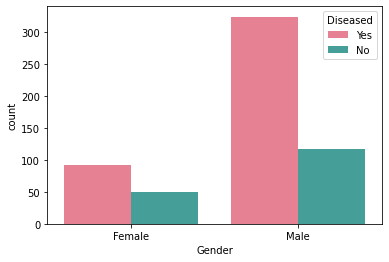

In [351]:
p = sns.countplot(data=Data_Python, x="Gender", hue="Diseased", palette="husl")
p.set_xticklabels(['Female', 'Male'])
p.legend(title='Diseased', loc='upper right', labels=['Yes', 'No'])

In [352]:
Frec_Relativas_Condicionadas_Diseased_in_Gender

,Female,Male
Yes,0.647887,0.734694
No,0.352113,0.265306


Como puede observarse el porcentaje de enfermos dentro del grupo de as mujeres es del 64.79% , mientras que el de no enfermos es del 35.21%.

Por otro lado el porcentaje de enfermos dentro del grupo de los hombres es del 73.47%, mientras que el de no enfermos es del 26.53%

#### 4.3.4.2. Analisis relación entre respuesta (Diseased) y Grupo de Edad <a class="anchor" id="16"></a>

**Frecuecnia relativa de enfermedad en funcion del grupo de edad**

Tenemos que categorizar la variable cuantitativa Age (edad) , para ello debemos emplear una regla de categorización (mediana, media, cuartiles, Scott ...)

Usaremos la regla de los cuartiles por simplicidad:

In [353]:
intervals = np.quantile( Data_Python['Age'] , [0, 0.25, 0.5, 0.75 , 1])
intervals

array([ 4., 33., 45., 58., 90.])

Nos apoyaremos en la funcion `cut()` de la libreria `Pandas` para categorizar la variable Age usando la regla de los cuartiles.

A esta función le das un vector (bins) y construye unos intervalos con los elementos del vector, en este caso (3, 33], (33, 45], (45, 58], (58, 90]. Luego te devuelve a qué intervalo pertenece cada observación de una variable dada (en nuestro caso Age), y también nos permite codificar estos intervalos con la codificacion estandar (0,1,2,...), y así obtener una nueva variable que es una versión categorizada de la variable pasada (Age en nuestro caso).

Vamos a restar una cantidad positiva (por ejemplo 1) al mínimo de Age, puesto que ese valor será el extremo inferior del primer intervalo, y dicho intervalo será abierto en ese extremo (por configuración de la función `cut`), por tanto si no restasemos una cantidad positiva, el valor mínimo de Age no estaría en ninguno de los intervalos generados por `cut()`

In [354]:
intervals[0] =  intervals[0] - 1

intervals

array([ 3., 33., 45., 58., 90.])

In [355]:
pd.cut(x=Data_Python['Age'] , bins=intervals , right=True)

0      (58.0, 90.0]
1      (58.0, 90.0]
2      (58.0, 90.0]
3      (45.0, 58.0]
4      (58.0, 90.0]
           ...     
578    (58.0, 90.0]
579    (33.0, 45.0]
580    (45.0, 58.0]
581     (3.0, 33.0]
582    (33.0, 45.0]
Name: Age, Length: 583, dtype: category
Categories (4, interval[float64, right]): [(3.0, 33.0] < (33.0, 45.0] < (45.0, 58.0] < (58.0, 90.0]]

In [356]:
pd.cut(x=Data_Python['Age'] , bins=intervals , labels=False)

0      3
1      3
2      3
3      2
4      3
      ..
578    3
579    1
580    2
581    0
582    1
Name: Age, Length: 583, dtype: int64

In [357]:
Data_Python['Age_cat'] = pd.cut(x=Data_Python['Age'] , bins=intervals , labels=False)

La nueva variable $Age\_cat$ es tal que:

$$
Age\_cat_{i} = \left\lbrace\begin{array}{l} 0, \hspace{0.25cm} \text{ if $Age_{i} \in \left[ Min(Age ) \hspace{0.03cm} ,\hspace{0.03cm} Q(0.25, Age ) \right] $} \\ \\ 1, \hspace{0.25cm}\text{ if $Age_{i} \in ( Q(0.25 , Age ) , Q(0.50 , Age )] $}   
\\ \\ 2, \hspace{0.25cm} \text{ if $Age _{i} \in (Q(0.50 , Age ) , Q(0.75 , Age )] $}   \\ \\ 3,  \hspace{0.25cm} \text{ if $Age _{i} \in \left(Q(0.75 ,  Age ) \hspace{0.02cm},\hspace{0.02cm} Max(Age )\right] $} \end{array}\right.
$$

para $\hspace{0.1cm} i=1,...,n$

Ahora tenemos una variable que nos indica el grupo de edad de cada individuo. Tenemos tes grupos de edad. 

Grupo 0:  $\hspace{0.2cm} \leqslant 33 $ años 

Grupo 1: $\hspace{0.2cm}$ entre $33$ y $45$ años

Grupo 2: $\hspace{0.2cm}$ entre $45$ y $58$ años

grupo 3: $\hspace{0.2cm}$ $> 58$ años

Ahora vamos a generar una tabla de frecuencias relativas de la variable respuesta (Diseased) condicionada a la nueva variable Grupo de edad (Age_cat), también generaremos su gráfico de barras asociado.

In [358]:
Frec_Relativas_Condicionadas_Diseased_in_Aged = Table_Con_Rel_Freq_2_Var_Py (Data_Python, Data_Python['Age_cat'], 3, 1, var1_name='Age_cat' , var2_name='Diseased')
Frec_Relativas_Condicionadas_Diseased_in_Aged.index = ['Yes' , 'No']
Frec_Relativas_Condicionadas_Diseased_in_Aged.columns = ['(3, 33]', '(33, 45]' , '(45, 58]' , '(58, 90]']
Frec_Relativas_Condicionadas_Diseased_in_Aged = Frec_Relativas_Condicionadas_Diseased_in_Aged.style.set_caption("Diseased | Age Group")

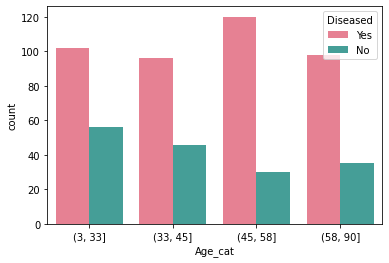

In [359]:
p = sns.countplot(data=Data_Python, x="Age_cat", hue="Diseased", palette="husl")
p.set_xticklabels(['(3, 33]', '(33, 45]' , '(45, 58]' , '(58, 90]'])
p.legend(title='Diseased', loc='upper right', labels=['Yes', 'No'] )

In [360]:
Frec_Relativas_Condicionadas_Diseased_in_Aged  

,"(3, 33]","(33, 45]","(45, 58]","(58, 90]"
Yes,0.645570,0.676056,0.800000,0.736842
No,0.354430,0.323944,0.200000,0.263158


Como puede observarse dentro del grupo de los más jovenes (de edad menor o igual a 33) el procentaje de enfermos es del 64.56% , este porcentaje aumenta hasta el 67.60% en el grupo de individuos cuya edad esta entre 33 y 45 años, y hasta el 80% en el de los individuos con una edad entre 45 y 58 años, luego pasa a ser del 73.68% en el grupo de edad superior a 58 años.


**Frecuecnia relativa de grupo de edad en funcion de enfermedad**

Ahora vamos a generar una tabla de frecuencias relativas de la variable grupo de edad (Age_cat)   condicionada a la   variable respuesta, también generaremos su gráfico de barras asociado.

In [361]:
Frec_Relativas_Condicionadas_Age_in_Diseased = Table_Con_Rel_Freq_2_Var_Py (Data_Python, Data_Python['Diseased'], 1, 3, var1_name='Diseased' , var2_name='Age_cat')
Frec_Relativas_Condicionadas_Age_in_Diseased.index = ['(3, 33]', '(33, 45]' , '(45, 58]' , '(58, 90]']
Frec_Relativas_Condicionadas_Age_in_Diseased.columns = ['Yes' , 'No']
Frec_Relativas_Condicionadas_Age_in_Diseased = Frec_Relativas_Condicionadas_Age_in_Diseased.style.set_caption("Age Group | Diseased")

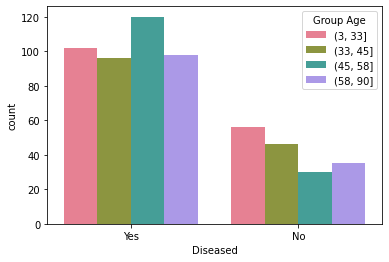

In [362]:
p = sns.countplot(data=Data_Python, x="Diseased", hue="Age_cat", palette="husl")
p.set_xticklabels(['Yes', 'No'])
p.legend(title='Group Age', loc='upper right', labels= ['(3, 33]', '(33, 45]' , '(45, 58]' , '(58, 90]'])

In [363]:
Frec_Relativas_Condicionadas_Age_in_Diseased

,Yes,No
"(3, 33]",0.245192,0.335329
"(33, 45]",0.230769,0.275449
"(45, 58]",0.288462,0.179641
"(58, 90]",0.235577,0.209581


Se puede apreciar que dentro del grupo de los enfermos , el grupo de edad mas frecuente seria el de los individuos con una edad entre 45 y 58 años, seguido del de más de 58 años. 

Por otro lado dentro del grupo de los no enfermos el grupo de edad claramente mayoritario es el de los mas jovenes (edad menor o igual a 33 años), seguido del siguiente grupo mas joven (edad entre 33 y 45).

### 4.3.5. Análisis de la relación entre los predictores cuantitativos y la respuesta  <a class="anchor" id="17"></a>

#### 4.3.5.1. Resumen Estadístico Descriptivo Cuantitativo en función de Diseased  <a class="anchor" id="18"></a>

Ahora vamos a hacer una serie de operaciones para obtener una tabla en la que se pueden comparar los valores de diferentes estadísticos descriptivos básicos para cada variable cuantitativa en función del valor de la respuesta (Diseased).

In [364]:
Data_Python_Quantitative_Diseased_yes = Data_Python.loc[ Data_Python['Diseased'] == 0 , (Data_Python.columns != 'Gender') & (Data_Python.columns != 'Diseased') & (Data_Python.columns != 'proportion_Gender')  & (Data_Python.columns != 'proportion_Diseased') & (Data_Python.columns != 'Age_cat') ]
Data_Python_Quantitative_Diseased_no = Data_Python.loc[ Data_Python['Diseased'] == 1 , (Data_Python.columns != 'Gender') & (Data_Python.columns != 'Diseased') & (Data_Python.columns != 'proportion_Gender')  & (Data_Python.columns != 'proportion_Diseased') & (Data_Python.columns != 'Age_cat') ]

In [365]:
std_yes = Data_Python_Quantitative_Diseased_yes.std()
std_no = Data_Python_Quantitative_Diseased_no.std()

mean_yes = Data_Python_Quantitative_Diseased_yes.mean()
mean_no = Data_Python_Quantitative_Diseased_no.mean()

Q25_yes = Data_Python_Quantitative_Diseased_yes.quantile(q=0.25)
Q25_no = Data_Python_Quantitative_Diseased_no.quantile(q=0.25)

Q50_yes = Data_Python_Quantitative_Diseased_yes.quantile(q=0.5)
Q50_no = Data_Python_Quantitative_Diseased_no.quantile(q=0.5)

Q75_yes = Data_Python_Quantitative_Diseased_yes.quantile(q=0.75)
Q75_no = Data_Python_Quantitative_Diseased_no.quantile(q=0.75)

min_yes = Data_Python_Quantitative_Diseased_yes.min()
min_no = Data_Python_Quantitative_Diseased_no.min()

max_yes = Data_Python_Quantitative_Diseased_yes.max()
max_no = Data_Python_Quantitative_Diseased_no.max()

In [366]:
df_yes = pd.DataFrame({'mean':mean_yes , 'min':min_yes , 'Q25':Q25_yes  , 'median':Q50_yes  , 'Q75':Q75_yes  , 'max':max_yes  , 'std':std_yes})

df_no = pd.DataFrame({'mean':mean_no , 'min':min_no , 'Q25':Q25_no  , 'median':Q50_no  , 'Q75':Q75_no  , 'max':max_no  , 'std':std_no})

In [367]:
Statistics_Quantitatives_Diseased = pd.DataFrame({
    
              'Age_yes':df_yes.iloc[0,:]   ,              
              'Age_no':df_no.iloc[0,:],
              'Total_Bilirubin_yes':df_yes.iloc[1,:]   , 
              'Total_Bilirubin_no':df_no.iloc[1,:],
              'Direct_Bilirubin_yes':df_yes.iloc[2,:]   , 
              'Direct_Bilirubin_no':df_no.iloc[2,:],
              'Alkaline_Phosphotase_yes':df_yes.iloc[3,:]   , 
              'Alkaline_Phosphotase_no':df_no.iloc[3,:],
              'Alamine_Aminotransferase_yes':df_yes.iloc[4,:]   , 
              'Alamine_Aminotransferase_no':df_no.iloc[4,:],
              'Aspartate_Aminotransferase_yes':df_yes.iloc[5,:]   , 
              'Aspartate_Aminotransferase_no':df_no.iloc[5,:],
              'Total_Protiens_yes':df_yes.iloc[6,:]   , 
              'Total_Protiens_no':df_no.iloc[6,:],
              'Albumin_yes':df_yes.iloc[7,:]   , 
              'Albumin_no':df_no.iloc[7,:],
              'Albumin_and_Globulin_Ratio_yes':df_yes.iloc[8,:]   , 
              'Albumin_and_Globulin_Ratio_no':df_no.iloc[8,:],
              
               })

In [529]:
Statistics_Quantitatives_Diseased

,Age_yes,Age_no,Total_Bilirubin_yes,Total_Bilirubin_no,Direct_Bilirubin_yes,Direct_Bilirubin_no,Alkaline_Phosphotase_yes,Alkaline_Phosphotase_no,Alamine_Aminotransferase_yes,Alamine_Aminotransferase_no,Aspartate_Aminotransferase_yes,Aspartate_Aminotransferase_no,Total_Protiens_yes,Total_Protiens_no,Albumin_yes,Albumin_no,Albumin_and_Globulin_Ratio_yes,Albumin_and_Globulin_Ratio_no
mean,46.153846,41.239521,4.164423,1.142515,1.923558,0.396407,319.007212,219.754491,99.605769,33.652695,137.699519,40.688623,6.459135,6.543114,3.060577,3.344311,0.914337,1.028588
min,7.000000,4.000000,0.400000,0.500000,0.100000,0.100000,63.000000,90.000000,12.000000,10.000000,11.000000,10.000000,2.700000,3.700000,0.900000,1.400000,0.300000,0.370000
Q25,34.000000,28.000000,0.800000,0.700000,0.200000,0.200000,186.000000,161.500000,25.000000,20.000000,29.750000,21.000000,5.700000,5.900000,2.500000,2.900000,0.700000,0.900000
median,46.000000,40.000000,1.400000,0.800000,0.500000,0.200000,229.000000,186.000000,41.000000,27.000000,52.500000,29.000000,6.550000,6.600000,3.000000,3.400000,0.900000,1.000000
Q75,58.000000,55.000000,3.625000,1.100000,1.800000,0.350000,315.250000,213.000000,76.500000,37.500000,108.750000,43.500000,7.200000,7.300000,3.625000,4.000000,1.100000,1.200000
max,90.000000,85.000000,75.000000,7.300000,19.700000,3.600000,2110.000000,1580.000000,2000.000000,181.000000,4929.000000,285.000000,9.600000,9.200000,5.500000,5.000000,2.800000,1.900000
std,15.654412,16.999366,7.144831,1.004472,3.206901,0.519255,268.307911,140.986262,212.768472,25.060392,337.389980,36.411620,1.094659,1.063042,0.786595,0.783690,0.325374,0.285658


Esta tabla nos aporta información muy relevante, algunos ejemplos son los siguientes:

- La media de edad en el grupo de los enfermos es de 46 años mientras que en el de no enfermos es 41.24

- Hay un 25% de los enfermos que tienen un valor de Total_Bilirubin superior a 3.62, mientras que en el grupo de los no enfermos solo un 25% supera un valor de 1.1.



#### 4.3.5.2. Diagrama de puntos de la respuesta (Diseased) en función de predictores cuantitativos  <a class="anchor" id="19"></a>

En este caso vamos a generar unos diagramas de puntos de la respuesta en función de cada uno de los predictores cuantitativos. El diagrama de puntos que usaremos es un tipo especial que añade ruido horizontal a los puntos para poder así visulalizar varios puntos que tengan un mismo valor real (valor sin ruido).

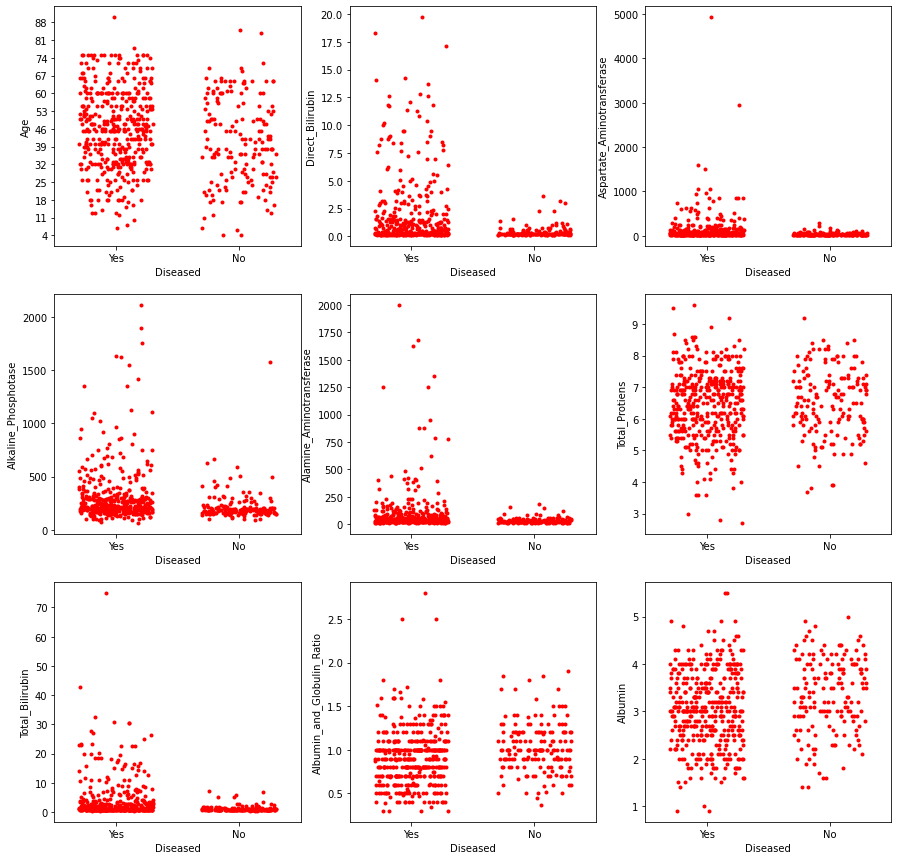

In [370]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

p1 = sns.stripplot(data=Data_Python, x="Diseased", y="Age", jitter=0.3, size=4, color='red', ax=axs[0, 0])
p1.set_xticklabels(['Yes', 'No'])
p1.set_yticks( range(int(Data_Python['Age'].min()) , int(Data_Python['Age'].max()) , 7) )

p2 = sns.stripplot(data=Data_Python, x="Diseased", y="Direct_Bilirubin", jitter=0.3, size=4, color='red', ax=axs[0, 1])
p2.set_xticklabels(['Yes', 'No'])

p3 = sns.stripplot(data=Data_Python, x="Diseased", y="Alkaline_Phosphotase", jitter=0.3, size=4, color='red', ax=axs[1, 0])
p3.set_xticklabels(['Yes', 'No'])

p4 = sns.stripplot(data=Data_Python, x="Diseased", y="Alamine_Aminotransferase", jitter=0.3, size=4, color='red', ax=axs[1, 1])
p4.set_xticklabels(['Yes', 'No'])

p5 = sns.stripplot(data=Data_Python, x="Diseased", y="Aspartate_Aminotransferase", jitter=0.3, size=4, color='red', ax=axs[0, 2])
p5.set_xticklabels(['Yes', 'No'])

p6 = sns.stripplot(data=Data_Python, x="Diseased", y="Total_Protiens", jitter=0.3, size=4, color='red', ax=axs[1, 2])
p6.set_xticklabels(['Yes', 'No'])

p7 = sns.stripplot(data=Data_Python, x="Diseased", y="Albumin", jitter=0.3, size=4, color='red', ax=axs[2, 2])
p7.set_xticklabels(['Yes', 'No'])

p8 = sns.stripplot(data=Data_Python, x="Diseased", y="Albumin_and_Globulin_Ratio", jitter=0.3, size=4, color='red', ax=axs[2, 1])
p8.set_xticklabels(['Yes', 'No'])

p9 = sns.stripplot(data=Data_Python, x="Diseased", y="Total_Bilirubin", jitter=0.3, size=4, color='red', ax=axs[2, 0])
p9.set_xticklabels(['Yes', 'No'])


plt.show()



## 4.4. Arboles de clasificación en `R`  <a class="anchor" id="21"></a>




### 4.4.1. Algoritmo rpart con `R`  <a class="anchor" id="22"></a>



In [371]:
%%R

library(rpart)
library(rpart.plot)
library(caret)
library(tidyverse)


Vamos a hacer la visualización del arbol con `rpart`


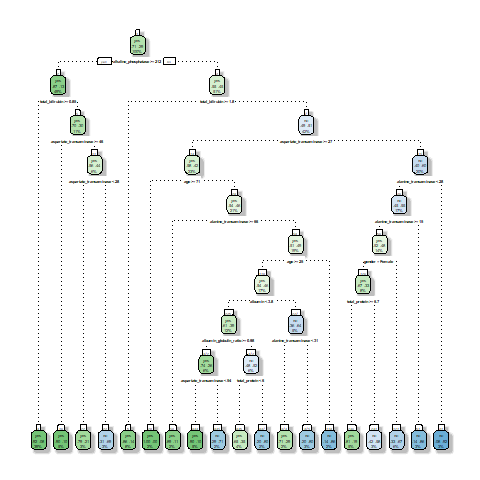

In [531]:
%%R

set.seed(0)
datos_entreno<-sample_frac(ilpd,0.75) # fraccionamos la muestra en entrenamiento y test
datos_test<-setdiff(ilpd,datos_entreno)

arbol_0<-rpart(diseased~.,data = datos_entreno, method = "class", cp=0.01)
rpart.plot(arbol_0, 
           extra = 104,          # show fitted class, probs, percentages
           box.palette = "GnBu", # color scheme
           branch.lty = 3,       # dotted branch lines
           shadow.col = "gray",  # shadows under the node boxes
           nn = TRUE)


Ahora vamos a calcular las predicciones y la matriz de confusión:

In [532]:
%%R

prediccion1<-predict(arbol_0,newdata=datos_test,type="class")

matriz_confusion1<-confusionMatrix(prediccion1,datos_test[["diseased"]])

In [533]:
%%R

prediccion1

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 no  no yes yes yes yes  no yes  no yes yes yes yes  no  no yes yes yes yes yes 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
yes yes yes yes  no yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 no yes  no  no yes yes yes  no yes yes yes  no yes yes yes  no yes yes yes yes 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
yes yes yes  no  no yes yes  no yes yes yes  no yes yes  no  no yes yes yes yes 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
yes yes  no yes  no yes yes yes yes yes  no yes  no  no  no yes yes  no yes yes 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
yes yes yes yes yes  no  no yes yes yes  no  no  no yes  no yes yes yes  no yes 
121 122 123 124 125 126 127 

In [534]:
%%R

matriz_confusion1

Confusion Matrix and Statistics

          Reference
Prediction yes no
       yes  80 25
       no   22 14
                                          
               Accuracy : 0.6667          
                 95% CI : (0.5824, 0.7437)
    No Information Rate : 0.7234          
    P-Value [Acc > NIR] : 0.9431          
                                          
                  Kappa : 0.1468          
                                          
 Mcnemar's Test P-Value : 0.7705          
                                          
            Sensitivity : 0.7843          
            Specificity : 0.3590          
         Pos Pred Value : 0.7619          
         Neg Pred Value : 0.3889          
             Prevalence : 0.7234          
         Detection Rate : 0.5674          
   Detection Prevalence : 0.7447          
      Balanced Accuracy : 0.5716          
                                          
       'Positive' Class : yes             
                                 


Debido a la alta complejidad de estos arboles le vamos a hacer un proceso de prepoda, para ello podemos hacer uso tanto del parámetro cp o directamente manipulando los hiperparametros de los modelos.


Arbol podado con un profundidad maxima de 4:

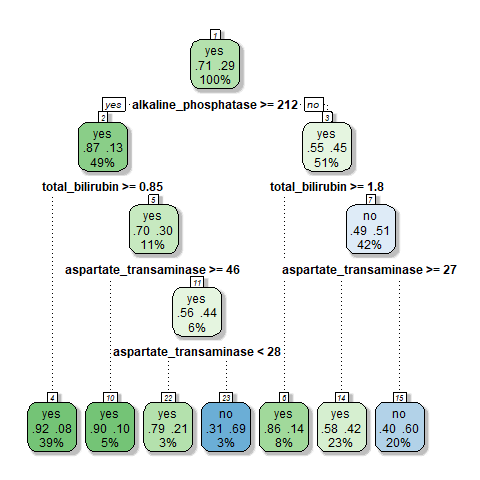

In [535]:
%%R

set.seed(0)
datos_entreno2<-sample_frac(ilpd,0.75)  # Separamos los datos de entrenamiento
datos_test2<-setdiff(ilpd, datos_entreno2) # Separamos los datos de test

arbol_1<-rpart(diseased~.,data=datos_entreno2, maxdepth=4, method = "class") # Cambiamos la profundidad
rpart.plot(arbol_1, 
           extra = 104,          # show fitted class, probs, percentages
           box.palette = "GnBu", # color scheme
           branch.lty = 3,       # dotted branch lines
           shadow.col = "gray",  # shadows under the node boxes
           nn = TRUE)



Con esto hemos conseguido un modelo mucho más simple que el anterior sin prepoda. El cual es más facil de interpretar.


En estos gráficos, cada uno de los rectángulos representa un nodo de nuestro árbol, con su regla de clasificación.

Cada nodo está coloreado de acuerdo a la categoría mayoritaria entre los datos que agrupa. Esta es la categoría que ha predicho el modelo para ese grupo.

Dentro del rectángulo de cada nodo se nos muestra qué proporción de casos pertenecen a cada categoría y la proporción del total de datos que han sido agrupados allí. 

Estas proporciones nos dan una idea de la precisión de nuestro modelo al hacer predicciones.

Calculamos las predicciones y la matriz de confusión:

In [536]:
%%R

prediccion2 <-predict(arbol_1,newdata=datos_test2,type="class")
matriz_confusion2<-confusionMatrix(prediccion2,datos_test2[["diseased"]])

In [537]:
%%R

prediccion2

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 no  no yes yes yes yes  no yes  no yes yes yes yes  no  no yes yes yes yes yes 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
yes yes yes yes  no yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 no yes yes  no yes yes yes  no yes yes yes yes yes  no yes yes yes yes yes yes 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
yes yes yes  no  no yes yes  no yes yes yes yes yes yes yes yes yes yes yes yes 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
yes yes  no yes yes yes yes yes yes yes yes yes  no yes  no yes yes  no yes yes 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
yes yes yes yes yes yes  no yes yes yes  no  no  no yes  no yes yes yes yes yes 
121 122 123 124 125 126 127 

In [538]:
%%R

matriz_confusion2

Confusion Matrix and Statistics

          Reference
Prediction yes no
       yes  87 29
       no   15 10
                                          
               Accuracy : 0.6879          
                 95% CI : (0.6045, 0.7633)
    No Information Rate : 0.7234          
    P-Value [Acc > NIR] : 0.84963         
                                          
                  Kappa : 0.123           
                                          
 Mcnemar's Test P-Value : 0.05002         
                                          
            Sensitivity : 0.8529          
            Specificity : 0.2564          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.4000          
             Prevalence : 0.7234          
         Detection Rate : 0.6170          
   Detection Prevalence : 0.8227          
      Balanced Accuracy : 0.5547          
                                          
       'Positive' Class : yes             
                                 


Se puede ver como hemos mejorado un poco la precisión de la predicción simplemente cambiando la profundidad máxima. Cabe remarcar que el algoritmo de los CART utilizan el índice de Gini como criterio de división.




### 4.4.2. Algoritmo C50 con  `R`  <a class="anchor" id="23"></a>


 

Cargamos el paquete específico del Arbol de clasificación C5.0


In [380]:
%%R

# install.packages("C50",dependencies=TRUE)

library(C50)


Realizamos la partición en datos de entrenaminento y test:


In [539]:
%%R

set.seed(0)
tamano_total<-nrow(ilpd)
tamano_entreno<-round(tamano_total*0.75)
datos_indices<-sample(1:tamano_total,size = tamano_entreno)
datos_entreno<-ilpd[datos_indices,]
datos_test<-ilpd[-datos_indices,]


Las siguientes proporciones deberían de ser relativamente similares para que los arboles den unos buenos resultados:


In [540]:
%%R

round(table(datos_entreno$diseased)/nrow(datos_entreno), 3)


  yes    no 
0.709 0.291 


In [541]:
%%R

round(table(datos_test$diseased)/nrow(datos_test), 3)


  yes    no 
0.726 0.274 



Ejecución del modelo de clasificación C5.0


In [542]:
%%R

modeloC50 <- C5.0(diseased~.,data=datos_entreno,trials=1,rules=FALSE)


Información del modelo creado



In [543]:
%%R

summary(modeloC50)


Call:
C5.0.formula(formula = diseased ~ ., data = datos_entreno, trials = 1, rules
 = FALSE)


C5.0 [Release 2.07 GPL Edition]  	Wed Oct 12 19:44:03 2022
-------------------------------

Class specified by attribute `outcome'

Read 437 cases (11 attributes) from undefined.data

Decision tree:

direct_bilirubin > 0.9: yes (135/9)
direct_bilirubin <= 0.9:
:...alanine_transaminase > 65:
    :...albumin <= 3.9: yes (35/1)
    :   albumin > 3.9:
    :   :...aspartate_transaminase <= 99: no (4/1)
    :       aspartate_transaminase > 99: yes (4)
    alanine_transaminase <= 65:
    :...alkaline_phosphatase > 211:
        :...total_bilirubin <= 0.8:
        :   :...gender = Female:
        :   :   :...age <= 39: yes (2)
        :   :   :   age > 39: no (5)
        :   :   gender = Male:
        :   :   :...age <= 13: no (3)
        :   :       age > 13:
        :   :       :...albumin_globulin_ratio <= 0.55: no (2)
        :   :           albumin_globulin_ratio > 0.55: yes (25/4)
        :   t

 Podemos ver el gráfico del modelo:


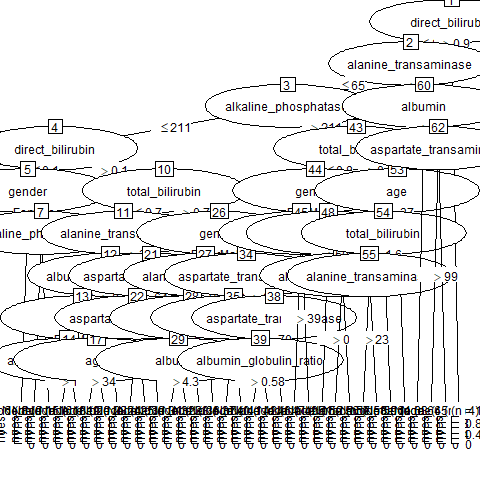

In [544]:
%%R

plot(modeloC50)

Calculamos las predicciones del modelo:


In [545]:
%%R

(prediccion<-predict(modeloC50, newdata = datos_test,type="class"))

  [1] no  yes yes yes yes yes no  yes yes yes yes no  yes no  yes yes yes no 
 [19] yes yes yes yes yes yes yes yes yes yes no  yes yes yes yes yes yes yes
 [37] yes yes yes yes yes yes yes yes yes no  yes no  no  yes yes yes no  yes
 [55] yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes
 [73] yes yes yes yes no  yes no  no  yes yes yes yes yes yes yes yes yes yes
 [91] yes yes yes yes yes yes yes no  yes no  yes yes no  yes yes yes yes yes
[109] yes yes yes yes yes no  yes no  yes no  yes no  yes yes no  yes yes yes
[127] yes yes yes no  yes yes yes no  yes yes no  yes yes yes yes yes yes yes
[145] yes yes
Levels: yes no


Calculamos la matriz de confusión:


In [546]:
%%R

(matriz_confusion<-table(predicho=prediccion, real=datos_test$diseased))

        real
predicho yes no
     yes  92 30
     no   14 10


Calculamos la tasa de acierto en la clasificacion (TAC) obtenida parte del modelo, es decir el porcentaje de clasificaciones correctas.



In [547]:
%%R

100*sum(diag(matriz_confusion))/sum(matriz_confusion)

[1] 69.86301


TAC = 69.86

Calculamos la tasa de error de clasificacion (TEC = 1 - TAC) cometido por el modelo, que es el porcentaje de clasificaciones incorrectas


In [548]:
%%R

error_clas<-round(mean(prediccion != datos_test$diseased),3)
paste(
  "El error de clasificacion es del:",100*error_clas,"%.",sum(prediccion==datos_test$diseased),"clasificaciones correctas de un total de",length(prediccion)
)

[1] "El error de clasificacion es del: 30.1 %. 102 clasificaciones correctas de un total de 146"


TEC = 30.1


Ahora vamos a podar el arbol con la libreria C5.0



 Seleccionamos la submuestra del 75% de los datos


In [549]:
%%R

set.seed(0)
tamano_total<-nrow(ilpd)
tamano_entreno<-round(tamano_total*0.75)
datos_indices<-sample(1:tamano_total,size = tamano_entreno)
datos_entreno<-ilpd[datos_indices,]
datos_test<-ilpd[-datos_indices,]


Las siguientes proporciones deberían de ser relativamente similares para que los arboles den unos buenos resultados:


In [550]:
%%R

round(table(datos_entreno$diseased)/nrow(datos_entreno), 3)


  yes    no 
0.709 0.291 


In [393]:
%%R

round(table(datos_test$diseased)/nrow(datos_test), 3)


  yes    no 
0.747 0.253 



Ejecución del arbol de clasificación podado con la libreria C5.0


In [551]:
%%R


modeloC50<-C5.0(diseased~.,data=datos_entreno,trials=1,rules=FALSE,control = C5.0Control(minCases = 10,earlyStopping = TRUE))


Información del modelo creado



In [552]:
%%R

summary(modeloC50)


Call:
C5.0.formula(formula = diseased ~ ., data = datos_entreno, trials = 1, rules
 = FALSE, control = C5.0Control(minCases = 10, earlyStopping = TRUE))


C5.0 [Release 2.07 GPL Edition]  	Wed Oct 12 19:47:02 2022
-------------------------------

Class specified by attribute `outcome'

Read 437 cases (11 attributes) from undefined.data

Decision tree:

direct_bilirubin > 0.9: yes (135/9)
direct_bilirubin <= 0.9:
:...alanine_transaminase > 65: yes (43/4)
    alanine_transaminase <= 65:
    :...alkaline_phosphatase > 211: yes (78/20)
        alkaline_phosphatase <= 211:
        :...direct_bilirubin <= 0.1: yes (33/11)
            direct_bilirubin > 0.1:
            :...total_bilirubin <= 0.7: no (39/11)
                total_bilirubin > 0.7:
                :...gender = Female:
                    :...total_bilirubin <= 0.8: yes (20/5)
                    :   total_bilirubin > 0.8: no (21/7)
                    gender = Male:
                    :...aspartate_transaminase <= 25: no (23/


 Gráfico del modelo:


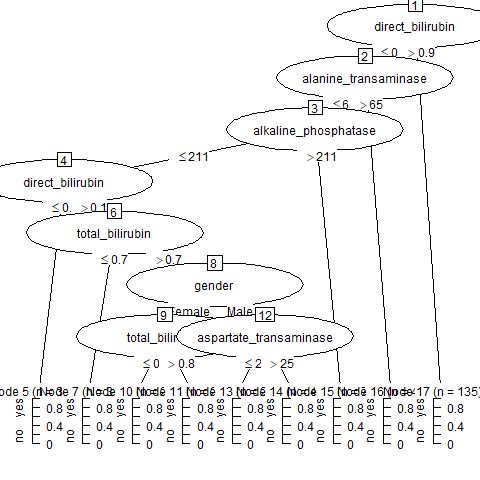

In [553]:
%%R

plot(modeloC50)

Calculamos las predicciones:




In [397]:
%%R

(prediccion<-predict(modeloC50, newdata = datos_test,type="class"))

  [1] yes yes no  yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes
 [19] yes yes no  yes yes yes yes yes yes yes yes yes yes no  yes yes yes yes
 [37] yes yes yes no  yes yes yes yes yes yes yes yes no  yes yes yes yes no 
 [55] yes no  yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes no 
 [73] yes yes no  no  yes yes no  no  yes yes no  yes yes yes yes yes yes yes
 [91] yes yes yes yes yes yes yes yes yes no  yes no  no  yes yes yes yes yes
[109] no  yes no  yes yes yes yes yes yes no  yes yes yes yes yes yes no  yes
[127] yes no  yes yes no  yes yes yes no  yes yes yes yes yes yes yes yes yes
[145] yes yes
Levels: yes no


Calculamos la matriz de confusión:


In [398]:
%%R

(matriz_confusion<-table(predicho=prediccion, real=datos_test$diseased))

        real
predicho yes no
     yes  98 25
     no   11 12



Porcentaje de clasificados correctamente:


In [399]:
%%R

100*sum(diag(matriz_confusion))/sum(matriz_confusion)

[1] 75.34247


TAC = 75.33


 Error de clasificación :

 


In [400]:
%%R

error_clas<-round(mean(prediccion != datos_test$diseased),3)
paste(
  "El error de clasificacion es del:",100*error_clas,"%.",sum(prediccion==datos_test$diseased),"clasificaciones correctas de un total de",length(prediccion)
)

[1] "El error de clasificacion es del: 24.7 %. 110 clasificaciones correctas de un total de 146"


TEC = 24.7


### 4.4.3.  Algoritmo CART en `R` con `mlr3`  <a class="anchor" id="24"></a>


No es necesario preprocesar los datos para árboles (dummy y normalización).


In [401]:
%%R

# install.packages('mlr3extralearners')

NULL


In [402]:
%%R

library(mlr3)
library(mlr3learners)


Creamos la tarea de clasificación:


In [403]:
%%R

ILPD_task <- as_task_classif(ilpd , target = "diseased")


Partimos el data-set en parte de test y parte de train:


In [404]:
%%R

res_desc <- rsmp("holdout" , ratio=0.75)

set.seed(0)

res_desc$instantiate(ILPD_task)


Definimos el método de aprendizaje:


In [405]:
%%R

tree_learner <- lrn("classif.rpart" , maxdepth=4)


Entrenamos y evaluamos el modelo:


In [406]:
%%R

tree_resample<-resample(task = ILPD_task, learner = tree_learner,resampling = res_desc,store_models = TRUE)

INFO  [14:12:27.525] [mlr3] Applying learner 'classif.rpart' on task 'ilpd' (iter 1/1)


Calculamos las predicciones:


In [407]:
%%R

tree_test<-tree_resample$predictions()
tree_test[[1]]

<PredictionClassif> for 146 observations:
    row_ids truth response
          4   yes       no
          9    no       no
         11   yes      yes
---                       
        575   yes      yes
        577   yes      yes
        583    no      yes



Calculamos la accuracy (que es la TAC):


In [408]:
%%R

tree_acc <- tree_resample$aggregate(msr("classif.acc"))


 Visualizamos el modelo:


Primero obtenderemos la expresion en texto del modelo, luego su gráfico.

In [409]:
%%R

tree_learner<-tree_resample$learners[[1]]
tree_learner$model

n= 437 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 437 127 yes (0.70938215 0.29061785)  
   2) alkaline_phosphatase>=211.5 216  28 yes (0.87037037 0.12962963)  
     4) total_bilirubin>=0.85 169  14 yes (0.91715976 0.08284024) *
     5) total_bilirubin< 0.85 47  14 yes (0.70212766 0.29787234)  
      10) aspartate_transaminase>=45.5 20   2 yes (0.90000000 0.10000000) *
      11) aspartate_transaminase< 45.5 27  12 yes (0.55555556 0.44444444)  
        22) aspartate_transaminase< 27.5 14   3 yes (0.78571429 0.21428571) *
        23) aspartate_transaminase>=27.5 13   4 no (0.30769231 0.69230769) *
   3) alkaline_phosphatase< 211.5 221  99 yes (0.55203620 0.44796380)  
     6) total_bilirubin>=1.75 36   5 yes (0.86111111 0.13888889) *
     7) total_bilirubin< 1.75 185  91 no (0.49189189 0.50810811)  
      14) aspartate_transaminase>=26.5 99  42 yes (0.57575758 0.42424242) *
      15) aspartate_transaminase< 26.5 86  34 no (0.39534884 0.60465116) *


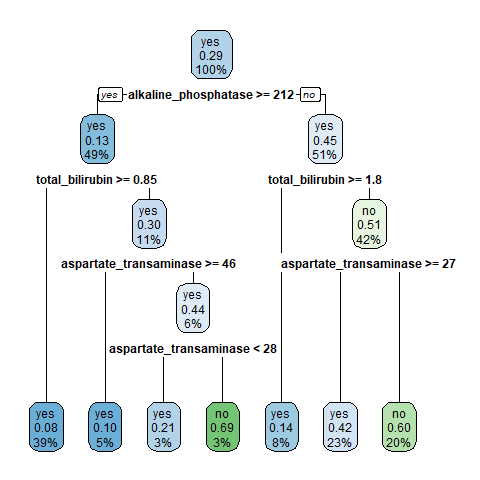

In [410]:
%%R

rpart.plot(tree_learner$model)


### 4.4.4.  Algoritmo C5.0 en `R` con `mlr3`  <a class="anchor" id="25"></a>

In [411]:
%%R

library(mlr3)
library(mlr3learners)
library(mlr3extralearners)


 Cambiamos el tipo de los datos a  numerico  porque si no el algoritmo no funciona.


In [412]:
%%R

ilpd$age<-as.numeric(ilpd$age)
ilpd$alkaline_phosphatase<-as.numeric(ilpd$alkaline_phosphatase)
ilpd$alanine_transaminase<-as.numeric(ilpd$alanine_transaminase)
ilpd$aspartate_transaminase<-as.numeric(ilpd$aspartate_transaminase)


 Creamos la tarea de clasificación:


In [413]:
%%R

ILPD_task<-as_task_classif(ilpd,target = "diseased")



 Definimos el método de evaluación:


In [414]:
%%R

res_desc<-rsmp("holdout",ratio=0.75)
set.seed(0)
res_desc$instantiate(ILPD_task)



 Definimos el método de aprendizaje:
 


In [415]:
%%R

tree_learner<-lrn("classif.C50")



Entrenamos y evaluamos el modelo:


In [416]:
%%R

tree_resample<-resample(task = ILPD_task, learner = tree_learner, resampling = res_desc, store_models = TRUE)


INFO  [14:12:37.416] [mlr3] Applying learner 'classif.C50' on task 'ilpd' (iter 1/1)



 Obtenemos la predicciones del modelo:


In [417]:
%%R

tree_test<-tree_resample$predictions()
tree_test[[1]]


<PredictionClassif> for 146 observations:
    row_ids truth response
          4   yes       no
          9    no      yes
         11   yes      yes
---                       
        575   yes      yes
        577   yes      yes
        583    no      yes



 Calculamos la accuracy (TAC) del modelo:


In [418]:
%%R

tree_acc<-tree_resample$aggregate(msr("classif.acc"))



 Visualizamos el modelo :


In [419]:
%%R

tree_learner<-tree_resample$learners[[1]]
tree_learner$model



Call:
C50::C5.0.formula(formula = f, data = data, control = ctrl)

Classification Tree
Number of samples: 437 
Number of predictors: 10 

Tree size: 35 

Non-standard options: attempt to group attributes



Como vemos no da plena  información sobre la estructura del modelo.


Ahora hemos intentado graficar el modelo, pero nos sale un error.


In [420]:
%%R

# plot(tree_learner$model)

NULL


## Arboles de clasificación en `Python` <a class="anchor" id="26"></a>

###  Arboles de clasificación: *teoría*  <a class="anchor" id="27"></a>

Vamos a considerar el siguiente tipo de arboles (matematicos):

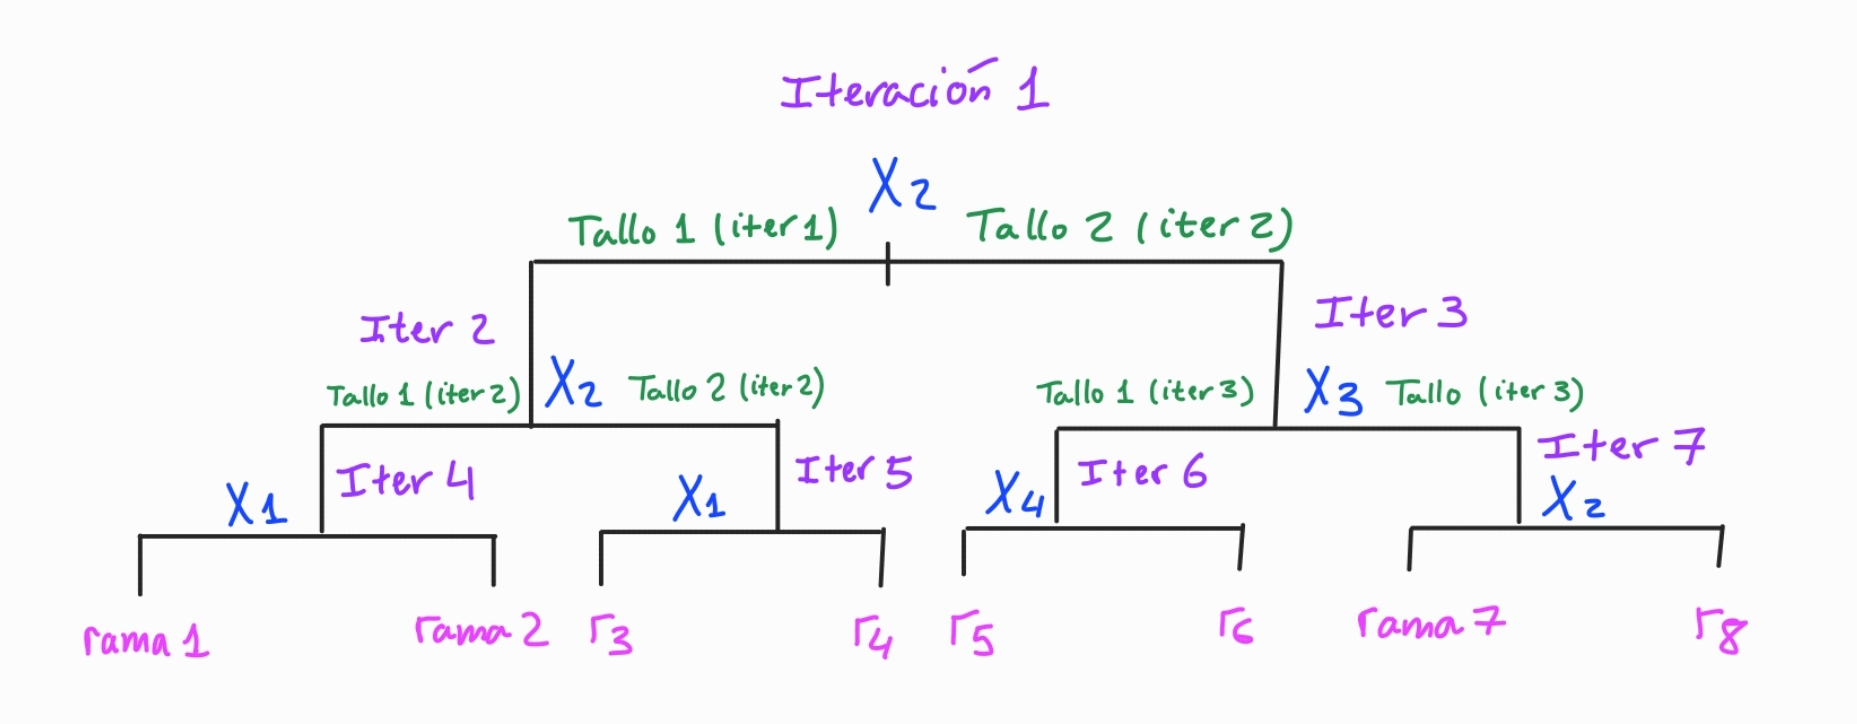

In [421]:
from IPython.display import Image
Image(filename='arbol.jpg', width = 1000, height = 400) 

Es importante tener en cuenta los elementos que estan reflejados, pues los usaremos posteriormente.

Los arboles estan compuestos de iteraciones, que a su vez cada una de ellas se dividen en dos tallos. La union de tallos de distintas iteraciones da lugar a las ramas del arbol.

#### **Arboles de clasificación**

La idea de los algoritmos de arboles de clasificacion es segmentar las observaciones de los predictores $X_1,...,X_p$ para predecir el valor de la respuesta $Y$ en base a esa informacion segmentada. Es algo asi como predecir Y por grupos/segmentos.



### Definicion formal de los arboles de clasificación:

  ##### **Elementos Básicos**

- Tenemos unos predictores $\hspace{0.1cm} X_1,...,X_p \hspace{0.1cm}$ y una variable respuesta **categorica** $\hspace{0.1cm} Y$

- Tenemos un arbol $\hspace{0.1cm} T \hspace{0.1cm}$  de la forma del expuesto en la imagen con $\hspace{0.1cm} m-1 \hspace{0.1cm}$ iteraciones y $\hspace{0.1cm} m \hspace{0.1cm}$ ramas.

- $r_{ht}$ es la rama $h$ del arbol con $t$ iteraciones.
  
-  Cada iteracion del arbol tiene asociado uno de los predictores $\hspace{0.07cm} X_1,...,X_n$
  
- Cada iteracion del arbol tiene dos tallos (tallo 1 (izquierdo) y tallo 2 (derecho)).


- En cada tallo de una iteracion se define un intervalo. 

- $\hspace{0.1cm} I_{lt} \hspace{0.1cm}$ es el intervalo asociado al tallo $l$ de la iteracion $\hspace{0.1cm} t$


- Para simplificar el problema consideraremos $\hspace{0.1cm} I_{1t} = (-\infty \hspace{0.03cm},\hspace{0.03cm} s_t)\hspace{0.1cm}$  y $\hspace{0.1cm} I_{2t} = [s_t \hspace{0.03cm},\hspace{0.03cm} \infty]\hspace{0.1cm}$ donde $\hspace{0.1cm} s_t \hspace{0.1cm}$ es llamado punto de corte de la iteracion $\hspace{0.1cm} t \hspace{0.1cm}$ del arbol

- $R_{ht} \hspace{0.1cm}$ es la region (rectangulo $n$-dimensional) definida por la rama $\hspace{0.1cm} h \hspace{0.1cm}$    de un arbol con $t$ iteraciones



##### **Criterio de prediccion de la variable respuesta**


Dada una nueva observacion $\hspace{0.1cm} x_{new}= (x_{new,1},x_{new,2},...,x_{new,p} ) \hspace{0.1cm}$ la idea es predecir $\hspace{0.1cm} y_{new} \hspace{0.1cm}$ como sigue:


Sea $ \hspace{0.1 cm} f_{r, R_{ht}} \hspace{0.1 cm}$ la frecuencia relativa de la clase/grupo r en la rama $h$ de un arbol con $t$ iteraciones. 

Es decir, es la proporcion  de individuos de la muestra de entrenamiento que caen en la rama $h$ de un arbol  con $t$ iteraciones  que pertenecen a la clase $r$ (es decir, para los que $Y=r$ ) : 

$$ \hspace{0.1 cm} f_{r , R_{ht}} \hspace{0.1 cm} = \hspace{0.1 cm} \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{ht} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{ht}  \rbrace} $$

Donde: $\hspace{0.25cm} r \in Rango(Y) = \lbrace 0,1,..,c-1 \rbrace $

  $Si \hspace{0.3cm} x_{new} \in R_{ht} \hspace{0.12cm}  \Rightarrow  \hspace{0.12cm}$ $x_{new}$ es clasificado en la clase/grupo mayoritaria (mas frecuente) en la rama $h$ $(r_h)$

Por tanto:

 $\hspace{0.4 cm} Si \hspace{0.22 cm} r_{R_{ht}}^*  \hspace{0.05 cm}= \hspace{0.05 cm} \underset{\hspace{0.7 cm} r}{arg \hspace{0.1 cm} Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{ht}} \hspace{0.1 cm}\right) \hspace{0.2 cm} ,\hspace{0.05 cm} entonces:$  





 $$Si \hspace{0.3cm} x_{new} \in R_h \hspace{0.22cm}  \Rightarrow  \hspace{0.22cm}  \widehat{y}_{new} = r_{R_{ht}}^*$$

*Observacion:*

Definida la region $\hspace{0.05 cm} R_{ht} \hspace{0.05 cm}$ , es relativamente sencillo resolver el problema $ \hspace{0.05 cm} \underset{  r}{    Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{ht}} \hspace{0.1 cm}\right)  \hspace{0.05 cm}$  y asi obtener $\hspace{0.05 cm}  r_{R_{ht}}^*$

##### **Objetivo** : Usando la **tasa de error de clasificacion** como métrica a optimizar





Definimos el **error de entrenamiento de la rama $h$ de un arbol de clasificacion con $t$ iteraciones** como la tasa de error de clasificacion para las observaciones de entrenamiento que caen en la rama $h$ de dicho arbol, es decir, como:

$$TEC(R_{ht}) = 1 - f_{r^*_{R_{ht}} , R_{ht}}$$



*Observación:*

$f_{r^*_{R_{ht}} , R_{ht}}$ es la proporcion de individuos de la muestra de entrenamiento que caen en la rama $h$ de un arbol con $t$ iteraciones que son de la clase/grupo $r^*_{R_{ht}}$ (el valor de la variable respuesta para ellos es $r^*_{R_{ht}}$)

Como  el modelo clasifica a los que caen en esa rama como de la clase $r^*_{R_{ht}}$ , es decir, como la predicion de la respuesta para todo individuo que pertenezaca a esa rama es $r^*_{R_{ht}}$ , por parte del modelo, entonces se tiene lo siguiente:

$f_{r^*_{R_{ht}} , R_{ht}}$ es la proporcion de individuos de la muestra de entrenamiento que caen en la rama $h$ de un arbol con $t$ iteraciones que son correctamente clasificados por el modelo (proporcion de individuos de la region $R_{ht}$ a los que se les ha predicho bien la respuesta).

$TEC(R_{ht})$ es la proporcion de individuos de la muestra de entrenamiento que caen en la rama $h$ de un arbol con $t$ iteraciones $($ sus observaciones de los predictores pertenecen a $R_{ht}$ $)$ y que han sido clasificados erroneamente. Se les ha clasificado en la clase $r^*_{R_{ht}}$ y su clase era otra diferente, es decir, tenian un valor distinto a $r^*_{R_{ht}}$ para la variable respeusta, que es el valor que el modelo les predice para la respuesta.


Definimos el **error global de entrenamiento de un arbol de clasificación** como la suma de los errores de entrenamiento de las ramas del arbol de clasificación: 





$$\sum_{h=1}^{m} \hspace{0.1cm} TEC(R_h) $$


El **objetivo** es construir un arbol de regresion con $m$ ramas tal que **minimice** el **error global de entrenamiento**. 

Es decir, formalmente el objetivo es:

$$ \underset{R_1,..,R_m}{Min}  \hspace{0.12cm}  \sum_{h=1}^{m} \hspace{0.1cm} TEC(R_h)  $$


Pero para escoger las regiones $\hspace{0.1cm} R_1,...,R_m \hspace{0.1cm}$ que definen las ramas del arbol  hay que determinar dos elementos que definen a su vez a las regiones:

$1.\hspace{0.1cm}$ Qué predictores estan asociados a cada iteracion del arbol $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ Para cada iteracion $i$ escoger $X_j \hspace{0.01cm}$ $(\hspace{0.01cm} $ es decir, escoger $j \hspace{0.01cm})$
   
$2.\hspace{0.1cm}$ Qué intervalos estan asociados a cada uno de los dos tallos de cada interaccion $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ Para cada iteracion $i$ escoger $I_{1i}$ y $I_{2i}\hspace{0.1cm}$ $(\hspace{0.01cm}$ es decir, escoger el punto de corte $\hspace{0.07cm}s_i \hspace{0.04cm} )$
   

Por tanto el porblema a resolver se puede reformular como:

Para cada iteracion $\hspace{0.1cm} i \hspace{0.1cm}$ escoger $\hspace{0.1cm} X_j\hspace{0.01cm}$ $(\hspace{0.05cm}$ es decir $\hspace{0.01cm}j \hspace{0.05cm})\hspace{0.05cm}$ y $\hspace{0.05cm}( I_{1i}\hspace{0.1cm},\hspace{0.1cm}I_{2i} )\hspace{0.1cm}$ $\hspace{0.1cm}($ es decir $\hspace{0.1cm} s_i)\hspace{0.1cm}$ tal que se acaben formando un arbol cuyas ramas definan unas regiones $\hspace{0.1cm}R_1,...,R_m\hspace{0.1cm}$ que **minimicen** $\hspace{0.1cm}\sum_{h=1}^{m} \hspace{0.1cm} TEC(R_h)$

##### **Objetivo** : Usando el **índice de Gini** como métrica a optimizar





Definimos el **error de entrenamiento de la rama $h$ de un arbol de clasificacion con $t$ iteraciones** como el índice de Gini de la respuesta en la rama $h$ del arbol con $t$ iteraciones (indice de gini de la respuesta en la region $R_{ht}$)  , es decir, como:



$$ G_{R_{ht}} = \sum_{r=0,1,..,c-1}^{} f_{r , R_{ht}}\cdot(1 - f_{r , R_{ht}}) $$


Donde: $\hspace{0.15cm} Rango(Y) = \lbrace 0,1,...,c-1 \rbrace$

$G_{R_{ht}}$  toma valores pequeños cuando la frecuencia de una clase $r=0,1,...$ en la region $R_{ht}$ es alta , y por tanto la del resto baja.

$G_{R_{ht}}$ toma valores altos cuando las frecuencias de las clases se reparten de manera "igualitaria" en la region $R_{ht}$. Y cuanto mas igualitaria es la reparticion de las classes, mas alto es $G_{R_{ht}}$ . Hasta el punto que cuando la reparticion es totalmente igualitaria, esto es, cada clase tiene la misma frecuencia , si hay $c$ clases, cada una tiene una frecuencia relativa de $1/c$ en la region, entonces en indicide de Gini alcanza su maximo valor.

Ejemplo: 

Para $\hspace{0.1 cm} c=3$  $\hspace{0.15cm} ( Rango(Y)=\lbrace 0,1,2 \rbrace )$ 

Si tenemos: $\hspace{0.15cm} f_{0 , R_{ht}} = 0.40 \hspace{0.15cm}$ , $\hspace{0.15cm} f_{1 , R_{ht}}=0.30 \hspace{0.15cm}$ y $\hspace{0.15cm} f_{2 , R_{ht}}=0.30$ $\hspace{0.15cm} \Rightarrow \hspace{0.15cm}$  $G_{R_{ht}} = 0.66 $

Si tenemos: $\hspace{0.15cm} f_{0 , R_{ht}} = 0.80 \hspace{0.15cm}$ , $\hspace{0.15cm} f_{1 , R_{ht}}=0.10 \hspace{0.15cm}$ y $\hspace{0.15cm} f_{2 , R_{ht}}=0.10$ $\hspace{0.15cm} \Rightarrow \hspace{0.15cm}$  $G_{R_{ht}} = 0.34 $

Si tenemos: $\hspace{0.15cm} f_{0 , R_{ht}} = 0.9 \hspace{0.15cm}$ , $\hspace{0.15cm} f_{1 , R_{ht}}=0.05 \hspace{0.15cm}$ y $\hspace{0.15cm} f_{2 , R_{ht}}=0.05$ $\hspace{0.15cm} \Rightarrow \hspace{0.15cm}$  $G_{R_{ht}} = 0.185 $

Teniendo esto en cuenta nos interesan que en cada rama (region $R_{ht}$) la frecuencia de la clase mayoritaria sea lo mayor posible, y eso equivale a que el indice de Gini sea lo menos posible dentro de cada rama, siguiendo la filosofia empleada con la $TEC$, donde nos interesaba que  $f_{r^*_{R_{ht}} , R_{ht}}$ fuese lo mayor posible en cada rama.


Definimos el **error global de entrenamiento de un arbol de clasificación** como la suma de los errores de entrenamiento de las ramas del arbol de clasificación:  



$$\sum_{h=1}^{m} \hspace{0.1cm} G_{R_{ht}} $$


El **objetivo** es construir un arbol de regresion con $m$ ramas tal que **minimice** el **error global de entrenamiento**. 

Es decir, formalmente el objetivo es:



$$ \underset{R_1,..,R_m}{Min}  \hspace{0.12cm}  \sum_{h=1}^{m} \hspace{0.1cm} G_{R_{ht}}  $$


En el fondo minimizar el error de clasificacion de un arbol de clasificacion equivale a minimizar el indice de Gini en las ramas del arbol conjuntamente (a nivel global).

Pero para escoger las regiones $\hspace{0.1cm} R_1,...,R_m \hspace{0.1cm}$ que definen las ramas del arbol  hay que determinar dos elementos que definen a su vez a las regiones:

$1.\hspace{0.1cm}$ Qué predictores estan asociados a cada iteracion del arbol $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ Para cada iteracion $i$ escoger $X_j \hspace{0.01cm}$ $(\hspace{0.01cm} $ es decir, escoger $j \hspace{0.01cm})$
   
$2.\hspace{0.1cm}$ Qué intervalos estan asociados a cada uno de los dos tallos de cada interaccion $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ Para cada iteracion $i$ escoger $I_{1i}$ y $I_{2i}\hspace{0.1cm}$ $(\hspace{0.01cm}$ es decir, escoger el punto de corte $\hspace{0.07cm}s_i \hspace{0.04cm} )$
   

Por tanto el porblema a resolver se puede reformular como:

Para cada iteracion $\hspace{0.1cm} i \hspace{0.1cm}$ escoger $\hspace{0.1cm} X_j\hspace{0.01cm}$ $(\hspace{0.05cm}$ es decir $\hspace{0.01cm}j \hspace{0.05cm})\hspace{0.05cm}$ y $\hspace{0.05cm}( I_{1i}\hspace{0.1cm},\hspace{0.1cm}I_{2i} )\hspace{0.1cm}$ $\hspace{0.1cm}($ es decir $\hspace{0.1cm} s_i)\hspace{0.1cm}$ tal que se acaben formando un arbol cuyas ramas definan unas regiones $\hspace{0.1cm}R_1,...,R_m\hspace{0.1cm}$ que **minimicen** $\hspace{0.1cm}\sum_{h=1}^{m} \hspace{0.1cm} G_{R_{ht}}$

#### Algoritmo para la resolucion del problema $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ **Algoritmo de particion binaria** <a class="anchor" id="8"></a>



El siguiente algoritmo es una forma de resolver el problema planteado anteriormente. Consiste en ir generando el arbol de manera secuencial, iteracion a iteracion, minimizando en cada paso el error de clasificacion para las observaciones de train que caen en las ramas asociadas a la iteracion en cuestion que esta siendo optimizada.

El algoritmo se basa en la resolucion secuencial de problemas de minimizacion, uno por cada iteracion tenga el arbol que se acabará generando.



**Importante:**

Para esta exposicion teorica del algoritmo se va a usar como metrica principal la TEC , pero es facilmente extrapolable al caso en el que se usase el índice de Gini como metrica a optimizar.



##### **Problema de la Iteracion 1**


Arbol con 1 iteracion:

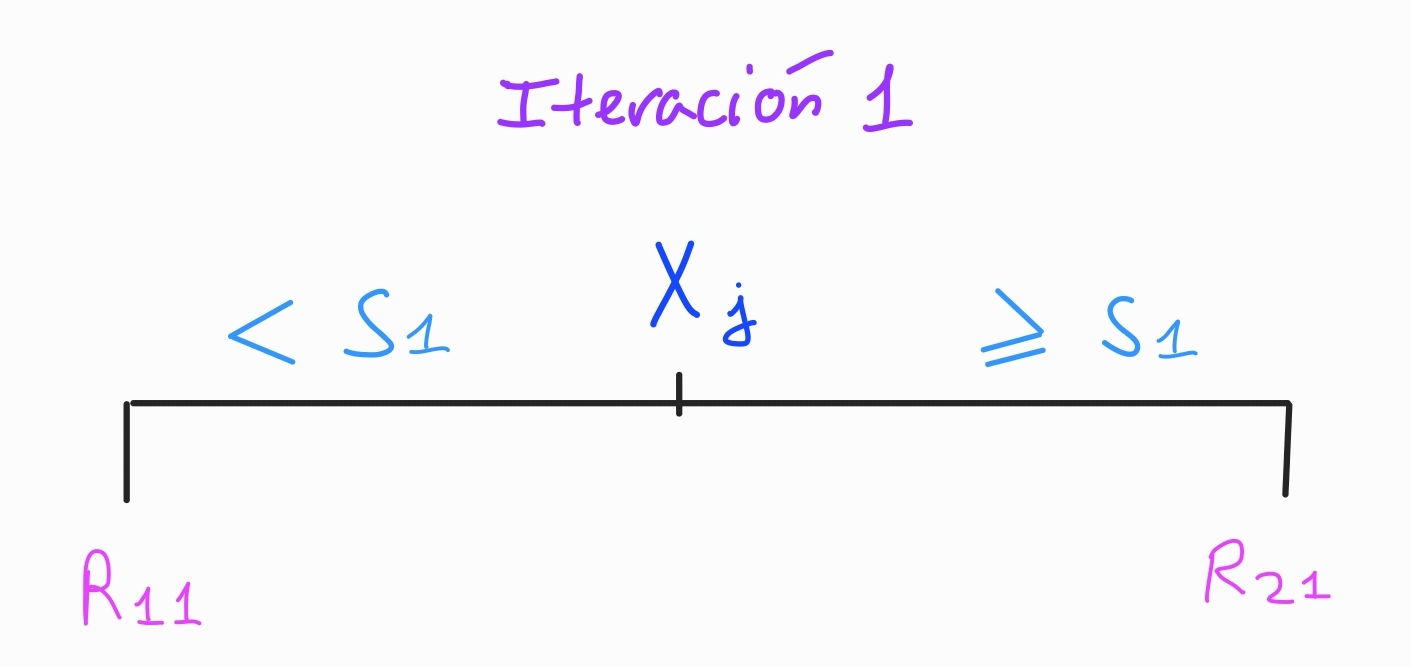

In [422]:
from IPython.display import Image
Image(filename='arbol 1iter.jpg', width = 600, height = 300) 

La idea es, determinar las regiones $R_{11}$ y $R_{21}\hspace{0.1cm}$ $($ es decir, $j$ y $s_1 \hspace{0.05cm}) \hspace{0.1cm}$  del arbol con 1 iteracion   tal que minimizan el error de entrenamiento global de dicho arbol con 1 iteracion.

Mas formalmente el problema planteado es:



$$

\underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} TEC_1 = TEC(R_{11}) + TEC(R_{21})  \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] 

=\hspace{0.2cm} \underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}  \left( 1 - f_{r^*_{R_{11}} , R_{11}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}    \left( 1 - f_{r^*_{R_{21}} , R_{21}} \right)  \hspace{0.2cm} \right)     \\[25pt] 

=\hspace{0.2cm}   \underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}    1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{11}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11}  \rbrace}  \hspace{0.3cm} +  \hspace{0.3cm}      1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{21}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21}  \rbrace}   \hspace{0.2cm} \right)     \\[25pt]


=\hspace{0.2cm}   \underset{j  ,  s_1}  {Min} \hspace{0.1cm} \left( \hspace{0.2cm}    1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i < s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{11}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i < s_1  \rbrace} \hspace{0.3cm} +  \hspace{0.3cm}      1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \geqslant s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{21}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \geqslant s_1 \rbrace}    \hspace{0.2cm} \right)    

$$


- Si utilizamos el **índice de Gini** como metrica de error a minimizar:

$$

\underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.15cm} \left(\hspace{0.1cm} G_1 = G_{R_{11}} + G_{R_{21}}  \hspace{0.1cm}\right)   \hspace{0.1cm} =   \\[15pt] 

=\hspace{0.2cm} \underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.1cm} \Biggl\{ \hspace{0.2cm}  \sum_{r=0,1,..,c-1}^{} f_{r , R_{11}}\cdot(1 - f_{r , R_{11}})  \hspace{0.1cm} + \hspace{0.1cm}  \sum_{r=0,1,..,c-1}^{} f_{r , R_{21}}\cdot(1 - f_{r , R_{21}})   \hspace{0.2cm} \Biggl\}     \\[25pt] 

=\hspace{0.2cm}   \underset{R_{11}  ,  R_{21}}  {Min} \hspace{0.1cm} \Biggl\{\hspace{0.2cm}   \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11}  \rbrace}  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11}  \rbrace}  \right)



\hspace{0.3cm} +  \hspace{0.3cm}         \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21}  \rbrace}  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21}  \rbrace}  \right)            \hspace{0.2cm} \Biggl\}     \\[25pt]

=\hspace{0.2cm}   \underset{j  ,  s_1}  {Min} \hspace{0.1cm} \Biggl\{     \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} < s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} < s_1  \rbrace}  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} < s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} < s_1  \rbrace}  \right)



\hspace{0.3cm} +  \hspace{0.3cm}         \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} \geqslant s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} \geqslant s_1 \rbrace}  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} \geqslant s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} \geqslant s_1 \rbrace}  \right)           \Biggl\} 

 
$$


Notar que:

$R_{11} = \lbrace  (v_1 ,..., v_n) / v_j < s_1 \rbrace   \hspace{0.3cm}\Rightarrow\hspace{0.3cm}  [\hspace{0.1cm}  x_i \in R_{11}  \hspace{0.1cm} \Leftrightarrow \hspace{0.1cm} x_{ij} < s_1 \hspace{0.1cm}] \hspace{0.3cm}\Rightarrow\hspace{0.3cm} \lbrace i/x_i \in R_{11} \rbrace  = \lbrace i / x_{ij} < s_1 \rbrace$  

$ R_{12} = \lbrace  (v_1 ,..., v_n) / v_j \geqslant s_1 \rbrace   \hspace{0.3cm}\Rightarrow\hspace{0.3cm} [\hspace{0.1cm} x_i \in R_{21} \hspace{0.1cm} \Leftrightarrow \hspace{0.1cm} x_{ij} \geqslant s_1 \hspace{0.1cm}] \hspace{0.2cm}\Rightarrow\hspace{0.2cm} \lbrace i/x_i \in R_{11} \rbrace  = \lbrace i / x_{ij} \geqslant s_1 \rbrace$  

Notese que determinar $R_{11}$ y $R_{21}$  es equivalente a determinar el predictor $X_j$ $($ es decir $j)$  y el punto de corte $s_1$ asociados a la Iteracion 1, ya que $R_{11}$ y $R_{21}$ quedan determinadas al fijar $X_j$ y $s_1$

Notar también que:



Fijado $(j, s_1)$ puede calcularse $r_{R_{11}}^*$ como solucion al problema de maximizacion:



$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{11}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{11}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} < s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} < s_1 \rbrace}  \hspace{0.1 cm}\right) $$


Fijado $(j, s_2)$ puede calcularse $r_{R_{21}}^*$ como solucion al problema de maximizacion:



$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{21}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{21}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} \geqslant s_1 \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij} \geqslant s_1 \rbrace}  \hspace{0.1 cm}\right) $$

Donde : 

- $\hspace{0.2cm} j \in \lbrace  1,2,...,p \rbrace $

- Si $X_j$ es cuantitativa:

 $\hspace{0.7cm}$  Ordenamos las observaciones de $X_j$ y quitamos repeticiones, obtenemos $X_j^{order}$, entonces:


$$  s_1 \in \Biggl\{ \dfrac{ x_{(1)j} + x_{(2)j} }{2} \hspace{0.1cm}, \hspace{0.1cm} \dfrac{x_{(2)j} + x_{(3)j} }{2} \hspace{0.1cm} ,...,\hspace{0.1cm} \dfrac{x_{(n-1)j} + x_{(n)j} }{2}   \Biggl\}$$


Donde $\hspace{0.1cm} x_{(i)j} \hspace{0.1cm} $ es la observacion que ocupa la posicion $i$-esima en $\hspace{0.1cm}  X_j^{order}$


- Si $X_j$ es categorica con $c$ categorias:

$$ s_1 \in Rango(X_j) = \lbrace 0,1,..., c-1 \rbrace $$ 


Notese que la eleccion de $X_j$ determina el campo de variacion de $s_1$



- $TEC(R_{11})$ es el error de entrenamiento de la rama $1$ de un arbol de clasificación con 1 iteracion  

- $TEC(R_{21})$ es el error de entrenamiento de la rama $2$ de un arbol de clasificación con 1 iteracion  


Estos elementos no volveran a ser definidos en los sucesivos problemas de iteracion para no pecar de ser repetitivo, puesto que pueden ser facilmente extrapolados a cualquier problema de iteracion. Ademas las definiciones generales de estos elementos han sido expuestas ya anteriormente.

- Denotaremos por $\hspace{0.1cm} \left(\hspace{0.1cm} j^{*(i)} \hspace{0.05cm},\hspace{0.05cm} s^{*(i)} \hspace{0.1cm}\right) \hspace{0.1cm}$ a una solucion del problema de la Iteracion $i$ , para $i=1,...,m-1$

Arbol obtenido tras resolver el problema de la Iteracion 1:

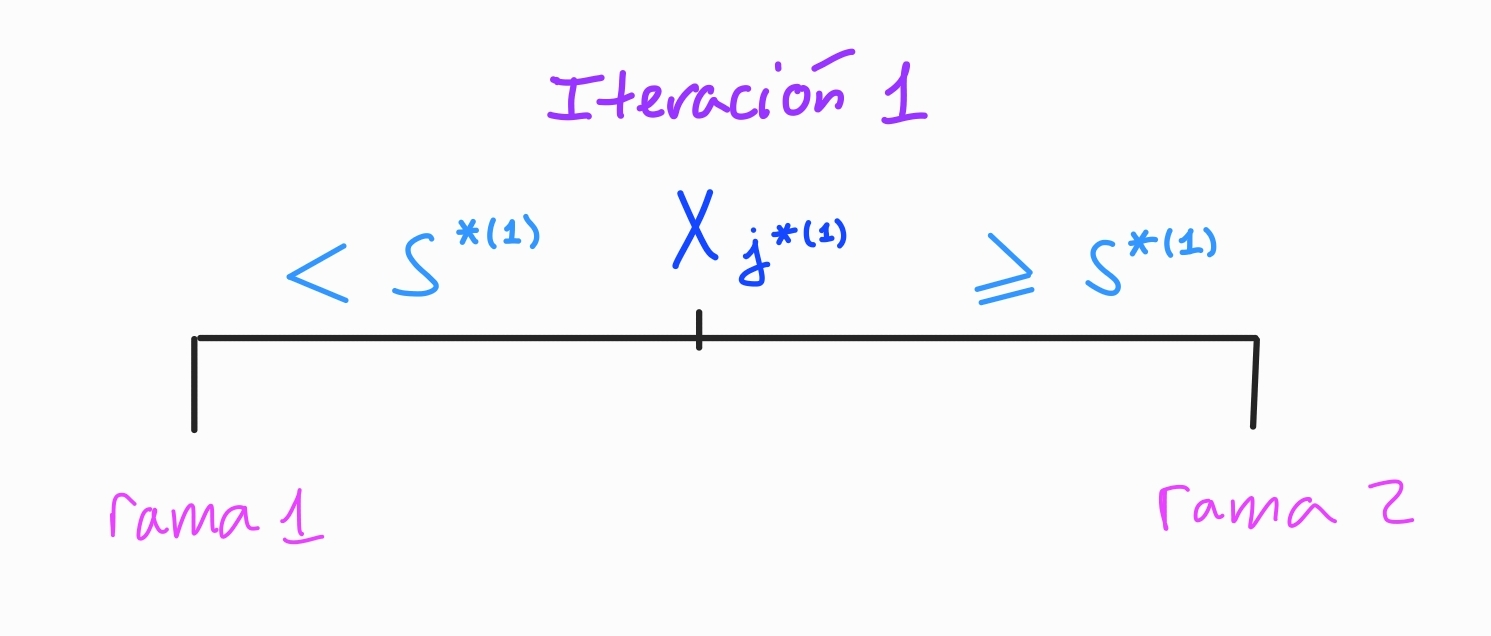

In [423]:
from IPython.display import Image
Image(filename='iter1.jpg', width = 600, height = 300) 

- Si alguna de las ramas del arbol resultante de resolver el problema la iteracion 1 tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

- Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

Notese que $k$ será un ***hiperparametro*** del algoritmo.

##### **Problema de la Iteracion 2**


Arbol con 2 iteraciones tras resolver el problema anterior:

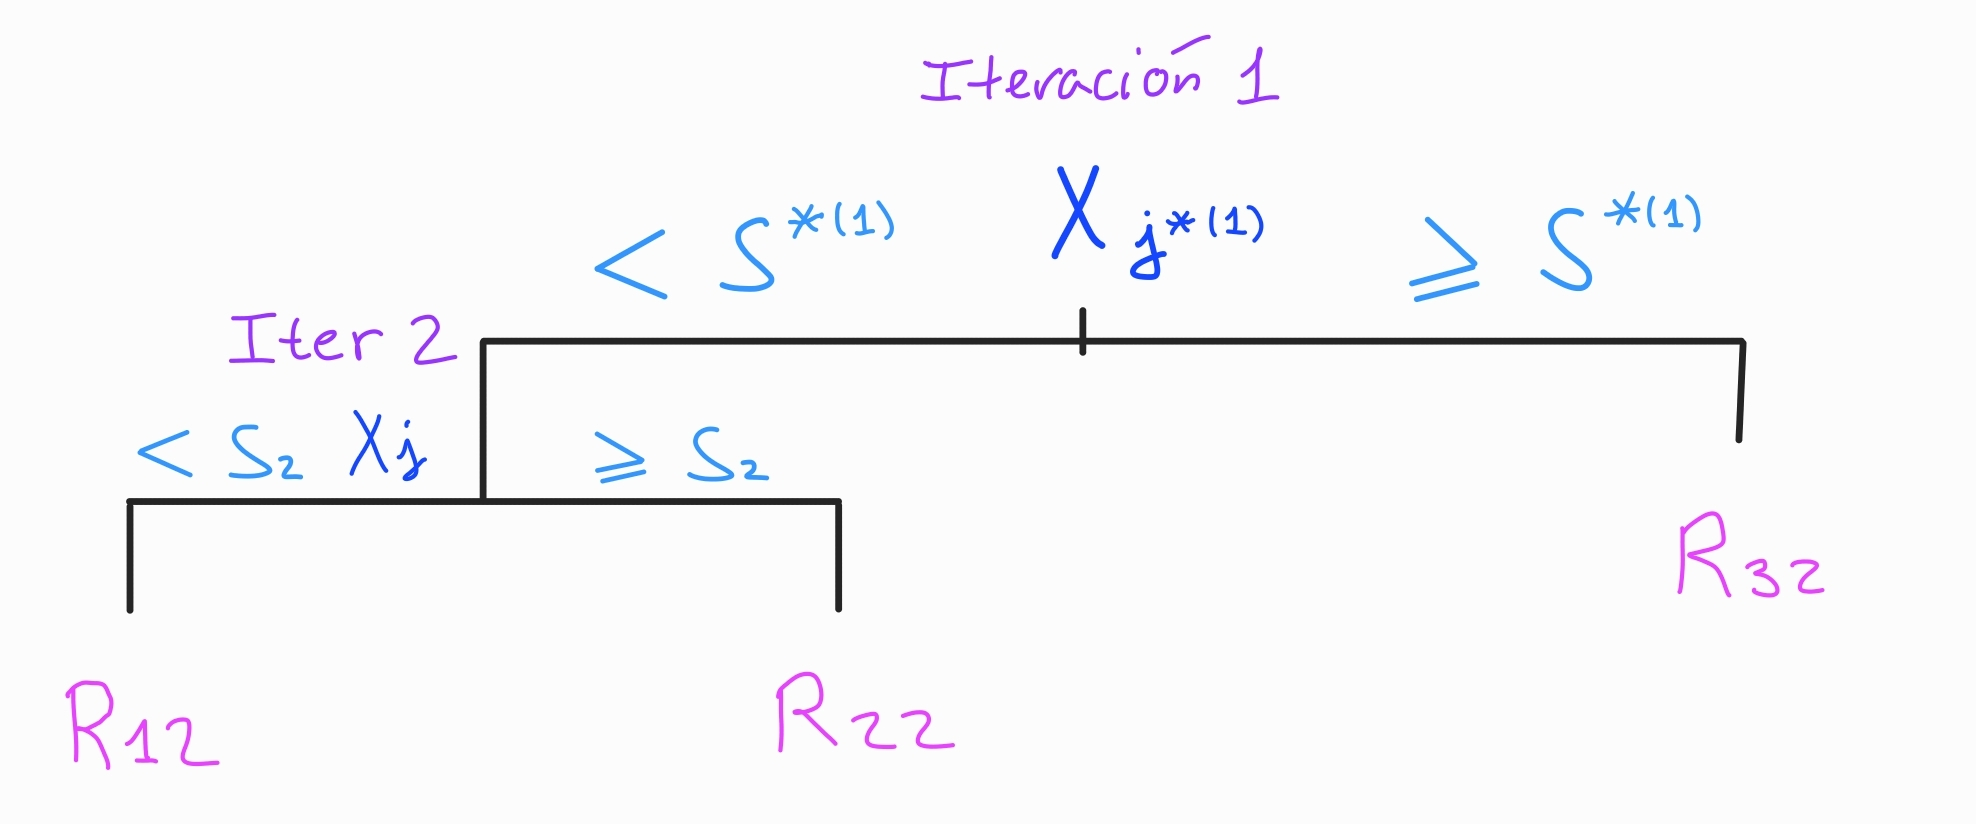

In [424]:
from IPython.display import Image
Image(filename='arbol 2iter.jpg', width = 600, height = 300) 

Si estamos en este problema es porque ninguna rama del arbol resultante del problema de la Iteracion 1 tiene menos de $k$ observaciones

La idea es, determinar las regiones $R_{12}$ , $R_{22}$ y $R_{32}$ del arbol con 2 iteraciones (es decir, $j$ y $s_2$), considerando la solucion del problema de la iteracion 1 (arbol de arriba) , que minimizan el error de entrenamiento global de dicho arbol.

Notese que $R_{32}$ ya esta determinada tras la resolucion del problema anterior, por ello realmente solo hay que determinar las regiones $R_{12}$ y $R_{22}$ óptimas (a saber, $j$ y $s_2$ óptimos)

Mas formalmente el problema planteado es:


- Si utilizamos la **TEC** como metrica de error a minimizar:

$$

\underset{R_{12}  ,  R_{22},  R_{32}}  {Min} \hspace{0.15cm}  \Biggl\{ \hspace{0.1cm} TEC_2 = TEC(R_{12})  +  TEC(R_{22}) +  TEC(R_{32}) \hspace{0.1cm} \Biggl\}   \hspace{0.1cm} =   \\[25pt]

=\hspace{0.2cm} \underset{R_{12}  ,  R_{22}, R_{32}}  {Min} \hspace{0.1cm} \Biggl\{  \hspace{0.2cm}  \left( 1 - f_{r^*_{R_{12}} , R_{12}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}       \left( 1 - f_{r^*_{R_{22}} , R_{22}} \right) \hspace{0.3cm} +  \hspace{0.1cm}    \left( 1 - f_{r^*_{R_{32}} , R_{32}} \right)  \hspace{0.2cm}  \Biggl\}  \\[25pt]


=\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_2}  {Min} \hspace{0.1cm} \Biggl\{ \hspace{0.2cm}     1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{12}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12}  \rbrace}      \hspace{0.4cm} +  \hspace{0.4cm}   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{22}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22}  \rbrace} \hspace{0.4cm} +    \hspace{0.4cm}       1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{32} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{32}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{32}  \rbrace}  \hspace{0.2cm}  \Biggl\}   \\[25pt]

=\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_2}  {Min} \hspace{0.1cm} \Biggl\{ \hspace{0.2cm}     1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{12}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }      \hspace{0.4cm} +  \hspace{0.4cm}      1 -  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{22}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace } \hspace{0.3cm} +    \hspace{0.1cm}       1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij^{*(1)}} \geqslant s^{*(1)} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{32}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij^{*(1)}} \geqslant s^{*(1)} \rbrace}  \hspace{0.2cm}  \Biggl\}

\\[25pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_2}  {Min} \hspace{0.1cm} \Biggl\{   \hspace{0.2cm}    1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{12}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }      \hspace{0.4cm} +  \hspace{0.4cm}   1 -  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{22}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }    \hspace{0.2cm}  \Biggl\} \\[35pt]


=\hspace{0.2cm} \underset{R_{12}  ,  R_{22} }  {Min} \hspace{0.1cm} \Biggl\{  \hspace{0.2cm}  \left( 1 - f_{r^*_{R_{12}} , R_{12}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}       \left( 1 - f_{r^*_{R_{22}} , R_{22}} \right)   \hspace{0.2cm}  \Biggl\}

$$


- Si utilizamos el **índice de Gini** como metrica de error a minimizar:

$$

\underset{R_{12}  ,  R_{22}, R_{32}}  {Min} \hspace{0.15cm} \Biggl\{  \hspace{0.1cm} G_1 = G_{R_{12}} + G_{R_{22}} +  G_{R_{32}}  \hspace{0.1cm} \Biggl\}    \hspace{0.1cm} =   \\[15pt] 

=\hspace{0.2cm} \underset{R_{12}  ,  R_{22}, R_{32}}  {Min} \hspace{0.1cm} \Biggl\{ \hspace{0.3cm}  \sum_{r=0,1,..,c-1}^{} f_{r , R_{12}}\cdot(1 - f_{r , R_{12}})  \hspace{0.1cm} + \hspace{0.1cm}  \sum_{r=0,1,..,c-1}^{} f_{r , R_{22}}\cdot(1 - f_{r , R_{22}}) \hspace{0.1cm} + \hspace{0.1cm}  \sum_{r=0,1,..,c-1}^{} f_{r , R_{32}}\cdot(1 - f_{r , R_{32}})  \hspace{0.3cm} \Biggl\}     \\[35pt] 

=\hspace{0.2cm}   \underset{R_{12}  ,  R_{22}  ,  R_{32}}  {Min} \hspace{0.1cm} \Biggl\{ \hspace{0.3cm}   \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12}  \rbrace}  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12}  \rbrace}  \right)  \\[25pt]



\hspace{0.3cm} +  \hspace{0.3cm}         \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22}  \rbrace}  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22}  \rbrace}  \right)    \\[20pt]  

\hspace{0.3cm} +  \hspace{0.3cm}  \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{32} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{32}  \rbrace}  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{32} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r  \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{32}  \rbrace}  \right)    \hspace{0.3cm} \Biggl\}     \\[35pt]

=  \hspace{0.2cm}   \underset{j  ,  s_2}  {Min} \hspace{0.1cm} \Biggl\{     \hspace{0.3cm}  \sum_{r=0,1,..,c-1}^{}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace } \cdot \left(   1 -  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace } \right) \\[25pt]

\hspace{0.3cm} +  \hspace{0.3cm}         \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }  \right)  \\[25pt]

\hspace{0.3cm} +  \hspace{0.3cm}         \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij^{*(1)}} \geqslant s^{*(1)} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij^{*(1)}} \geqslant s^{*(1)} \rbrace}  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij^{*(1)}} \geqslant s^{*(1)} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_{ij^{*(1)}} \geqslant s^{*(1)} \rbrace}  \right)      \hspace{0.3cm}       \Biggl\}  \\[35pt]
$$

$$
=  \hspace{0.2cm}   \underset{j  ,  s_2}  {Min} \hspace{0.1cm} \Biggl\{     \hspace{0.3cm}  \sum_{r=0,1,..,c-1}^{}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace } \cdot \left(   1 -  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace } \right) \\[25pt]

\hspace{0.3cm} +  \hspace{0.3cm}         \sum_{r=0,1,..,c-1}^{}  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }  \cdot \left(   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }  \right)    \Biggl\} \\[25pt]

= \hspace{0.2cm}  \underset{R_{12}  ,  R_{22} }  {Min} \hspace{0.1cm} \Biggl\{ \hspace{0.3cm}  \sum_{r=0,1,..,c-1}^{} f_{r , R_{12}}\cdot(1 - f_{r , R_{12}})  \hspace{0.1cm} + \hspace{0.1cm}  \sum_{r=0,1,..,c-1}^{} f_{r , R_{22}}\cdot(1 - f_{r , R_{22}})  \hspace{0.3cm} \Biggl\}  
 
$$


Notar  que:


Fijado $(j, s_2)$ puede calcularse $r_{R_{12}}^*$ como solucion al problema de maximizacion:




$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{12}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace }\right)  $$




Fijado $(j, s_2)$ puede calcularse $r_{R_{22}}^*$ como solucion al problema de maximizacion:




$$\underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm} f_{r, R_{22}} \hspace{0.1 cm}\right) = \underset{ r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{22}  \rbrace}  \hspace{0.1 cm}\right) = \underset{  r}{ Max} \hspace{0.05 cm} \left(\hspace{0.1 cm}   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_2  \hspace{0.1 cm} \rbrace } \right)  $$
 


Notese que ninguna de las siguientes expresiones:

 $$ \left( 1 - f_{r^*_{R_{32}} , R_{32}} \right) $$ 
 
 $$  \sum_{r=0,1,..,c-1}^{} f_{r , R_{32}}\cdot(1 - f_{r , R_{32}})$$
 
 dependen de $(j, s_2)$ , por lo que puede sacarse de la funcion objetivo de sus respectivos problemas de minimizacion sin que esto altere la solucion del problema.

Arbol tras resolver el problema de la Iteracion 2:


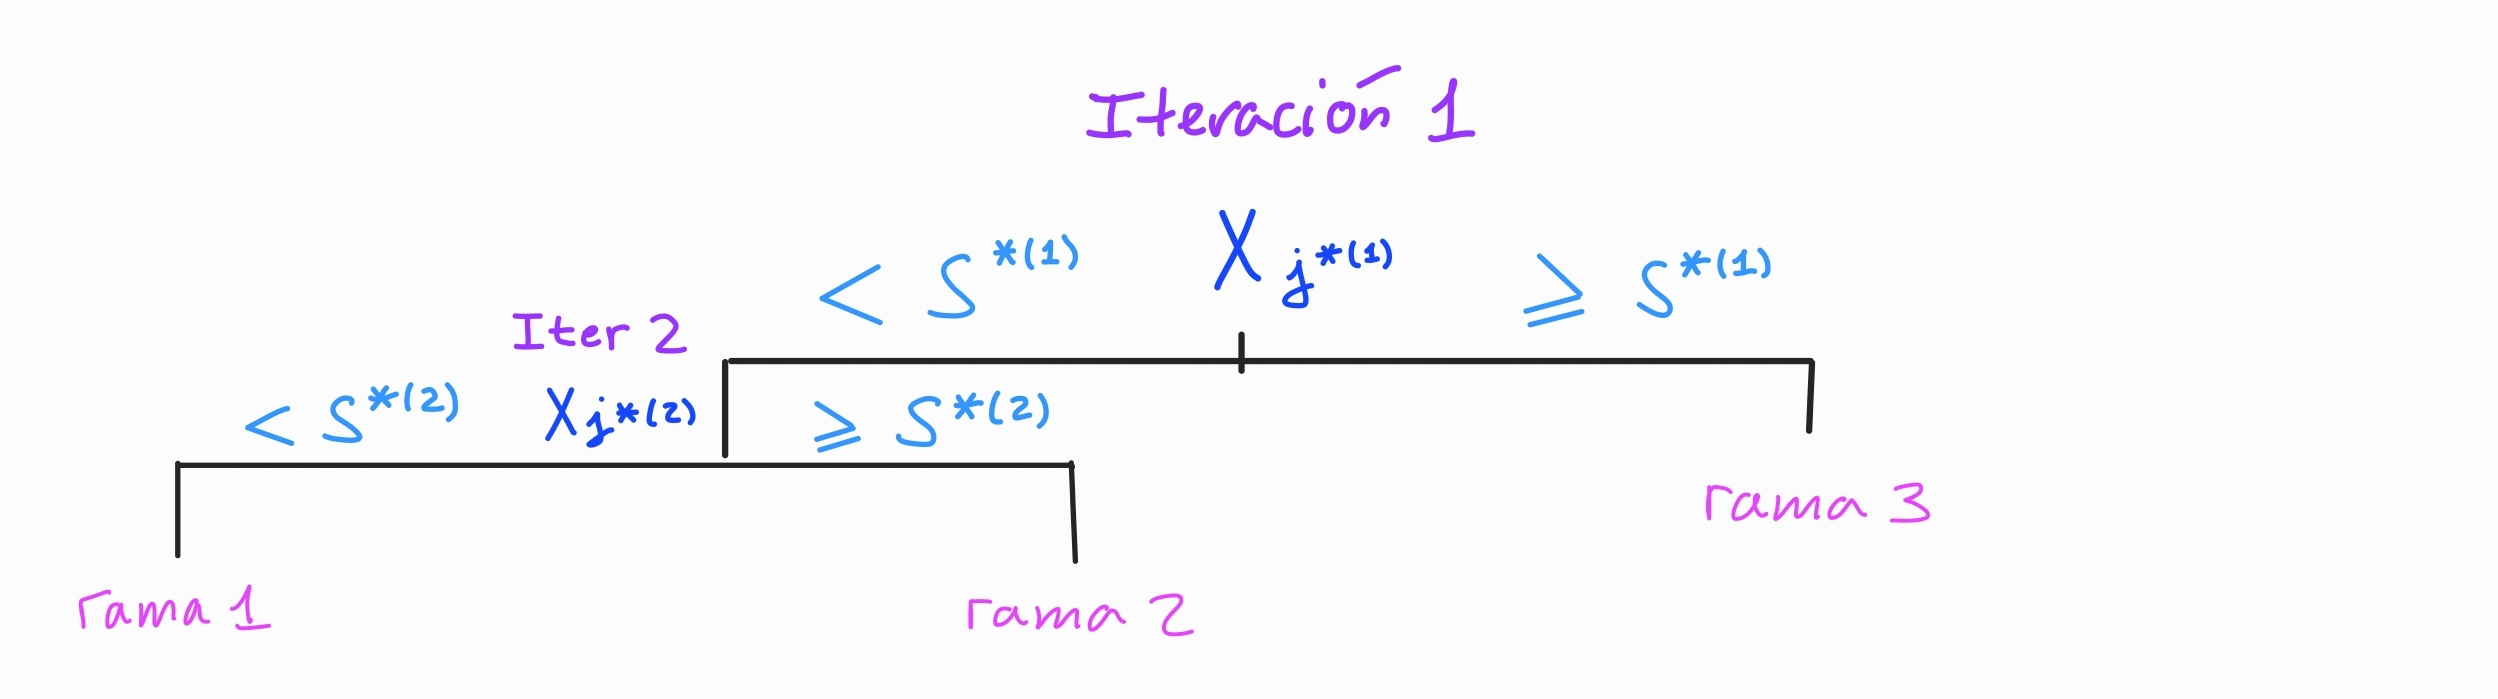

In [425]:
from IPython.display import Image
Image(filename='iter2.jpg', width = 940, height = 320)

- Si alguna de las ramas tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

- Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

##### **Problema de la Iteracion 3:**

Arbol con 3 iteraciones tras resolver el problema anterior:

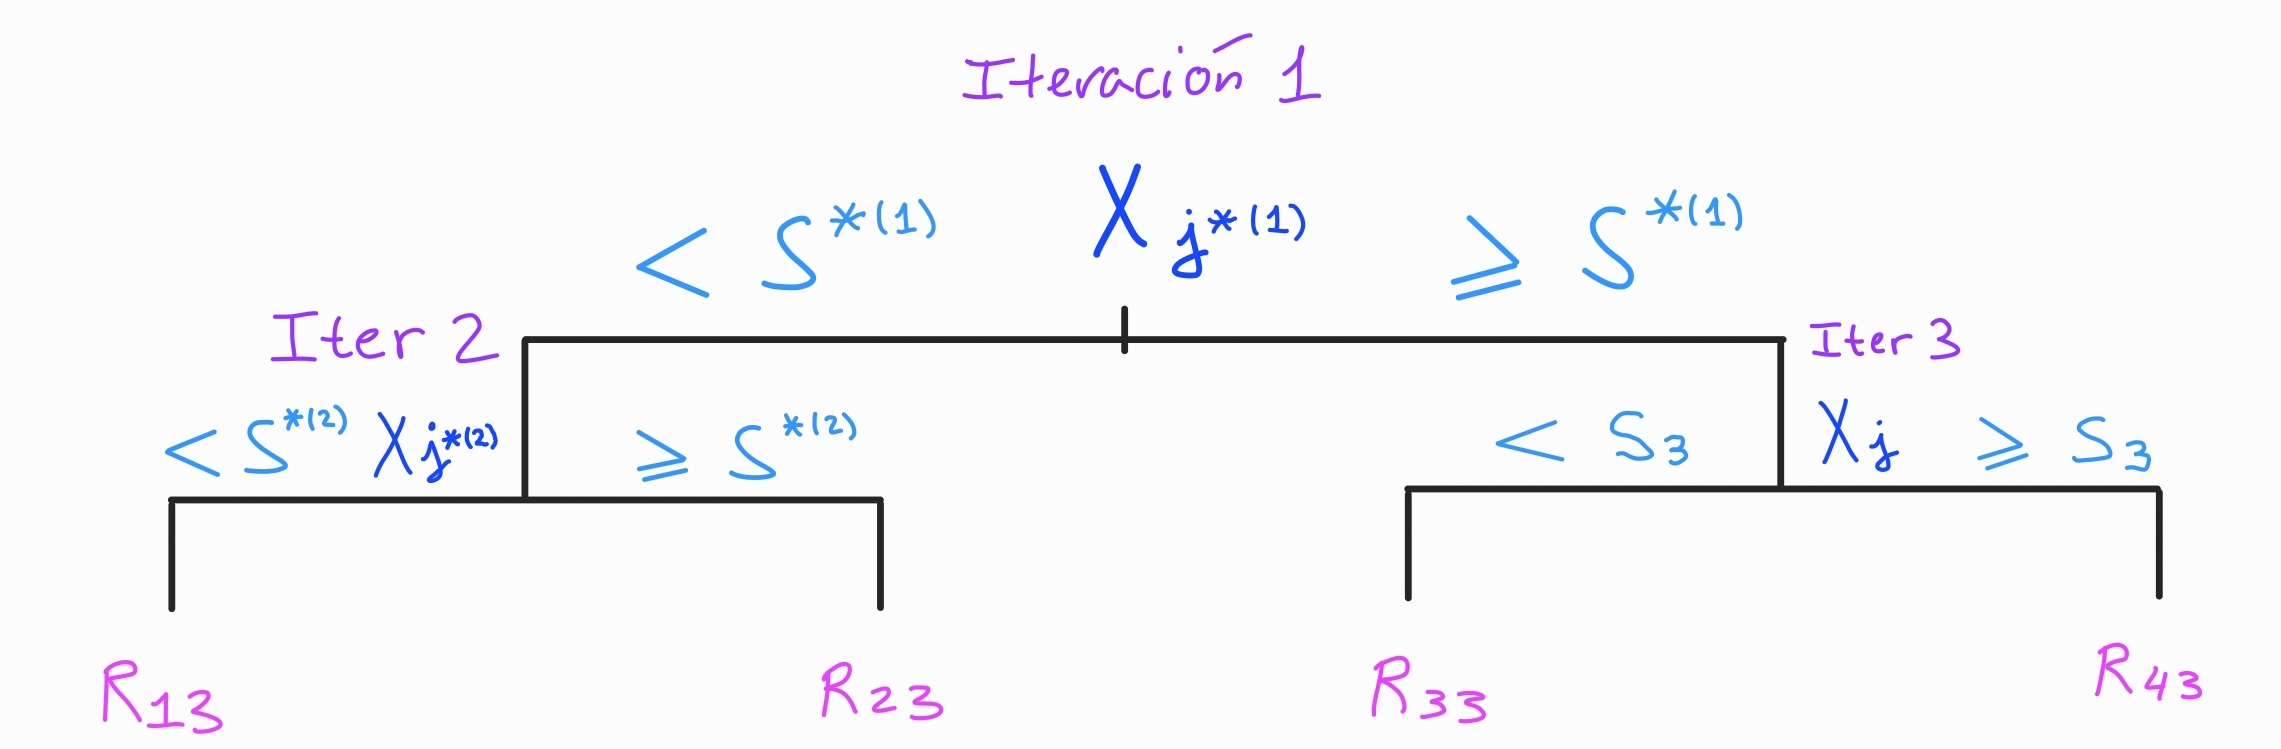

In [426]:
from IPython.display import Image
Image(filename='arbol 3iter.jpg', width = 940, height = 320)

Si estamos en este problema es porque ninguna rama del arbol resultante del problema de la Iteracion 2 tiene menos de $k$ observaciones

La idea es, determinar las regiones $R_{13}$ , $R_{23}$, $R_{33}$ y $R_{43}$ del arbol con 3 iteraciones $($ es decir, $j$ y $s_3 \hspace{0.05cm})$, considerando la solucion del problema de la iteracion 2 (arbol de arriba),  que minimizan el error de entrenamiento global de dicho arbol.

Notese que $R_{13}$ y $R_{23}$ ya están determinadas tras la resolucion del problema anterior, por ello realmente solo hay que determinar las regiones $R_{33}$ y $R_{43}$ óptimas (a saber, $j$ y $s_3$ óptimos)

Mas formalmente el problema se plantea como sigue:

$$

\underset{R_{13}  ,  R_{23},  R_{33},  R_{43}}  {Min} \hspace{0.15cm}  \Biggl\{\hspace{0.1cm} TEC_3 = TEC(R_{13})  +  TEC(R_{23}) +  TEC(R_{33}) +  TEC(R_{43}) \hspace{0.1cm} \Biggl\}   \hspace{0.1cm} =   \\[25pt] 

=\hspace{0.2cm} \underset{R_{13}  ,  R_{23},  R_{33},  R_{43}}  {Min} \hspace{0.1cm}  \Biggl\{ \hspace{0.2cm}   \left( 1 - f_{r^*_{R_{13}} , R_{13}} \right)   \hspace{0.3cm} +  \hspace{0.1cm}    \left( 1 - f_{r^*_{R_{23}} , R_{23}} \right) \hspace{0.3cm} +  \hspace{0.1cm}    \left( 1 - f_{r^*_{R_{33}} , R_{33}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}    \left( 1 - f_{r^*_{R_{43}} , R_{43}} \right)  \hspace{0.2cm}   \Biggl\}     \\[25pt] 


=\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_3}  {Min} \hspace{0.1cm}  \Biggl\{ \hspace{0.2cm}     1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{13} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{13}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{12}  \rbrace}      \hspace{0.4cm} +  \hspace{0.4cm}   1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{23} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{23}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{23}  \rbrace} \hspace{0.4cm} +    \hspace{0.4cm}   \\[35pt]     1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{33} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{33}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{33}  \rbrace}   \hspace{0.4cm} +    \hspace{0.4cm}       1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{43} \hspace{0.15 cm}\text{y}\hspace{0.15 cm} y_i = r^*_{R_{43}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm} x_i \in R_{43}  \rbrace} \hspace{0.2cm}    \Biggl\}  \\[35pt]  

=\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_3}  {Min} \hspace{0.1cm} \Biggl\{ \hspace{0.2cm}     1 - \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij^{*(2)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{13}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(2)}  \hspace{0.1 cm} \rbrace }      \hspace{0.4cm} +  \hspace{0.4cm}     1 -  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(2)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{23}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(2)}  \hspace{0.1 cm} \rbrace } \hspace{0.3cm} +    \hspace{0.1cm}  \\[35pt]

 \hspace{1cm}  1 -  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}  < \hspace{0.05cm} s_3 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{33}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_3  \hspace{0.1 cm} \rbrace }  \hspace{0.2cm}   \hspace{0.3cm} +    \hspace{0.3cm} 

1 -  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}  \geqslant \hspace{0.05cm} s_3 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{43}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_3  \hspace{0.1 cm} \rbrace }  \hspace{0.2cm} \Biggl\}

\\[25pt]  =\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_3}  {Min} \hspace{0.1cm} \Biggl\{   \hspace{0.2cm}    1 -   \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}  < \hspace{0.05cm} s_3 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{33}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   < \hspace{0.05cm} s_3  \hspace{0.1 cm} \rbrace }    \hspace{0.3cm} +    \hspace{0.3cm}        1 -  \dfrac{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm}/\hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}  \geqslant \hspace{0.05cm} s_3 \hspace{0.25 cm}\text{y}\hspace{0.25 cm} y_i = r^*_{R_{43}} \rbrace}{\# \hspace{0.1 cm}\lbrace i \hspace{0.1 cm} / \hspace{0.1 cm}  x_{ij^{*(1)}} \hspace{0.05cm}   < \hspace{0.05cm} s^{*(1)} \hspace{0.25 cm}\text{y}\hspace{0.25 cm} x_{ij} \hspace{0.05cm}   \geqslant \hspace{0.05cm} s_3  \hspace{0.1 cm} \rbrace }  \hspace{0.2cm}      \Biggl\} \\[35pt]

=\hspace{0.2cm}   \underset{j \hspace{0.02cm},\hspace{0.02cm} s_3}  {Min} \hspace{0.1cm}  \Biggl\{ \hspace{0.2cm}    \left( 1 - f_{r^*_{R_{33}} , R_{33}} \right)  \hspace{0.3cm} +  \hspace{0.1cm}     \left( 1 - f_{r^*_{R_{43}} , R_{43}} \right)   \hspace{0.2cm}  \Biggl\} \\[25pt]

=\hspace{0.2cm} \underset{  R_{33},  R_{43}}  {Min} \hspace{0.15cm}  \Biggl\{\hspace{0.1cm} TEC(R_{33}) +  TEC(R_{43}) \hspace{0.1cm} \Biggl\}   \hspace{0.1cm} 
$$


Notar  que:


Fijado $(j, s_3)$ puede calcularse $r_{R_{33}}^*$ como solucion al problema de maximizacion:



Arbol tras resolver el problema de la Iteracion 3

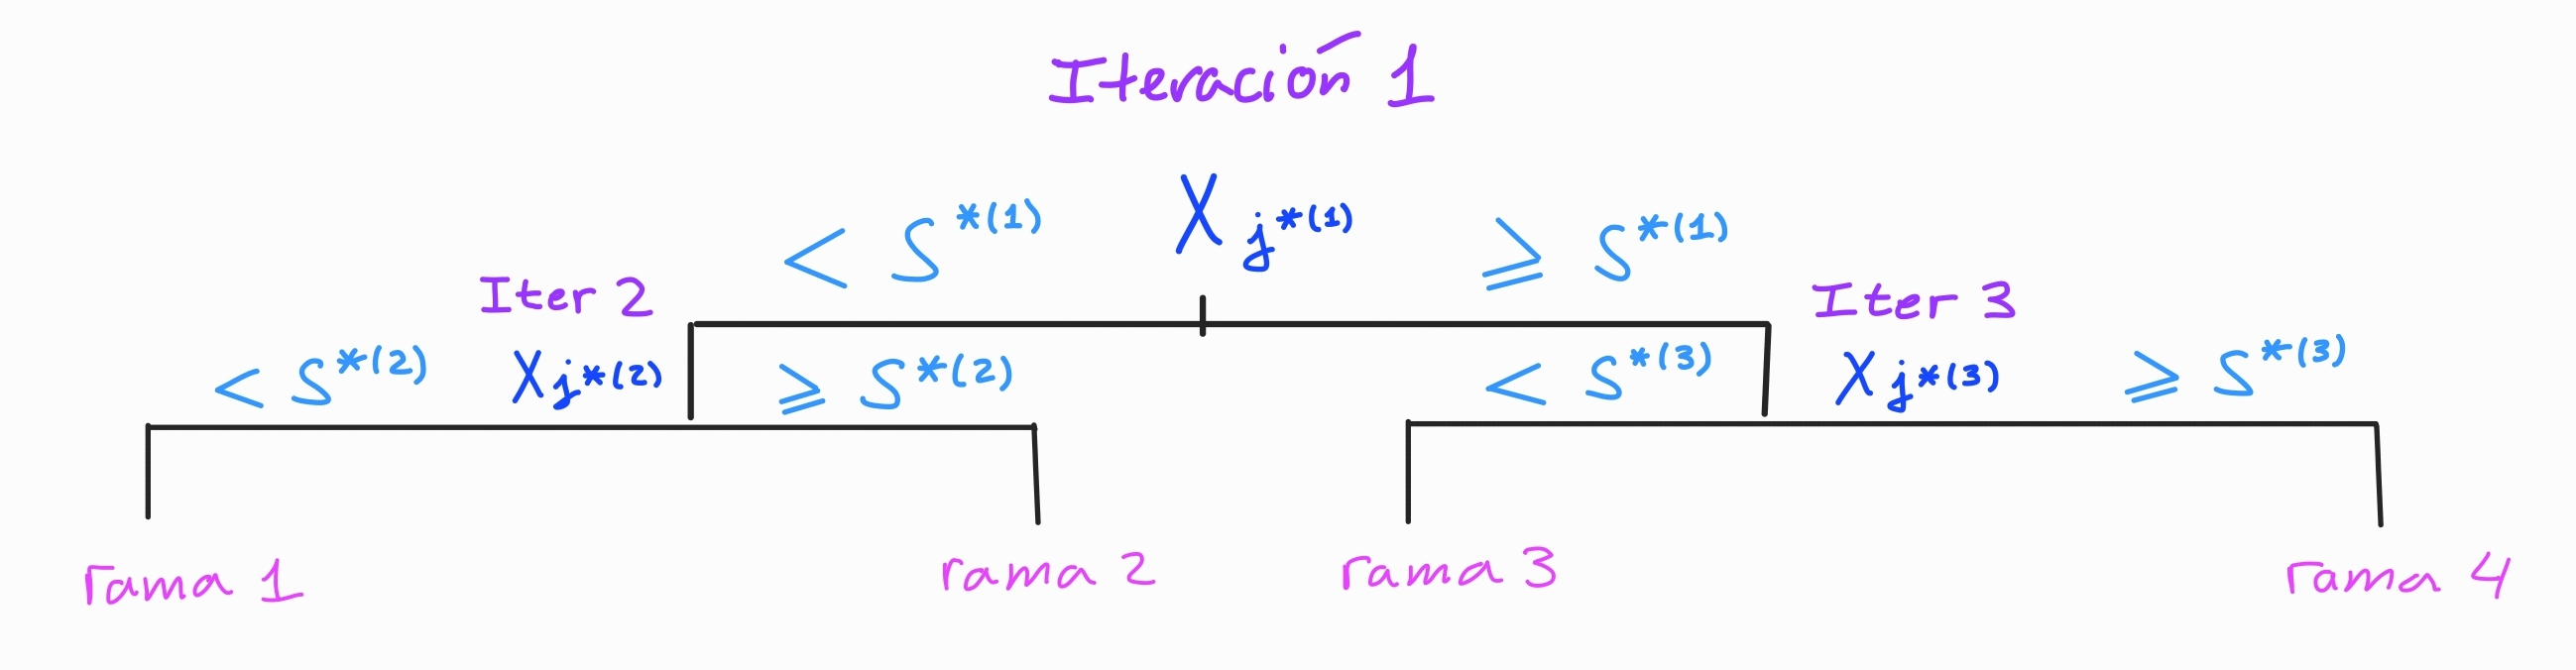

In [427]:
from IPython.display import Image
Image(filename='iter3.jpg', width = 900, height = 300)

- Si alguna de las ramas tiene menos de $\hspace{0.05cm}k\hspace{0.05cm}$ observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ se para el algoritmo

- Si todas las ramas tienen $\hspace{0.05cm}k\hspace{0.05cm}$ o mas observaciones de train $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ el algoritmo continua, se pasa a resolver el problema de la iteracion siguiente, en este caso el de la iteracion 2

Siempre que no se cumpla la condicion de parada se seguiria haciendo crecer el arbol generando nuevas iteraciones.

No seguiremos exponiendo mas iteraciones del algoritmo, puesto que es facilmente extrapolable lo expuesto a cualquier iteracion superior.

### Arboles de Clasificación Penalizados  <a class="anchor" id="2.4"></a>

La idea es esencialmente la misma la ya comentada en la sección de arboles de regresion penalizados.

Los arboles de clasificación penalizados son esencialemte iguales que los arboles de clasificacion ordinarios pero tienen una modificacion en el problema de optimizacion tal que permiten penalizar los arboles con muchas ramas. 

El problema de optimizacion a resolver en los arboles de regresion ordinarios (usando Gini como métrica, sin perdida de generalidad) era:


$$ \underset{R_1,..,R_m}{Min}  \hspace{0.12cm}  \sum_{h=1}^{m} \hspace{0.1cm} G_{R_{ht}}  $$


En los arboles de regresion penalizados el problema a resolver es:

$$ \underset{R_1,..,R_m}{Min}  \hspace{0.12cm}  \sum_{h=1}^{m} \hspace{0.1cm} G_{R_{ht}} + \alpha \cdot m $$

Donde $m$ es el numero de ramas del arbol 

De este modo, si \alpha = 0 estamos en el caso de arboles de clasificacion ordinarios.

Si $\alpha > 0$ , entonces se penalizara el numero de ramas del arbil (m).

Dado un $\alpha >0$ , cuanto mayor sea el tamaño del arbol (m) mas dificil sera que sea optimo en el sentido de que resuelva el probema deminimizacion. Y viceversa.

Cuanto mayor sea \alpha mas se estará penalizando a los arboles de tamaño grande.

Con $\alpha >0$ ( y especialmente $\alpha >> 0$ ( relativamente grandes)) tienden a salir como optimos arboles que son mas pequeños que los que salen pusando elalgoritmo ordinario (sin penalizacion).

En el algoritmo ordinario se prioriza que el arbol se ajuste a los datos de entrenamiento, lo que psuele provocar overfiting (sobreajuse). Esto es un problema porque hace que el arbol funcione muy bien (prediga bien) en la muestra de entrenamiento (cuando usa los datos que ya ha "visto"), pero bastante peor en la muestra de test. Estos modelos tendran poco sesgo pero mucha varianza a nivel predictivo, lo cual es negativo.

El algoritmo penalizado permite obtener un equilibrio entre sesgo y varianza a traves del parametro de penalizacion $\alpha$

La idea es seleccionar un alpha que nos genere un modelo con quiza un poco mas de sesgo pero con considerable menos varianza que el ordinario, lo cualq conduzca a un erro de prediccion menor que en el caso ordinario.


**¿ Cómo escoger $\alpha$ en la practica ?**

Una idea razonable es entrenar un arbol con los mismos datos de entrenamiento pero con $B$ distintos $\alpha$

Calcular con una muestra de test el error de cada uno de los $B$ modelos.

Quedarse con el  $\alpha$ asociado al modelo con menor error de test.

Una cuestion relevante aqui es como definir el conjunto de $B$ valores de $\alpha$ que se van a tener en consideracion. 

No entraremos aqui en esta cuestión.

### Arboles de clasificación: Algoritmo de creación propia en `Python` <a class="anchor" id="28"></a>

#### Algoritmo de creacion propia con TEC <a class="anchor" id="10"></a>

In [428]:
def classification_tree(Data_set, iterations_vector, k, Y_categories) :

# POR AHORA SOLO GENERA 4 ITERACIONES EN EL ARBOL --> iterations_vector = range(1,5) como mucho (=[1,2,3,4])

# Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p

# Si se quiere que el arbol tenga como mucho 3 iteraciones --> iterations_vector = range(1,4) = [1,2,3]

# Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

# k = numero de obsrevaciones minimas por rama del arbol --> criterio de parada

########################################################################
    
    def s_values(j, Data_set):

        s_values = []

        if  (Data_set.dtypes[j] != 'float64') & (Data_set.dtypes[j] != 'int64') : # Para las variables categoricas s_value sera simplemente su rango.

            s_values = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()


        elif (Data_set.dtypes[j] == 'float64') | (Data_set.dtypes[j] == 'int64') :

            Xj_sorted = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()

        
            for i in range(0, len(Xj_sorted)-1):

                s_values.append( (Xj_sorted[i] + Xj_sorted[i+1] ) / 2  )

    
        return s_values


########################################################################  

   ## ITERACION 1

    if iterations_vector[0] == 1 : # nacimiento del arbol

        
        ###################################
        
        def f_R11(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R11 = len(Data_set.loc[ (Data_set.iloc[:, j] < s) , : ] )

            if  cond_R11 != 0 :

                f_R11 = len( Data_set.loc[ (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / len( Data_set.loc[ (Data_set.iloc[:, j] < s) , : ] )

            
            elif cond_R11 == 0 :

                f_R11 = 0

            
            return f_R11 

        ######################################

        def f_R21(j, s, r, Data_set):

            cond_R21 = len(Data_set.loc[ (Data_set.iloc[:, j] >= s) , : ] )

            if cond_R21 != 0 :

                f_R21 = len( Data_set.loc[ (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / len( Data_set.loc[ (Data_set.iloc[:, j] >= s) , : ] )
            
            elif cond_R21 == 0 :

                f_R21 = 0

            
            return f_R21 


        ###################################

        TEC_vector = []
        j_vector = []
        s_vector = []

        j_star_vector = []
        s_star_vector = []
        TEC_star_vector = []

        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R11 :

                f_R11_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R11_r_vector.append( f_R11(j, s, r , Data_set) )

                f_R11_df = pd.DataFrame({'r':Y_categories  , 'f_R11':f_R11_r_vector })
        
                f_R11_df_sorted = f_R11_df.sort_values(by=['f_R11'], axis=0, ascending=False, ignore_index=True)

                r_star_R11 = f_R11_df_sorted.loc[0, 'r']


                # Busqueda de r_star_R21 :

                f_R21_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R21_r_vector.append( f_R21(j, s, r , Data_set) )

                f_R21_df = pd.DataFrame({'r':Y_categories  , 'f_R21':f_R21_r_vector })
        
                f_R21_df_sorted = f_R21_df.sort_values(by=['f_R21'], axis=0, ascending=False, ignore_index=True)

                r_star_R21 = f_R21_df_sorted.loc[0, 'r']


                # Calculo de TEC_1 para la combinacion (j, s) dada:

                TEC_1 = 1- f_R11(j, s, r_star_R11, Data_set) + 1- f_R21(j, s, r_star_R21, Data_set)

                TEC_vector.append(TEC_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        TEC_df = pd.DataFrame({'TEC':TEC_vector, 'j':j_vector, 's':s_vector})

        TEC_df_sorted = TEC_df.sort_values(by=['TEC'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( TEC_df_sorted.loc[0, 's'] )
        j_star_vector.append( TEC_df_sorted.loc[0, 'j'] )
        TEC_star_vector.append(TEC_df_sorted.loc[0, 'TEC'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...    
        
      ###################################

        # Condicion de parada:

        obs_r11 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0] , : ] )
        obs_r21 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0] , : ] )

        if(obs_r11 < k) | (obs_r21 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=1

            obs_ramas = [obs_r11 , obs_r21]

       
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 

            ###################

        elif (obs_r11 >= k) & (obs_r21 >= k) : # No se cumple el criterio de parada

            pass


######################################################################################

    ## ITERACION 2   ·········· POR MODIFICAR !! ·············

    if iterations_vector[1] == 2 :  # Desarrollar nodo R1 de la 1ª iteracion

        ################################################################


        def f_R12(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R12 != 0 :

                f_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R12

            
            elif cond_R12 == 0 :

                f_R12 = 0

            
            return f_R12 

        #########

        def f_R22(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R22 != 0 :

                f_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R22

            
            elif cond_R22 == 0 :

                f_R22 = 0

            
            return f_R22 


        ###################################

        TEC_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R12 :

                f_R12_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R12_r_vector.append( f_R12(j, s, r , Data_set) )

                f_R12_df = pd.DataFrame({'r':Y_categories  , 'f_R12':f_R11_r_vector })
        
                f_R12_df_sorted = f_R12_df.sort_values(by=['f_R12'], axis=0, ascending=False, ignore_index=True)

                r_star_R12 = f_R11_df_sorted.loc[0, 'r']


                # Busqueda de r_star_R22 :

                f_R22_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R22_r_vector.append( f_R22(j, s, r , Data_set) )

                f_R22_df = pd.DataFrame({'r':Y_categories , 'f_R22':f_R22_r_vector })
        
                f_R22_df_sorted = f_R22_df.sort_values(by=['f_R22'], axis=0, ascending=False, ignore_index=True)

                r_star_R22 = f_R22_df_sorted.loc[0, 'r']


                # Calculo de TEC_1 para la combinacion (j, s) dada:

                TEC_2 = 1- f_R12(j, s, r_star_R12, Data_set) + 1- f_R22(j, s, r_star_R22, Data_set)

                TEC_vector.append(TEC_2)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        TEC_df = pd.DataFrame({'TEC':TEC_vector, 'j':j_vector, 's':s_vector})

        TEC_df_sorted = TEC_df.sort_values(by=['TEC'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( TEC_df_sorted.loc[0, 's'] )
        j_star_vector.append( TEC_df_sorted.loc[0, 'j'] )
        TEC_star_vector.append(TEC_df_sorted.loc[0, 'TEC'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,... 


      ###################################

        # Condicion de parada:

        obs_r12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) , : ] )

        if(obs_r12 < k) | (obs_r22 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 2 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=2
            
            obs_ramas = [obs_r12 , obs_r22, obs_r32]

        
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 

            ###################


        elif (obs_r12 >= k) & (obs_r22 >= k) : # No se cumple el criterio de parada

            pass



####################################################################################

## ITERACION 3

    if iterations_vector[2] == 3 :  # Desarrollar nodo R2 de la 1ª iteracion -->  considerar j_star_vector[0] y s_star_vector[0] (1ª iteracion) y >= (R2)

       #########################################

        def f_R33(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R33 != 0 :

                f_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R33

            
            elif cond_R33 == 0 :

                f_R33 = 0
            
            return f_R33

        #########

        def f_R43(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R43 != 0 :

                f_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R43

            
            elif cond_R43 == 0 :

                f_R43 = 0

            
            return f_R43 

        
        ###################################

        TEC_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R11 :

                f_R33_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R33_r_vector.append( f_R33(j, s, r , Data_set) )

                f_R33_df = pd.DataFrame({'r':Y_categories  , 'f_R33':f_R11_r_vector })
        
                f_R33_df_sorted = f_R33_df.sort_values(by=['f_R33'], axis=0, ascending=False, ignore_index=True)

                r_star_R33 = f_R11_df_sorted.loc[0, 'r']


                # Busqueda de r_star_R21 :

                f_R43_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R43_r_vector.append( f_R43(j, s, r , Data_set) )

                f_R43_df = pd.DataFrame({'r':Y_categories  , 'f_R43':f_R21_r_vector })
        
                f_R43_df_sorted = f_R43_df.sort_values(by=['f_R43'], axis=0, ascending=False, ignore_index=True)

                r_star_R43 = f_R43_df_sorted.loc[0, 'r']


                # Calculo de TEC_1 para la combinacion (j, s) dada:

                TEC_1 = 1- f_R33(j, s, r_star_R33, Data_set) + 1- f_R43(j, s, r_star_R43, Data_set)

                TEC_vector.append(TEC_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        TEC_df = pd.DataFrame({'TEC':TEC_vector, 'j':j_vector, 's':s_vector})

        TEC_df_sorted = TEC_df.sort_values(by=['TEC'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( TEC_df_sorted.loc[0, 's'] )
        j_star_vector.append( TEC_df_sorted.loc[0, 'j'] )
        TEC_star_vector.append(TEC_df_sorted.loc[0, 'TEC'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,... 


      ###################################

        # Condicion de parada:

        obs_r13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )

        obs_r33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r33 < k) | (obs_r43 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 3
            
            obs_ramas = [obs_r13, obs_r23, obs_r33 , obs_r43]

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 

            ###################


        elif (obs_r33 >= k) & (obs_r43 >= k) : # No se cumple el criterio de parada

            pass

    #######################


    ## ITERACION 4

    if iterations_vector[3] == 4 :  

       #########################################

       #########################################

        def f_R14(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R14 != 0 :

                f_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R14

            
            elif cond_R14 == 0 :

                f_R14 = 0

            
            return f_R14 

        #########

        def f_R24(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R24 != 0 :

                f_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R24

            
            elif cond_R24 == 0 :

                f_R24 = 0

            
            return f_R24 


 ###################################

        TEC_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R11 :

                f_R14_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R14_r_vector.append( f_R14(j, s, r , Data_set) )

                f_R14_df = pd.DataFrame({'r':Y_categories  , 'f_R14':f_R11_r_vector })
        
                f_R14_df_sorted = f_R14_df.sort_values(by=['f_R14'], axis=0, ascending=False, ignore_index=True)

                r_star_R14 = f_R11_df_sorted.loc[0, 'r']


                # Busqueda de r_star_R21 :

                f_R24_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R24_r_vector.append( f_R24(j, s, r , Data_set) )

                f_R24_df = pd.DataFrame({'r':Y_categories  , 'f_R24':f_R21_r_vector })
        
                f_R24_df_sorted = f_R24_df.sort_values(by=['f_R24'], axis=0, ascending=False, ignore_index=True)

                r_star_R24 = f_R24_df_sorted.loc[0, 'r']


                # Calculo de TEC_1 para la combinacion (j, s) dada:

                TEC_1 = 1- f_R14(j, s, r_star_R14, Data_set) + 1- f_R24(j, s, r_star_R24, Data_set)

                TEC_vector.append(TEC_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        TEC_df = pd.DataFrame({'TEC':TEC_vector, 'j':j_vector, 's':s_vector})

        TEC_df_sorted = TEC_df.sort_values(by=['TEC'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( TEC_df_sorted.loc[0, 's'] )
        j_star_vector.append( TEC_df_sorted.loc[0, 'j'] )
        TEC_star_vector.append(TEC_df_sorted.loc[0, 'TEC'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...        


      ###################################

        # Condicion de parada:

        obs_r14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) , : ] )
        obs_r24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) , : ] )

        obs_r34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r14 < k) | (obs_r24 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34 , obs_r44, obs_r54]

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 

            ###################


        elif (obs_r14 >= k) & (obs_r24 >= k) : # No se cumple el criterio de parada

            print('Se ha generado el arbol mas grande permitido por el algoritmo (arbol con 4 Iteraciones)')

        # Aunque no se haya cummplido el criterio de parada como esta es la ultima Iteracion contemplada por el algoritmo, 
        # debemos calcular las metricas finales para que sean escupidas por el algoritmo. 
            
            number_iterations=4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34, obs_r44, obs_r54]

            
              
            pass

    #######################
        
   
    return( number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas ) 


Definimos una funcion para obtener predicciones de la respuesta:

In [429]:
def classification_tree_PREDICTIONS(Data_set, Y_categories, number_iterations, j_star_vector, s_star_vector, obs_ramas, x_new):

    if number_iterations == 1 :

            obs_r11 = obs_ramas[0]
            obs_r21 = obs_ramas[1]


        ### Prediccion:

            # Si x_new cae en R11 

            if x_new[j_star_vector[0] - 1] < s_star_vector[0] :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                
                def f_R11(r, Data_set):

                    cond_R11 = len(Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) , : ] )

                    if  cond_R11 != 0 :

                        f_R11 = len( Data_set.loc[  (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R11

            
                    elif cond_R11 == 0 :

                        f_R11 = 0
 
            
                    return f_R11
                


                # Busqueda de r_star_R11 :

                f_R11_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R11_r_vector.append( f_R11(r , Data_set) )

                f_R11_df = pd.DataFrame({'r':Y_categories  , 'f_R11':f_R11_r_vector })
        
                f_R11_df_sorted = f_R11_df.sort_values(by=['f_R11'], axis=0, ascending=False, ignore_index=True)

                r_star_R11 = f_R11_df_sorted.loc[0, 'r']

                y_new_predict = r_star_R11 

                
                
            # Si x_new cae en r21

            elif x_new[j_star_vector[0] - 1] >= s_star_vector[0] :  
                
                
                def f_R21(r, Data_set):

                    cond_R21 = len(Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) , : ] )

                    if cond_R21 != 0 :

                        f_R21 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R21
            
                    elif cond_R21 == 0 :

                        f_R21 = 0

                    return f_R21

            
            # Busqueda de r_star_R21 :

                f_R21_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R21_r_vector.append( f_R21(r , Data_set) )

                f_R21_df = pd.DataFrame({'r':Y_categories  , 'f_R21':f_R21_r_vector })
        
                f_R21_df_sorted = f_R21_df.sort_values(by=['f_R21'], axis=0, ascending=False, ignore_index=True)

                r_star_R21 = f_R21_df_sorted.loc[0, 'r']

                y_new_predict = r_star_R21 

    ###################################       

        
    if number_iterations == 2 :

            obs_r12 = obs_ramas[0]
            obs_r22 = obs_ramas[1]
            obs_r32 = obs_ramas[2]


        ### Prediccion:

            # Si x_new cae en R12
           
            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...


                def f_R12(r, Data_set):

 
                    cond_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] ) 

                    if  cond_R12 != 0 :

                        f_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R12

            
                    elif cond_R12 == 0 :

                        f_R12 = 0

                
            # Busqueda de r_star_R12 :

                f_R12_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R12_r_vector.append( f_R12(r , Data_set) )

                f_R12_df = pd.DataFrame({'r':Y_categories  , 'f_R12':f_R12_r_vector })
        
                f_R12_df_sorted = f_R12_df.sort_values(by=['f_R12'], axis=0, ascending=False, ignore_index=True)

                r_star_R12 = f_R12_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R12



            
            # Si x_new cae en R22

            elif (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1])  :

                
                def f_R22(r, Data_set):

                    cond_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] ) 

                    if  cond_R22 != 0 :

                        f_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R22

            
                    elif cond_R22 == 0 :

                        f_R22 = 0

            
                    return f_R22 

                
            # Busqueda de r_star_R22 :

                f_R22_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R22_r_vector.append( f_R22(r , Data_set) )

                f_R22_df = pd.DataFrame({'r':Y_categories  , 'f_R22':f_R22_r_vector })
        
                f_R22_df_sorted = f_R22_df.sort_values(by=['f_R22'], axis=0, ascending=False, ignore_index=True)

                r_star_R22 = f_R22_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R22


 

            # Si x_new cae en R32

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) :

                def f_R32(r, Data_set):

                        cond_R32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) , : ] ) 

                        if  cond_R32 != 0 :

                            f_R32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R32

            
                        elif cond_R32 == 0 :

                            f_R32 = 0
           
                        return f_R32 

                
            # Busqueda de r_star_R32 :

                f_R32_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R32_r_vector.append( f_R32(r , Data_set) )

                f_R32_df = pd.DataFrame({'r':Y_categories  , 'f_R32':f_R32_r_vector })
        
                f_R32_df_sorted = f_R22_df.sort_values(by=['f_R32'], axis=0, ascending=False, ignore_index=True)

                r_star_R32 = f_R32_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R32


        
    if number_iterations == 3:

            obs_r13 = obs_ramas[0]
            obs_r23 = obs_ramas[1]
            obs_r33 = obs_ramas[2]
            obs_r43 = obs_ramas[3]

        ### Prediccion:

            # Si x_new cae en R13

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                def f_R13(r, Data_set):

                    cond_R13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] ) 

                    if  cond_R13 != 0 :

                        f_R13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R13

                    elif cond_R13 == 0 :

                        f_R13 = 0

                    return f_R13

                
            # Busqueda de r_star_R13

                f_R13_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R13_r_vector.append( f_R13(r , Data_set) )

                f_R13_df = pd.DataFrame({'r':Y_categories  , 'f_R13':f_R13_r_vector })
        
                f_R13_df_sorted = f_R13_df.sort_values(by=['f_R13'], axis=0, ascending=False, ignore_index=True)

                r_star_R13 = f_R13_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R13



        # Si x_new cae en R23


            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                
                def f_R23(r, Data_set):

                    cond_R23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] ) 

                    if  cond_R23 != 0 :

                        f_R23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R23

                    elif cond_R23 == 0 :

                        f_R23 = 0

                    return f_R23

                
            # Busqueda de r_star_R23

                f_R23_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R23_r_vector.append( f_R23( r , Data_set) )

                f_R23_df = pd.DataFrame({'r':Y_categories  , 'f_R23':f_R23_r_vector })
        
                f_R23_df_sorted = f_R23_df.sort_values(by=['f_R23'], axis=0, ascending=False, ignore_index=True)

                r_star_R23 = f_R23_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R23



        # Si x_new cae en R33

            if (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] < s_star_vector[2]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                def f_R33(r, Data_set):

                        cond_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] ) 

                        if  cond_R33 != 0 :

                            f_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R33

                        elif cond_R33 == 0 :

                            f_R33 = 0

                        return f_R33

                
            # Busqueda de r_star_R33

                f_R33_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R33_r_vector.append( f_R33( r , Data_set) )

                f_R33_df = pd.DataFrame({'r':Y_categories  , 'f_R33':f_R33_r_vector })
        
                f_R33_df_sorted = f_R33_df.sort_values(by=['f_R33'], axis=0, ascending=False, ignore_index=True)

                r_star_R33 = f_R33_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R33         

            

        # Si x_new cae en R43

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] >= s_star_vector[2])  :


                def f_R43(r, Data_set):

                        cond_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] ) 

                        if  cond_R43 != 0 :

                            f_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R43

                        elif cond_R43 == 0 :

                            f_R43 = 0

                        return f_R43

                
            # Busqueda de r_star_R33

                f_R43_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R43_r_vector.append( f_R43( r , Data_set) )

                f_R43_df = pd.DataFrame({'r':Y_categories  , 'f_R43':f_R43_r_vector })
        
                f_R43_df_sorted = f_R43_df.sort_values(by=['f_R43'], axis=0, ascending=False, ignore_index=True)

                r_star_R43 = f_R43_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R43


    
    if number_iterations == 4 :

            obs_r14 = obs_ramas[0]
            obs_r24 = obs_ramas[1]
            obs_r34 = obs_ramas[2]
            obs_r44 = obs_ramas[3]
            obs_r54 = obs_ramas[4]


         ### Prediccion:

            # Si x_new cae en R14

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) & (x_new[j_star_vector[3] - 1] < s_star_vector[3]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...


                def f_R14(r, Data_set):

                        cond_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) , : ] ) 

                        if  cond_R14 != 0 :

                            f_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1])  & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R14

                        elif cond_R14 == 0 :

                            f_R14 = 0

                        return f_R14

                
            # Busqueda de r_star_R14

                f_R14_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R14_r_vector.append( f_R14(r , Data_set) )

                f_R14_df = pd.DataFrame({'r':Y_categories  , 'f_R14':f_R14_r_vector })
        
                f_R14_df_sorted = f_R14_df.sort_values(by=['f_R14'], axis=0, ascending=False, ignore_index=True)

                r_star_R14 = f_R14_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R14




            # Si x_new cae en R24


            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] < s_star_vector[1]) & (x_new[j_star_vector[3] - 1] >= s_star_vector[3]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                def f_R24(r, Data_set):

                        cond_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) , : ] ) 

                        if  cond_R24 != 0 :

                            f_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1])  & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R24

                        elif cond_R24 == 0 :

                            f_R24 = 0

                        return f_R24

                
            # Busqueda de r_star_R24

                f_R24_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R24_r_vector.append( f_R24(r , Data_set) )

                f_R24_df = pd.DataFrame({'r':Y_categories  , 'f_R24':f_R24_r_vector })
        
                f_R24_df_sorted = f_R24_df.sort_values(by=['f_R24'], axis=0, ascending=False, ignore_index=True)

                r_star_R24 = f_R24_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R24



            # Si x_new cae en R34

            if (x_new[j_star_vector[0] - 1] < s_star_vector[0]) & (x_new[j_star_vector[1] - 1] >= s_star_vector[1]) :  # Ojo: el elemento j-1 de x_new es el valor de X_{j} , con j=1,2,...

                def f_R34(r, Data_set):

                        cond_R34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] ) 

                        if  cond_R34 != 0 :

                            f_R34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R34

                        elif cond_R34 == 0 :

                            f_R34 = 0

                        return f_R34

                
            # Busqueda de r_star_R34

                f_R34_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R34_r_vector.append( f_R34(r , Data_set) )

                f_R34_df = pd.DataFrame({'r':Y_categories  , 'f_R34':f_R34_r_vector })
        
                f_R34_df_sorted = f_R34_df.sort_values(by=['f_R34'], axis=0, ascending=False, ignore_index=True)

                r_star_R34 = f_R34_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R34


            
            # Si x_new cae en R44

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] < s_star_vector[2])  :

                def f_R44(r, Data_set):

                        cond_R44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] ) 

                        if  cond_R44 != 0 :

                            f_R44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R44

                        elif cond_R44 == 0 :

                            f_R44 = 0

                        return f_R44

                
            # Busqueda de r_star_R44

                f_R44_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R44_r_vector.append( f_R44(r , Data_set) )

                f_R44_df = pd.DataFrame({'r':Y_categories  , 'f_R44':f_R44_r_vector })
        
                f_R44_df_sorted = f_R44_df.sort_values(by=['f_R44'], axis=0, ascending=False, ignore_index=True)

                r_star_R44 = f_R44_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R44


            
            # Si x_new cae en R54

            elif (x_new[j_star_vector[0] - 1] >= s_star_vector[0]) & (x_new[j_star_vector[2] - 1] >= s_star_vector[2])  :

 
                def f_R54(r, Data_set):

                        cond_R54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] ) 

                        if  cond_R54 != 0 :

                            f_R54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R44

                        elif cond_R54 == 0 :

                            f_R54 = 0

                        return f_R54

                
            # Busqueda de r_star_R54

                f_R54_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R54_r_vector.append( f_R54(r , Data_set) )

                f_R54_df = pd.DataFrame({'r':Y_categories  , 'f_R54':f_R54_r_vector })
        
                f_R54_df_sorted = f_R54_df.sort_values(by=['f_R54'], axis=0, ascending=False, ignore_index=True)

                r_star_R54 = f_R54_df_sorted.loc[0, 'r']


                y_new_predict = r_star_R54

        


        
    return(y_new_predict)

### Testeo del algoritmo de arbol de clasificacion creado en `Python` 

In [430]:
import numpy as np
import pandas as pd

In [431]:
Data_Python = Data_Python.iloc[: , 0:11]

In [432]:
Data_Python.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diseased
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,0.0
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,0.0
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,0.0
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,0.0
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,0.0


Transformaciones necesarias para poder aplicar sobre este data-set nuestro algoritmo:

- Tranformar las variables categoricas a type=Object en Python (ya hecho en la parte de EDA)
- Llamar 'Y' a la variable respuesta (y hacer que sea la primera columna del data-set)
- La variable respuesta tiene que ser la primera columna (columna cero en Python)

Renombramos la variable respuesta y la ponemos como primera columna:

In [433]:
Data_Python.insert(0, 'Y', Data_Python['Diseased'])

In [434]:
Data_Python = Data_Python.drop(['Diseased'], axis=1)

In [435]:
Data_Python.head()

,Y,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,0.0,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,0.0,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,0.0,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,0.0,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40


Ahora dividimos el data-set en train y test:

In [436]:
Data_Python_Train = Data_Python.sample(frac=0.8, replace=False, weights=None, random_state=666, axis=None, ignore_index=False)

Data_Python_Test = Data_Python.drop( Data_Python_Train.index , )

In [437]:
## TEST

X_test = Data_Python_Test.loc[: , Data_Python_Test.columns != 'Y']
Y_test = Data_Python_Test.loc[: , 'Y']

Data_Test = pd.concat([Y_test , X_test], axis=1)

##################################################################################################

## TRAIN

X_train = Data_Python_Train.loc[: , Data_Python_Train.columns != 'Y']
Y_train = Data_Python_Train.loc[: , 'Y']

Data_Train = pd.concat([Y_train , X_train], axis=1)

Testeamos la funcion creada `classification_tree`

In [438]:
number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas = classification_tree(Data_set=Data_Train, iterations_vector=range(1,5), k=20, Y_categories=range(0,2))

El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo 20 de observaciones por rama


In [439]:
j_star_vector

[1]

In [440]:
s_star_vector

[6.5]

In [441]:
TEC_star_vector

[0.2764578833693304]

In [442]:
obs_ramas

[3, 463]

### Validacion Simple con funcion de validación propia y funcion Classification Tree propia 

In [443]:
def Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test) :

    ##########################

    from joblib import Parallel, delayed
    import multiprocessing

    n_jobs  = multiprocessing.cpu_count()

    ##########################

    number_iterations, j_star_vector, s_star_vector, TEC_star_vector, obs_ramas = classification_tree(Data_set=Data_Train, iterations_vector=range(1,5), k=20, Y_categories=range(0,2))    
    
    Y_categories = range(0,2)

    def prediction(i, Data_Test, X_train, Y_train ):

     x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])]

     y_new_predict = classification_tree_PREDICTIONS(Data_Test, Y_categories ,number_iterations, j_star_vector, s_star_vector, obs_ramas, x_new)
  
     return(y_new_predict)

    ##########################

    y_predictions_vector = []

    # Paralelizamos el siguiente bucle for :

    # for i in  range(0, len(Data_Test)):

        # y_new_predict = prediction(i, Data_Test, X_train, Y_train )

        # y_predictions_vector.append( y_new_predict )

    
    y_predictions_vector = Parallel(n_jobs=n_jobs)( delayed(prediction)( i, Data_Test, X_train, Y_train) for i in range(0, len(Data_Test)) )

    #########################

 
    TEC = ( y_predictions_vector != Y_test ).sum()  / len(Y_test)     

 
    return(y_predictions_vector , TEC)

In [444]:
y_predictions_vector , TEC_classification_tree_own_function = Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test)

El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo 20 de observaciones por rama


In [445]:
TEC_classification_tree_own_function

0.3076923076923077

### Algoritmo de creacion propia con Gini  

In [446]:
def classification_tree_Gini(Data_set, iterations_vector, k, Y_categories) :

# POR AHORA SOLO GENERA 4 ITERACIONES EN EL ARBOL --> iterations_vector = range(1,5) como mucho (=[1,2,3,4])

# Data_set tiene que ser tal que, su columna 0 sea Y, y la j-esima sea la variable Xj , para j=1,...,p

# Si se quuiere que el arbol tenga como mucho 3 iteraciones --> iterations_vector = range(1,4) = [1,2,3]

# Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

# k = numero de obsrevaciones minimas por rama del arbol --> criterio de parada

########################################################################
    
    def s_values(j, Data_set):

        s_values = []

        if  (Data_set.dtypes[j] != 'float64') & (Data_set.dtypes[j] != 'int64') : # Para las variables categoricas s_value sera simplemente su rango.

            s_values = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()


        elif (Data_set.dtypes[j] == 'float64') | (Data_set.dtypes[j] == 'int64') :

            Xj_sorted = Data_set.sort_values(by=[Data_set.columns[j]], axis=0, ascending=True, ignore_index=True).iloc[:, j].unique()

        
            for i in range(0, len(Xj_sorted)-1):

                s_values.append( (Xj_sorted[i] + Xj_sorted[i+1] ) / 2  )

    
        return s_values


########################################################################  

   ## ITERACION 1

    if iterations_vector[0] == 1 : # nacimiento del arbol

        
        ###################################
        
        def f_R11(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R11 = len(Data_set.loc[ (Data_set.iloc[:, j] < s) , : ] )

            if  cond_R11 != 0 :

                f_R11 = len( Data_set.loc[ (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / len( Data_set.loc[ (Data_set.iloc[:, j] < s) , : ] )

            
            elif cond_R11 == 0 :

                f_R11 = 0

            
            return f_R11 

        ######################################

        def f_R21(j, s, r, Data_set):

            cond_R21 = len(Data_set.loc[ (Data_set.iloc[:, j] >= s) , : ] )

            if cond_R21 != 0 :

                f_R21 = len( Data_set.loc[ (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / len( Data_set.loc[ (Data_set.iloc[:, j] >= s) , : ] )
            
            elif cond_R21 == 0 :

                f_R21 = 0

            
            return f_R21 


        ###################################

        G_vector = []
        j_vector = []
        s_vector = []

        j_star_vector = []
        s_star_vector = []
        G_star_vector = []

        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :


                f_R11_r_vector = []
                f_R21_r_vector = []

                for r in Y_categories:  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R11_r_vector.append( f_R11(j, s, r , Data_set)*(1 - f_R11(j, s, r , Data_set)) )

                    f_R21_r_vector.append( f_R21(j, s, r , Data_set)*(1 - f_R21(j, s, r , Data_set)) )

                                  
            # Calculo de G_1 para la combinacion (j, s) dada:

                G_R11 =  sum(f_R11_r_vector)
                G_R21 =  sum(f_R21_r_vector)

                G_1 =  G_R11 + G_R21

                G_vector.append(G_1)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        G_df = pd.DataFrame({'G':G_vector, 'j':j_vector, 's':s_vector})

        G_df_sorted = G_df.sort_values(by=['G'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( G_df_sorted.loc[0, 's'] )
        j_star_vector.append( G_df_sorted.loc[0, 'j'] )
        G_star_vector.append(G_df_sorted.loc[0, 'G'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...    
        
      ###################################

        # Condicion de parada:

        obs_r11 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0] , : ] )
        obs_r21 = len( Data_set.loc[ Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0] , : ] )

        if(obs_r11 < k) | (obs_r21 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=1

            obs_ramas = [obs_r11 , obs_r21]

       
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 

            ###################

        elif (obs_r11 >= k) & (obs_r21 >= k) : # No se cumple el criterio de parada

            pass


######################################################################################

    ## ITERACION 2   ·········· POR MODIFICAR !! ·············

    if iterations_vector[1] == 2 :  # Desarrollar nodo R1 de la 1ª iteracion

        ################################################################


        def f_R12(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R12 != 0 :

                f_R12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R12

            
            elif cond_R12 == 0 :

                f_R12 = 0

            
            return f_R12 

        #########

        def f_R22(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R22 != 0 :

                f_R22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R22

            
            elif cond_R22 == 0 :

                f_R22 = 0

            
            return f_R22 


        ###################################

        G_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

                # Busqueda de r_star_R11 :

                f_R12_r_vector = []
                f_R22_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R12_r_vector.append( f_R12(j, s, r , Data_set)*(1 - f_R12(j, s, r , Data_set)) )

                    f_R22_r_vector.append( f_R22(j, s, r , Data_set)*(1 - f_R22(j, s, r , Data_set)))


            # Calculo de G_2 para la combinacion (j, s) dada:

                G_R12 =  sum(f_R12_r_vector)
                G_R22 =  sum(f_R22_r_vector)

                G_2 =  G_R12 + G_R22

                G_vector.append(G_2)
                j_vector.append(j)
                s_vector.append(s)



        # Busqueda de j_star y s_star de la itracion 1:

        G_df = pd.DataFrame({'G':G_vector, 'j':j_vector, 's':s_vector})

        G_df_sorted = G_df.sort_values(by=['G'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( G_df_sorted.loc[0, 's'] )
        j_star_vector.append( G_df_sorted.loc[0, 'j'] )
        G_star_vector.append(G_df_sorted.loc[0, 'G'])


        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,... 


      ###################################

        # Condicion de parada:

        obs_r12 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r22 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r32 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) , : ] )

        if(obs_r12 < k) | (obs_r22 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 2 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations=2
            
            obs_ramas = [obs_r12 , obs_r22, obs_r32]

        
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 

            ###################


        elif (obs_r12 >= k) & (obs_r22 >= k) : # No se cumple el criterio de parada

            pass



####################################################################################

## ITERACION 3

    if iterations_vector[2] == 3 :  # Desarrollar nodo R2 de la 1ª iteracion -->  considerar j_star_vector[0] y s_star_vector[0] (1ª iteracion) y >= (R2)

       #########################################

        def f_R33(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R33 != 0 :

                f_R33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R33

            
            elif cond_R33 == 0 :

                f_R33 = 0

            
            return f_R33

        #########

        def f_R43(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R43 != 0 :

                f_R43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] >= s_star_vector[0]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R43

            
            elif cond_R43 == 0 :

                f_R43 = 0

            
            return f_R43 

        
        ###################################

        G_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

 
                f_R33_r_vector = []
                f_R43_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R33_r_vector.append( f_R33(j, s, r , Data_set)*(1 - f_R33(j, s, r , Data_set)) )

                    f_R43_r_vector.append( f_R43(j, s, r , Data_set)*(1 - f_R43(j, s, r , Data_set)) )
 

            # Calculo de G_3 para la combinacion (j, s) dada:

                G_R33 =  sum(f_R33_r_vector)
                G_R43 =  sum(f_R43_r_vector)

                G_3 =  G_R33 + G_R43

                G_vector.append(G_3)
                j_vector.append(j)
                s_vector.append(s)
 


        # Busqueda de j_star y s_star de la itracion 1:

        G_df = pd.DataFrame({'G':G_vector, 'j':j_vector, 's':s_vector})

        G_df_sorted = G_df.sort_values(by=['G'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( G_df_sorted.loc[0, 's'] )
        j_star_vector.append( G_df_sorted.loc[0, 'j'] )
        G_star_vector.append(G_df_sorted.loc[0, 'G'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,... 


      ###################################

        # Condicion de parada:

        obs_r13 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) , : ] )
        obs_r23 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )

        obs_r33 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r43 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r33 < k) | (obs_r43 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 3
            
            obs_ramas = [obs_r13, obs_r23, obs_r33 , obs_r43]

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 

            ###################


        elif (obs_r33 >= k) & (obs_r43 >= k) : # No se cumple el criterio de parada

            pass

    #######################


    ## ITERACION 4

    if iterations_vector[3] == 4 :  

       #########################################

       #########################################

        def f_R14(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s) , : ] ) 

            if  cond_R14 != 0 :

                f_R14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] < s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R14

            
            elif cond_R14 == 0 :

                f_R14 = 0

            
            return f_R14 

        #########

        def f_R24(j, s, r, Data_set):

           # Verificando si se cumplen las siguientes dos condiciones conjuntamente nos garantizamos que todas las ramas tienes observaciones de train. 
           # Es decir, no habra ninguna rama sin observaciones de train que caigan en ella.

            cond_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s) , : ] ) 

            if  cond_R24 != 0 :

                f_R24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0]] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j] >= s) & (Data_set.loc[:, 'Y'] == r) , : ] ) / cond_R24

            
            elif cond_R24 == 0 :

                f_R24 = 0

            
            return f_R24 


 ###################################

        G_vector = []
        j_vector = []
        s_vector = []


        for j in range(1, Data_set.shape[1]) :

            for s in s_values(j, Data_set) :

 
                f_R14_r_vector = []
                f_R24_r_vector = []

                for r in Y_categories :  # Si Y tiene como categorias 0,1,2 --> Y_categories = range(0,3)

                    f_R14_r_vector.append( f_R14(j, s, r , Data_set)*(1 - f_R14(j, s, r , Data_set)) )

                    f_R24_r_vector.append( f_R24(j, s, r , Data_set)*(1 - f_R24(j, s, r , Data_set)) )


            # Calculo de G_4 para la combinacion (j, s) dada:

                G_R33 =  sum(f_R33_r_vector)
                G_R43 =  sum(f_R43_r_vector)

                G_3 =  G_R33 + G_R43

                G_vector.append(G_3)
                j_vector.append(j)
                s_vector.append(s)


        # Busqueda de j_star y s_star de la itracion 1:

        G_df = pd.DataFrame({'G':G_vector, 'j':j_vector, 's':s_vector})

        G_df_sorted = G_df.sort_values(by=['G'], axis=0, ascending=True, ignore_index=True)

        s_star_vector.append( G_df_sorted.loc[0, 's'] )
        j_star_vector.append( G_df_sorted.loc[0, 'j'] )
        G_star_vector.append(G_df_sorted.loc[0, 'G'])

        # OJO: s_star_vector[i] sera el s_star de la iteracion i+1 , para i=0,1,...
        # OJO: j_star_vector[i] sera el j_star de la iteracion i+1 , para i=0,1,...        


      ###################################

        # Condicion de parada:

        obs_r14 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] < s_star_vector[3]) , : ] )
        obs_r24 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] < s_star_vector[1]) & (Data_set.iloc[:, j_star_vector[3]] >= s_star_vector[3]) , : ] )

        obs_r34 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] < s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[1]] >= s_star_vector[1]) , : ] )
        obs_r44 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] < s_star_vector[2]) , : ] )
        obs_r54 = len( Data_set.loc[ (Data_set.iloc[:, j_star_vector[0] ] >= s_star_vector[0]) & (Data_set.iloc[:, j_star_vector[2]] >= s_star_vector[2]) , : ] )


        if(obs_r14 < k) | (obs_r24 < k) : # Si se cumple el criterio de parada


            print('El arbol final es el arbol con 3 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo', k ,'de observaciones por rama')

            number_iterations = 4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34 , obs_r44, obs_r54]

            
            ###################
            
            return(number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 

            ###################


        elif (obs_r14 >= k) & (obs_r24 >= k) : # No se cumple el criterio de parada

            print('Se ha generado el arbol mas grande permitido por el algoritmo (arbol con 4 Iteraciones)')

        # Aunque no se haya cummplido el criterio de parada como esta es la ultima Iteracion contemplada por el algoritmo, 
        # debemos calcular las metricas finales para que sean escupidas por el algoritmo. 
            
            number_iterations=4
            
            obs_ramas = [obs_r14, obs_r24, obs_r34, obs_r44, obs_r54]

            
              
            pass

    #######################
        
   
    return( number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas ) 


### Testeo del algoritmo  

In [447]:
number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas = classification_tree_Gini(Data_set=Data_Train, iterations_vector=range(1,5), k=20 , Y_categories=range(0,2))

El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo 20 de observaciones por rama


In [448]:
number_iterations

1

In [449]:
j_star_vector

[6]

In [450]:
s_star_vector

[11.5]

In [451]:
G_star_vector

[0.40005784418456025]

In [452]:
obs_ramas

[3, 463]

### Validacion Simple con funcion de validación propia y funcion Regresssion Tree Gini propia 

In [453]:
def Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test) :

    ##########################

    from joblib import Parallel, delayed
    import multiprocessing

    n_jobs  = multiprocessing.cpu_count()

    ##########################

    number_iterations, j_star_vector, s_star_vector, G_star_vector, obs_ramas = classification_tree_Gini(Data_set=Data_Train, iterations_vector=range(1,5), k=20 , Y_categories=range(0,2))
    
    Y_categories = range(0,2)

    def prediction(i, Data_Test, X_train, Y_train ):

     x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])]

     y_new_predict = classification_tree_PREDICTIONS(Data_Test, Y_categories ,number_iterations, j_star_vector, s_star_vector, obs_ramas, x_new)
  
     return(y_new_predict)

    ##########################

    y_predictions_vector = []

    # Paralelizamos el siguiente bucle for :

    # for i in  range(0, len(Data_Test)):

        # y_new_predict = prediction(i, Data_Test, X_train, Y_train )

        # y_predictions_vector.append( y_new_predict )

    
    y_predictions_vector = Parallel(n_jobs=n_jobs)( delayed(prediction)( i, Data_Test, X_train, Y_train) for i in range(0, len(Data_Test)) )

    #########################

 
    TEC = ( y_predictions_vector != Y_test ).sum()  / len(Y_test)     

 
    return(y_predictions_vector , TEC)

In [454]:
y_predictions_vector , TEC_classification_tree_Gini_own_function = Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test)

El arbol final es el arbol con 1 Iteracion. Se ha cumplido el criterio de parada basado en numero minimo 20 de observaciones por rama


In [455]:
TEC_classification_tree_Gini_own_function

0.28205128205128205

### Arboles de clasificación en `Python` con `Sklearn` <a class="anchor" id="29"></a>

 sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

criterion{“gini”, “entropy”, “log_loss”}, default=”gini”

splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.



max_depthint, default=None
Es la profundidad maxima del arbol (la distancia maxima entre el nodo raiz y alguno de los nodos terminales)



min_samples_split int or float, default=2

Es el numero minimo de observaciones que tienen que tener un nodo para  separarlo/dividirlo (split) en dos nuesvos cuadrados/nodos. Si cierto nodo tiene menos de min_samples_split observaciones, el algoritmo ya no lo dividirá.

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

min_samples_leaf es el numero minimo de observaciones que tienen que tener cada rama del arbol.  Para que un nodo sea dividido en dos nuevos nodos (generando dos nuevas ramas)  es necesario (aunque no suficiente) que el numero de observaciones que tendrían las dos nuevas ramas (los dos nuevos nodos) sea mayor que min_samples_leaf.

ccp_alpha non-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details

Ver mas en https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=tree

In [456]:
import sklearn

from sklearn.tree import DecisionTreeClassifier

In [457]:
x_new = X_test.iloc[ 8 , :]

In [458]:
Classification_Tree_sklearn = sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=40, min_samples_leaf=50,  max_depth=None,  ccp_alpha=0, random_state=666)

Para poder ajustar el modelo con el metodo `fit` de `sklearn` la respuesta tiene que ser type = int o float

In [459]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [460]:
Classification_Tree_sklearn.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0, min_samples_leaf=50, min_samples_split=40,
                       random_state=666)

**Predecir la respuesta para un vector de predictores :**

In [461]:
Classification_Tree_sklearn.predict( [x_new] ) 

array([0])

**Obtener la profundidad del arbol generado :**

In [462]:
Classification_Tree_sklearn.get_depth()

4

**Obtener el numero de ramas del arbol generado:**

In [463]:
Classification_Tree_sklearn.get_n_leaves()

8

nº de iteraciones (nodos que se han dividido en otros dos nodos) = nº ramas - 1 

**Plotear el arbol :**

In [464]:
from sklearn import tree


In [465]:
fit = Classification_Tree_sklearn.fit(X_train, Y_train)

In [466]:
import graphviz 

In [467]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz/Graphviz/bin'

In [468]:
dot_data = tree.export_graphviz( fit , out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("plot") 

'plot.pdf'

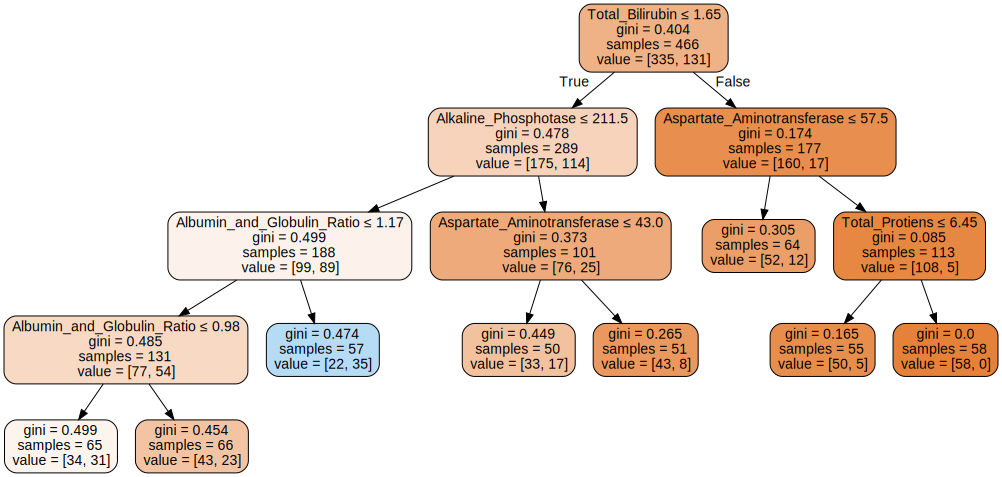

In [469]:
dot_data = tree.export_graphviz(fit, out_file=None, 
                     feature_names=X_train.columns,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Para demostrar que entendemos los parametros que vienen en cada nodo (en cada recuadro) los vamos a calcular "manualmente" para el nodo que se deriva de False en el nodo raiz (el de color naranja claro, el que tiene como parametros: gini = 0.478 , samples = 289 , value = [175, 114])

samples = 289

In [470]:
df = Data_Train.loc[Data_Python['Total_Bilirubin']<=1.65 , :]

In [471]:
len(df)

289

Por tanto, dado un nodo, su parametro samples indica el numero de observaciones de entrenamiento que caerian en la rama que contiene a ese nodo, si este nodo fuera el nodo terminal de la rama. En el caso escogido seria la rama definida por Total_Bilirubin ≤ 1.65.

 value = [175, 114]

In [472]:
len(df.loc[df['Y'] == 0 , ])

175

In [473]:
len(df.loc[df['Y'] == 1 , ])

114

Por tanto, dado un nodo, su parametro values es un vector con las frecuencias de las categorias de la variable respuesta (Y) para las observaciones de train que caerian en la rama que contiene a ese nodo, si este nodo fuera el nodo terminal de la rama.

gini = 0.478

In [474]:
p0 = len(df.loc[df['Y'] == 0 , ])/len(df)
p1 = len(df.loc[df['Y'] == 1 , ])/len(df)

In [475]:
p0*(1-p0) + p1*(1-p1)

0.4777241651800146

Por tanto, dado un nodo del arbol, el parametro gini indica el indice de gini para las observaciones de train que caerian en rama  que contiene a dicho nodo, si este nodo fuera el nodo terminal de dicha rama.

### Validación simple con función de validacion propia y funcion Classification Tree de `sklearn`

In [476]:
def Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test) :

    ##########################

    from joblib import Parallel, delayed
    import multiprocessing

    n_jobs  = multiprocessing.cpu_count()

    ##########################

    Classification_Tree_sklearn =  sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=40, min_samples_leaf=50,  max_depth=None,  ccp_alpha=0, random_state=666)
    ##########################

    def prediction(i, Data_Test, X_train, Y_train ):

     x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])]

     Classification_Tree_sklearn.fit(X_train, Y_train)

     y_new_predict = Classification_Tree_sklearn.predict( [x_new] ) 
  
     return(y_new_predict)

    ##########################

    y_predictions_vector = []

    # Paralelizamos el siguiente bucle for :

    # for i in  range(0, len(Data_Test)):

        # y_new_predict = prediction(i, Data_Test, X_train, Y_train )

        # y_predictions_vector.append( y_new_predict )

    
    y_predictions_vector = Parallel(n_jobs=n_jobs)( delayed(prediction)( i, Data_Test, X_train, Y_train) for i in range(0, len(Data_Test)) )

    #########################

    from itertools import chain

    y_predictions_vector = list(chain(*y_predictions_vector))

 
    TEC = sum(y_predictions_vector != Y_test)/len(Y_test)     

 
    return(y_predictions_vector , TEC)

In [477]:
y_predictions_vector , TEC_classification_tree_sklearn = Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test)

In [478]:
TEC_classification_tree_sklearn

0.3418803418803419

### Arbol de clasificación penalizado en `sklearn` :  $\alpha$ óptimo <a class="anchor" id="30"></a>

Vamos a obtener para los datos dados el $\alpha$ optimo para un arbol de clasificacion del tipo  tipo sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best',  random_state=222)

Es decir para un arbol de clasificacion en el que por defecto ccp_alpha=0, min_samples_split=2, min_samples_leaf=2

In [479]:
Classification_Tree_sklearn =  sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', ccp_alpha=0, random_state=222)

path = Classification_Tree_sklearn.cost_complexity_pruning_path(X_train, Y_train)
path

{'ccp_alphas': array([0.        , 0.00190749, 0.00190749, 0.00198085, 0.00199264,
        0.00204838, 0.00204838, 0.00208281, 0.00208792, 0.00214592,
        0.00256706, 0.00286123, 0.00286123, 0.00286123, 0.00286123,
        0.00321888, 0.00321888, 0.00321888, 0.00330839, 0.0033381 ,
        0.0033632 , 0.00339575, 0.00343348, 0.00357654, 0.00367872,
        0.00367872, 0.00375536, 0.00375687, 0.00381497, 0.00390878,
        0.00393419, 0.00394962, 0.00398529, 0.00422372, 0.00429185,
        0.0046785 , 0.00525751, 0.00530546, 0.00554939, 0.00566861,
        0.00578789, 0.00579405, 0.00633117, 0.00718679, 0.00983335,
        0.01012134, 0.01438729, 0.0419547 ]),
 'impurities': array([0.        , 0.00381497, 0.00762995, 0.01159165, 0.01557694,
        0.0196737 , 0.02786722, 0.03203284, 0.03620869, 0.03835461,
        0.04862283, 0.05148406, 0.05720652, 0.06006775, 0.06292898,
        0.06614787, 0.06936675, 0.07258564, 0.0891276 , 0.09580381,
        0.10589341, 0.10928915, 0.11272263

In [480]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [481]:
Classification_Tree_sklearn_vector = []

for ccp_alpha in ccp_alphas:
    
    Classification_Tree_sklearn = DecisionTreeClassifier(ccp_alpha=ccp_alpha, criterion='gini', splitter='best', random_state=222)
    
    Classification_Tree_sklearn.fit(X_train, Y_train)

    Classification_Tree_sklearn_vector.append(Classification_Tree_sklearn)

In [482]:
from sklearn.metrics import accuracy_score

In [483]:
acc_scores = [accuracy_score(Y_test, Classification_Tree_sklearn.predict(X_test)) for Classification_Tree_sklearn in Classification_Tree_sklearn_vector]

ramas = [Classification_Tree_sklearn.get_n_leaves() for Classification_Tree_sklearn in Classification_Tree_sklearn_vector]

Text(0, 0.5, 'score (TAC = 1 - TEC)')

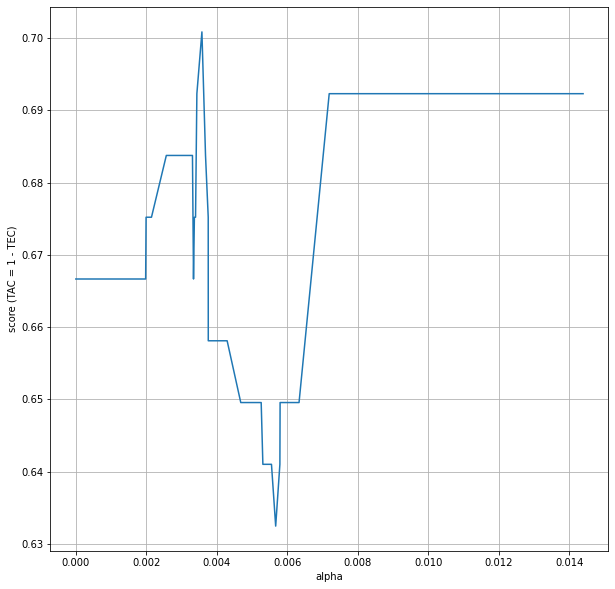

In [484]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,  10))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("alpha")
plt.ylabel("score (TAC = 1 - TEC)")

In [485]:
alpha_score_df = pd.DataFrame({'alpha':ccp_alphas, 'score (TAC = 1-TEC)': acc_scores , 'ramas': ramas})

In [486]:
alpha_score_df_sorted = alpha_score_df.sort_values(by=["score (TAC = 1-TEC)"], ascending=False).reset_index(drop=False)
alpha_score_df_sorted['TEC']= 1 - alpha_score_df_sorted['score (TAC = 1-TEC)']

In [487]:
alpha_score_df_sorted.head(10)

,index,alpha,score (TAC = 1-TEC),ramas,TEC
0,23,0.003577,0.700855,47,0.299145
1,47,0.041955,0.692308,1,0.307692
2,46,0.014387,0.692308,2,0.307692
3,45,0.010121,0.692308,3,0.307692
4,44,0.009833,0.692308,4,0.307692
5,43,0.007187,0.692308,5,0.307692
6,22,0.003433,0.692308,48,0.307692
7,14,0.002861,0.683761,63,0.316239
8,25,0.003679,0.683761,45,0.316239
9,18,0.003308,0.683761,55,0.316239


**Validacion simple con $\alpha$ óptimo:**

In [488]:
def Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test) :

    ##########################

    from joblib import Parallel, delayed
    import multiprocessing

    n_jobs  = multiprocessing.cpu_count()

    ##########################

    Classification_Tree_penalized_star = sklearn.tree.DecisionTreeClassifier(ccp_alpha=alpha_score_df_sorted['alpha'][0], criterion='gini', splitter='best', random_state=222)
    ##########################

    def prediction(i, Data_Test, X_train, Y_train ):

     x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])]

     Classification_Tree_penalized_star.fit(X_train, Y_train)

     y_new_predict = Classification_Tree_penalized_star.predict( [x_new] ) 
  
     return(y_new_predict)

    ##########################

    y_predictions_vector = []

    # Paralelizamos el siguiente bucle for :

    # for i in  range(0, len(Data_Test)):

        # y_new_predict = prediction(i, Data_Test, X_train, Y_train )

        # y_predictions_vector.append( y_new_predict )

    
    y_predictions_vector = Parallel(n_jobs=n_jobs)( delayed(prediction)( i, Data_Test, X_train, Y_train) for i in range(0, len(Data_Test)) )

    #########################

    from itertools import chain

    y_predictions_vector = list(chain(*y_predictions_vector))

 
    TEC = sum(y_predictions_vector != Y_test)/len(Y_test)    

 
    return(y_predictions_vector , TEC)

In [489]:
y_predictions_vector , TEC_classification_tree_penalized_star = Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test)

In [490]:
TEC_classification_tree_penalized_star

0.29914529914529914

### Comparación final por validación simple <a class="anchor" id="31"></a>

In [491]:
[TEC_classification_tree_penalized_star , TEC_classification_tree_sklearn, TEC_classification_tree_own_function, TEC_classification_tree_Gini_own_function,]

[0.29914529914529914,
 0.3418803418803419,
 0.3076923076923077,
 0.28205128205128205]

El ranking de modelos segun validacion simple sería :

1) TEC_classification_tree_Gini_own_function


2) TEC_classification_tree_penalized_star(ccp_alpha=alpha_score_df_sorted['alpha'][0] , criterion='gini', splitter='best', random_state=222)) 


3) TEC_classification_tree_own_function


4) TEC_classification_tree_sklearn (DecisionTreeRegressor(criterion='gini', splitter='best', min_samples_split=40, min_samples_leaf=50,  max_depth=None,  ccp_alpha=0, random_state=222)  )
 

## 4.6. KNN para clasificación en `Python` <a class="anchor" id="32"></a>

### 4.6.1. KNN para clasificación: teoría  <a class="anchor" id="33"></a>

- Tenemos $\hspace{0.1cm} p \hspace{0.1cm}$ variables $\hspace{0.1cm} X=(X_1,...,X_p) \hspace{0.1cm}$ medidas en un $n$ muestra de tamaño.

- También tenemos una variable de respuesta **categórica** $\hspace{0.1cm} Y \hspace{0.1cm}$ con $\hspace{0.1cm} g \hspace{0.1cm}$ categorías que indica el grupo al que cada elemento de la muestra pertenece $ ( \hspace{0.05cm} Range(Y)=\lbrace c_1 ,..., c_g \rbrace \hspace{0.05cm})$

- Los grupos generados por $\hspace{0.1cm} Y \hspace{0.1cm}$ se denotan como $\hspace{0.1cm} \Omega_1 ,..., \Omega_g \hspace{0.15cm}$ $\hspace{ 0.15cm}( \hspace{0.1cm} y_i = c_r \hspace{0.15cm} \Leftrightarrow \hspace{0.15cm}$ $ i \in \Omega_r \hspace{0.1cm})$

El problema de clasificación supervisada consiste en, para una nueva observación de las variables $X_1,...,X_p \hspace{0.1cm}$, $\hspace{0.1cm} x_{nueva} = (x_{nueva,1}\ hspace{0.1cm},\hspace{0.1cm}x_{nuevo,2}\hspace{0.1cm},\dots,\hspace{0.1cm}x_{nuevo,p}) \hspace{0.1cm}$, predecir es $\hspace{0.1cm} Y \hspace{0.1cm}$ valor $\hspace{0.1cm} (y_{nuevo})\hspace{0.1cm}$ usando la información disponible de $\hspace{0.1cm} X_1 ,...,X_p \hspace{0.1cm}$ y $ \hspace{0.1cm} Y$

Entonces, el problema es clasificar un nuevo elemento/individuo en uno de los $\hspace{0.1cm} g \hspace{0.1cm}$ grupos generados por $\hspace{0.1cm} Y \hspace{0.1cm}$ usando la información disponible de $\hspace{0.1cm} X_1,...,X_p \hspace{0.1cm}$ y $Y$, y también $\hspace{0.1cm} x_{nuevo} = (x_{nuevo,1 }\hspace{0.1cm},\hspace{0.1cm}x_{nuevo,2}\hspace{0.1cm},\dots,\hspace{0.1cm}x_{nuevo,p}) \hspace{0.1cm}$

Tenga en cuenta que si no tenemos información sobre $\hspace{0.1cm} Y \hspace{0.1cm}$, esto sería un problema de clasificación no supervisado.

El algoritmo KNN (K-vecinos más cercanos) para la clasificación supervisada tiene los siguientes pasos:

$1. \hspace{0.15cm}$ Define una medida de **distancia** entre las observaciones de la muestra original respecto a las variables $X_1,...,X_p$ $\hspace{0.15cm} \Rightarrow \hspace{0.15cm} $ $\delta$



 $2. \hspace{0.15cm}$ Calcula las distancias entre $\hspace{0.1 cm}x_{new}\hspace{0.1 cm}$ y las observaciones iniciales $\hspace{0.1cm} \lbrace x_1,...,x_n \rbrace$ $\hspace{0.15cm} \Rightarrow \hspace{0.15cm}$ $\lbrace \hspace{0.1 cm} \delta(x_{nuevo}\hspace{0.03 cm},\hspace{0.03 cm} x_i) \hspace{0.1 cm} / \hspace{0.1 cm} i=1,...,n \hspace{0.1 cm} \rbrace$

  
 $3. \hspace{0.15cm}$ Seleccione la $\hspace{0.03 cm} k \hspace{0.03 cm}$ observación más cercana a $\hspace{0.06 cm} x_{nuevo}\hspace{0.06 cm}$ basado en $\hspace {0.05cm} \delta \hspace{0.12cm}$ $(k$ vecinos más cercanos de $x_{nuevo})$ $\hspace{0.15cm} \Rightarrow \hspace{0.15cm}$ El conjunto de estas observaciones será denotar por $KNN(x_{nuevo})$

 $4. \hspace{0.15cm}$ Calcula la proporción de estas observaciones (vecinos) que pertenecen a cada grupo $\hspace{0.15cm} \Rightarrow \hspace{0.15cm}$
 
 $\hspace{0.65cm} \Rightarrow \hspace{0.15cm}$ La proporción de $KNN$ que pertenece al grupo $\hspace{0.15cm} \Omega_r$ $\hspace{0.1cm}(Y=c_r) \hspace{0.1cm}$ será denotado por $\hspace{0.1 cm} f^{knn}_{r} $


   $$ \hspace{0.1 cm} f^{KNN(x_{new})}_{r} \hspace{0.15cm}=\hspace{0.15cm} \dfrac{ \# \hspace{0.1cm}\lbrace\hspace{0.1cm} i \in KNN(x_{new}) \hspace{0.1cm}/\hspace{0.1cm} i \in \Omega_r \hspace{0.1cm}\rbrace  }{\# \hspace{0.1cm} KNN(x_{new}) = k} \hspace{0.15cm}=\hspace{0.15cm}  \dfrac{ \# \hspace{0.1cm}\lbrace\hspace{0.1cm} i \in KNN \hspace{0.1cm}/\hspace{0.1cm} y_i = r \hspace{0.1cm}\rbrace  }{ k}$$
   


$5. \hspace{0.15cm}$ Clasifica $\hspace{0.1cm} x_{nuevo} \hspace{0.1cm}$ en ese grupo/clase $($ definido por $Y)$ más frecuente en KNN:

$\hspace{0.25cm} \hspace{0.2cm}$ $\text{If} \hspace{0.15cm} \underbrace{ f^{knn}_{s} \geqslant f^{knn}_{r} \ hspace{0.15cm},\hspace{0.15cm} \forall r = 1,...,g }_{\Omega_s \hspace{0.1cm}\text{es el grupo más frecuente en}\hspace{0.1cm} KNN } $ $\hspace{0.1cm} \hspace{0.15cm} \Rightarrow \hspace{0.15cm} x_{new} \hspace{0.1cm}$ se clasifica en $\hspace{0.1cm} \Omega_s$ $ \ hspace{0.25cm} \Rightarrow \hspace{0.15cm} \widehat{y}_{nuevo} = s \hspace{0.1cm}$

$\hspace{0.2 cm}$ En otras palabras:

$\hspace{0.6 cm} \text{If} \hspace{0.4 cm} r^* \hspace{0.05 cm}= \hspace{0.05 cm} \underset{\hspace{0.7 cm} r}{arg \hspace{ 0.1 cm} Máx.} \hspace{0.05 cm} \left(\hspace{0.1 cm} f^{KNN(x_{nuevo})}_{r} \hspace{0.1 cm}\right) \hspace{0.2 cm} \hspace{0.15cm} \Rightarrow \hspace{0.25cm} \widehat{y}_{nuevo} = r^* \hspace{0.1cm}$

### 4.6.2. Algoritmo de creación proia en `Python`  <a class="anchor" id="34"></a>

Vamos a desarrollar nuestro propio algoritmo para no depender de sklearn

In [492]:
def KNN_classification( X , Y , x_new, k, distance = "Minkowski" , q = 0, p1=0, p2=0, p3=0 ):

    
## Para paralelizar el algoritmo 

    from joblib import Parallel, delayed
    import multiprocessing

    n_jobs  = multiprocessing.cpu_count()

####################################################################################################################################################################################################################################################

    # Y, X y x_new deben ser objetos Pandas ya que luego seran convertidos a objetos Numpy automaticamente por el algoritmo
    
    # Y tiene que ser un Pandas data frame con la variable respuesta (que en este caso debe ser categorica y con categorias estandar {0,1,2,...}) 

    # X tiene que ser un Pandas data frame con los predictotres (X1,...,Xp). 

    # x_new tiene que ser un vector con una nueva observacion de los predictores. 


####################################################################################################################################################################################################################################################

    Y = Y.to_numpy()

    X = X.to_numpy() 

    x_new = x_new.to_numpy()

    X = np.concatenate((X, [x_new]), axis=0)


    distances = []

    groups_knn = []

##########################################################################################
    
    def a(Binary_Data) :

            X = Binary_Data

            a = X @ X.T

            return(a)

##########################################################################################

    def d(Binary_Data):

            X = Binary_Data

            ones_matrix = np.ones(( X.shape[0] , X.shape[1])) 

            d = (ones_matrix - X) @ (ones_matrix - X).T

            return(d)

##########################################################################################

    def alpha_py(i,j, Multiple_Categorical_Data):

        X = Multiple_Categorical_Data

        alpha = np.repeat(0, X.shape[1])

        for k in range(0, X.shape[1]) :

            if X[i-1, k] == X[j-1, k] :

                alpha[k] = 1

            else :

                alpha[k] = 0

        alpha = alpha.sum()

        return(alpha)

####################################################################################################################################################################################################################################################
    
    if distance == "Euclidean":

        def Dist_Euclidea_Python(i, j, Quantitative_Data_set): 

            Dist_Euclidea = ( ( Quantitative_Data_set[i-1, :] - Quantitative_Data_set[j-1, :] )**2 ).sum()

            Dist_Euclidea = np.sqrt(Dist_Euclidea)

            return Dist_Euclidea

    ###################################################################
           
        ## PARTE DEL CODIGO A PARALELIZAR

        #for j in range(1, len(X)):

          # distances.append( Dist_Euclidea_Python( len(X), i , X ) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Euclidea_Python)( len(X), s , X ) for s in range(1, len(X)) )
           

    ###################################################################

    if distance == "Minkowski":

        def Dist_Minkowski_Python(i,j, q , Quantitative_Data_set):

            Dist_Minkowski = ( ( ( abs( Quantitative_Data_set[i-1, :] - Quantitative_Data_set[j-1, :] ) )**q ).sum() )**(1/q)

            return Dist_Minkowski

    ###################################################################

        ## PARTE DEL CODIGO A PARALELIZAR

        # for i in range(1, len(X)):

          #  distances.append( Dist_Minkowski_Python( len(X), i , q , X) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Minkowski_Python)( len(X), s , q , X) for s in range(1, len(X)) )

    ###################################################################

    if distance == "Canberra":

        def Dist_Canberra_Python(i,j, Quantitative_Data_set):

            numerator =  abs( Quantitative_Data_set[i-1, :] - Quantitative_Data_set[j-1, :] )  

            denominator =  ( abs(Quantitative_Data_set[i-1, :]) + abs(Quantitative_Data_set[j-1, :]) )
       
            numerator=np.array([numerator], dtype=float)

            denominator=np.array([denominator], dtype=float)

            Dist_Canberra = ( np.divide( numerator , denominator , out=np.zeros_like(numerator), where=denominator!=0) ).sum()

            return Dist_Canberra

    ###################################################################

        ## PARTE DEL CODIGO A PARALELIZAR

        # for i in range(1, len(X)):

          #  distances.append( Dist_Canberra_Python( len(X), i , X) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Canberra_Python)( len(X), s , X) for s in range(1, len(X)) )
                

    ###################################################################
   
    if distance == "Pearson":

        def Dist_Pearson_Python(i, j, Quantitative_Data_set):

            Dist_Pearson = ( ( Quantitative_Data_set[i-1, ] - Quantitative_Data_set[j-1, ] )**2 / Quantitative_Data_set.var() ).sum()

            Dist_Pearson = np.sqrt(Dist_Pearson)

            return Dist_Pearson

    ###################################################################

       ## PARTE DEL CODIGO A PARALELIZAR
       
       # for i in range(1, len(X)):

        #   distances.append( Dist_Pearson_Python( len(X), i , X) )

        
        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Pearson_Python)( len(X), s , X) for s in range(1, len(X)) )

    ###################################################################
    
    if distance == "Mahalanobis":

        def Dist_Mahalanobis_Python(i, j, Quantitative_Data_set):

            # All the columns of Quantitative_Data_set must be type = 'float' or 'int' (specially not 'object'), in other case we will find 
            # dimensional problems when Python compute   x @ S_inv @ x.T

            x = (Quantitative_Data_set[i-1, :] - Quantitative_Data_set[j-1, :])

            x = np.array([x]) # necessary step to transpose a 1D array

            S_inv = np.linalg.inv( np.cov(Quantitative_Data_set , rowvar=False) ) # inverse of covariance matrix

            Dist_Maha = np.sqrt( x @ S_inv @ x.T )  # x @ S_inv @ x.T = np.matmul( np.matmul(x , S_inv) , x.T )

            

            return Dist_Maha

        
    ###################################################################

    ## PARTE DEL CODIGO A PARALELIZAR

       # for i in range(1, len(X)):

        #    distances.append( Dist_Mahalanobis_Python( len(X), i , X) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Mahalanobis_Python)( len(X), s , X) for s in range(1, len(X)) )
       

    ###################################################################
    
    if distance == "Sokal":

        a = X @ X.T
        n = X.shape[0]
        p = X.shape[1]
        ones_matrix = np.ones((n, p))
        b = (ones_matrix - X) @ X.T
        c = b.T
        d = (ones_matrix - X) @ (ones_matrix - X).T


        def Sokal_Similarity_Py(i, j):

            Sokal_Similarity = ( a[i-1 , j-1] + d[i-1 , j-1] ) / p

            return Sokal_Similarity


        def Dist_Sokal_Python(i, j, Binary_Data_set):

            dist_Sokal = np.sqrt( 2 - 2*Sokal_Similarity_Py(i,j, Binary_Data_set) )

            return dist_Sokal

    ###################################################################

    ## PARTE DEL CODIGO A PARALELIZAR

      #  for i in range(1, len(X)):

        #    distances.append( Dist_Sokal_Python( len(X), i , X) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Sokal_Python)( len(X), s , X) for s in range(1, len(X)) )

    ###################################################################
   
    if distance == "Jaccard":


        a = X @ X.T
        n = X.shape[0]
        p = X.shape[1]
        ones_matrix = np.ones((n, p))
        b = (ones_matrix - X) @ X.T
        c = b.T
        d = (ones_matrix - X) @ (ones_matrix - X).T


        def Jaccard_Similarity_Py(i, j):

            Jaccard_Similarity = a[i-1,j-1] / (a[i-1,j-1] + b[i-1,j-1] + c[i-1,j-1])
            
            return Jaccard_Similarity


        def Dist_Jaccard_Python(i, j):

            dist_Jaccard = np.sqrt( Jaccard_Similarity_Py(i,i) + Jaccard_Similarity_Py(i,i) - 2*Jaccard_Similarity_Py(i,j) )

            return dist_Jaccard

    ###################################################################

    ## PARTE DEL CODIGO A PARALELIZAR

       # for i in range(1, len(X)):

        #    distances.append( Dist_Jaccard_Python( len(X), i , X) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Jaccard_Python)( len(X), s , X) for s in range(1, len(X)) )

    ###################################################################
    
    if distance == "Matches":

        def matches_similarity_py(i, j, Multiple_Categorical_Data):

            p = Multiple_Categorical_Data.shape[1]

            matches_similarity = alpha_py(i,j, Multiple_Categorical_Data) / p

            return(matches_similarity)


        def Dist_Matches_Py(i,j, Multiple_Categorical_Data):

            Dist_Matches = np.sqrt( matches_similarity_py(i, i, Multiple_Categorical_Data) +  matches_similarity_py(j, j, Multiple_Categorical_Data) - 2*matches_similarity_py(i, j, Multiple_Categorical_Data) )

            return( Dist_Matches )

    ###################################################################

        # for i in range(1, len(X)):

          #  distances.append( Dist_Matches_Py( len(X), i , X) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Matches_Py)( len(X), s , X) for s in range(1, len(X)) )

 ##############################################################################################################################################   
   
    if distance == "Gower":

        # The data matrix X have to be order in the following way:
        # The p1 first are quantitative, the following p2 are binary categorical, and the following p3 are multiple categorical.



##########################################################################################


        def Gower_Similarity_Python(i,j, Mixed_Data_Set, p1, p2, p3):

            X = Mixed_Data_Set

   # The data matrix X have to be order in the following way:
   # The p1 first are quantitative, the following p2 are binary categorical, and the following p3 are multiple categorical.

   #####################################################################################
        
            def G(k, X):

                range = X[:,k].max() - X[:,k].min() 

                return(range)

            G_vector = np.repeat(0.5, p1)

            for r in range(0, p1):

                G_vector[r] = G(r, X)
                
      
    ##########################################################################################
    
            ones = np.repeat(1, p1)

            Quantitative_Data = X[: , 0:p1]

            Binary_Data = X[: , (p1):(p1+p2)]
            
            Multiple_Categorical_Data = X[: , (p1+p2):(p1+p2+p3) ]

    ##########################################################################################

            numerator_part_1 = ( ones - ( abs(Quantitative_Data[i-1,:] - Quantitative_Data[j-1,:]) / G_vector ) ).sum() 

            numerator_part_2 = a(Binary_Data)[i-1,j-1] + alpha_py(i,j, Multiple_Categorical_Data)

            numerator = numerator_part_1 + numerator_part_2
 
            denominator = p1 + (p2 - d(Binary_Data)[i-1,j-1]) + p3

            Similarity_Gower = numerator / denominator  

            return(Similarity_Gower)

##########################################################################################

        def Dist_Gower_Py(i, j, Mixed_Data , p1, p2, p3):

            Dist_Gower = np.sqrt( 1 - Gower_Similarity_Python(i, j, Mixed_Data , p1, p2, p3) )

            return(Dist_Gower)    

    ###################################################################

        # for i in range(1, len(X)):

            # distances.append( Dist_Gower_Py( len(X), i , X, p1, p2, p3) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_Gower_Py)( len(X), s , X, p1, p2, p3) for s in range(1, len(X)) )

##############################################################################################################################################

    if distance == "Gower-BM" :

        def GowerBM_Similarity_Python(i,j, BM_Data_Set, p2, p3):

            X = BM_Data_Set

          # The data matrix X have to be order in the following way:
          # The p2 first are binary categorical, and the following p3 are multiple categorical.

##########################################################################################
       
            Binary_Data = X[: , 0:p2]

            Multiple_Categorical_Data = X[: , (p2):(p2+p3)]
 
##########################################################################################

 
            numerator_part_2 = a(Binary_Data)[i-1,j-1] + alpha_py(i,j, Multiple_Categorical_Data)

            numerator = numerator_part_2

            denominator = (p2 - d(Binary_Data)[i-1,j-1]) + p3

            Similarity_Gower = numerator / denominator  

            return(Similarity_Gower)

##############################################################################################################################################
        
        def Dist_GowerBM_Py(i, j, BM_Data ,  p2, p3):

            Dist_Gower = np.sqrt( 1 - GowerBM_Similarity_Python(i, j, BM_Data , p2, p3) )

            return(Dist_Gower)

##############################################################################################################################################

        # for i in range(1, len(X)):

            # distances.append( Dist_GowerBM_Py( len(X), i , X, p2, p3) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_GowerBM_Py)( len(X), s , X, p2, p3) for s in range(1, len(X)) )

##############################################################################################################################################
    
    if distance == "Gower-BQ" :

        def GowerBQ_Similarity_Python(i,j, BQ_Data_Set, p1, p2):

            X = BQ_Data_Set


        # The data matrix X have to be order in the following way:
        # The p1 first are quantitative, the following p2 are binary categorical 

##########################################################################################
        
            def G(k, X):

                range = X[:,k].max() - X[:,k].min() 

                return(range)

            G_vector = np.repeat(0.5, p1)

            for r in range(0, p1):

                G_vector[r] = G(r, X)
##########################################################################################
    
            ones = np.repeat(1, p1)

            Quantitative_Data = X[: , 0:p1]

            Binary_Data = X[: , (p1):(p1+p2)]
         
 
##########################################################################################

            numerator_part_1 = ( ones - ( abs(Quantitative_Data[i-1,:] - Quantitative_Data[j-1,:]) / G_vector ) ).sum() 

            numerator_part_2 = a(Binary_Data)[i-1,j-1] 
     
            numerator = numerator_part_1 + numerator_part_2

            denominator = p1 + (p2 - d(Binary_Data)[i-1,j-1])  

            Similarity_Gower = numerator / denominator  

            return(Similarity_Gower)

###############################################################################

        def Dist_GowerBQ_Py(i, j, BQ_Data ,  p1, p2):

            Dist_Gower = np.sqrt( 1 - GowerBQ_Similarity_Python(i, j, BQ_Data , p1, p2) )

            return(Dist_Gower)

##############################################################################################################################################

        # for i in range(1, len(X)):

        # distances.append( Dist_GowerBQ_Py( len(X), i , X, p1, p2) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_GowerBQ_Py)( len(X), s , X, p1, p2) for s in range(1, len(X)) )


##############################################################################################################################################
    
    if distance == "Gower-MQ" :
        
        def GowerMQ_Similarity_Python(i,j, MQ_Data_Set, p1, p3):

            X = MQ_Data_Set

   # The data matrix X have to be order in the following way:
   # The p1 first are quantitative, the following p2 are binary categorical, and the following p3 are multiple categorical.

##########################################################################################
            
            def G(k, X):

                range = X[:,k].max() - X[:,k].min() 

                return(range)

            G_vector = np.repeat(0.5, p1)

            for r in range(0, p1):

                G_vector[r] = G(r, X)

##########################################################################################
    
            ones = np.repeat(1, p1)

            Quantitative_Data = X[: , 0:p1]
    
            Multiple_Categorical_Data = X[: , (p1):(p1+p3)]
 
    
##########################################################################################

            numerator_part_1 = ( ones - ( abs(Quantitative_Data[i-1,:] - Quantitative_Data[j-1,:]) / G_vector ) ).sum() 

            numerator_part_2 =   alpha_py(i,j, Multiple_Categorical_Data)

            numerator = numerator_part_1 + numerator_part_2

            denominator = p1 + p3

            Similarity_Gower = numerator / denominator  

            return(Similarity_Gower)



############################################################################################

        def Dist_GowerMQ_Py(i, j, MQ_Data ,  p1, p3):

                Dist_Gower = np.sqrt( 1 - GowerMQ_Similarity_Python(i, j, MQ_Data , p1, p3) )

                return(Dist_Gower)


######################################################################################################################################
        # for i in range(1, len(X)):

        # distances.append( Dist_GowerMQ_Py( len(X), i , X, p1, p3) )

        n_jobs  = multiprocessing.cpu_count()

        distances = Parallel(n_jobs=n_jobs)( delayed(Dist_GowerMQ_Py)( len(X), s , X, p1, p3) for s in range(1, len(X)) )

######################################################################################################################################

######################################################################################################################################

    distances = pd.DataFrame({'distances': distances})

    distances = distances.sort_values(by=["distances"]).reset_index(drop=False)
        
    knn = distances.iloc[0:k , :]

    for i in knn.iloc[:,0]:

        groups_knn.append(Y[i])

    unique, counts = np.unique(groups_knn , return_counts=True)

    unique_Y , counts_Y = np.unique(Y , return_counts=True)

    if len(unique) == len(unique_Y) :

        proportions_groups_knn = pd.DataFrame({'proportions_groups': counts/k, 'groups': unique_Y })
    
    elif len(unique) < len(unique_Y) :

        proportions_groups_knn = pd.DataFrame({'proportions_groups': counts/k, 'groups': unique })



    prediction_group = proportions_groups_knn.sort_values(by=["proportions_groups"], ascending=False).iloc[0,:]['groups']
                                      

    return prediction_group, proportions_groups_knn   

In [493]:
prediction_group, proportions_groups_knn  = KNN_classification( X_train , Y_train , x_new, 10 , distance = "Euclidean" )

In [494]:
prediction_group

0.0

In [495]:
proportions_groups_knn

,proportions_groups,groups
0,0.8,0
1,0.2,1


#### Validación simple con función de validación propia y función de clasificación KNN propia <a class="anchor" id="3.1"></a>

In [496]:
def Simple_Validation_Classification(distance, Data_Test, X_train, Y_train, Y_test) :

    ##########################

    from joblib import Parallel, delayed
    import multiprocessing

    n_jobs  = multiprocessing.cpu_count()

    ##########################

    ##########################

    def prediction(i, Data_Test, X_train, Y_train ):

     x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])]

     prediction_group, proportions_groups_knn  =  KNN_classification( X_train , Y_train , x_new, 10 , distance = distance )
     
     y_new_predict = prediction_group

     return(y_new_predict)

    ##########################

    y_predictions_vector = []

    # Paralelizamos el siguiente bucle for :

    # for i in  range(0, len(Data_Test)):

        # y_new_predict = prediction(i, Data_Test, X_train, Y_train )

        # y_predictions_vector.append( y_new_predict )

    
    y_predictions_vector = Parallel(n_jobs=n_jobs)( delayed(prediction)( i, Data_Test, X_train, Y_train) for i in range(0, len(Data_Test)) )

    #########################

    from itertools import chain

    TEC = 1 - sum(y_predictions_vector == Y_test)/len(Y_test)     

 
    return(y_predictions_vector , TEC)

Se va a probar el algoritmo con distancias diferentes a las que pueden usarse conn `sklearn` para asi cubrir un mayor campo.

Usando la distancia de Canberra:

In [497]:
y_predictions_vector , TEC_KNN_Canberra = Simple_Validation_Classification('Canberra', Data_Test, X_train, Y_train, Y_test)

In [498]:
TEC_KNN_Canberra

0.23931623931623935

Usando la distancia de Pearson:

In [499]:
y_predictions_vector , TEC_KNN_Pearson = Simple_Validation_Classification('Pearson', Data_Test, X_train, Y_train, Y_test)

In [500]:
TEC_KNN_Pearson

0.2991452991452992

Usando la distancia de Mahalanobis:

Ahora vamos a usar la distancia de Mhalanobis, pero teniendo especial cuidado, porque como pone dentro de la propia funcion (# All the columns of Quantitative_Data_set must be type = 'float' or 'int' (specially not 'object'), in other case we will find dimensional problems when Python compute   x @ S_inv @ x.T) todas las variables de X_train asi como x_new tienen que ser tipo float o int , y especialmente no ser tipo object, y resulta que tenemos Gender como object, luego tenemos que modificar esto para poder usar el algoritmo con la distancia de Mahalanobis.

Para hacer que todas las variables de X_train sean tipo float o int basta con cambiar a int la variable Gender que es la unica tipo object.

In [501]:
X_train.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object

In [502]:
X_train['Gender'] = X_train['Gender'].astype('int')


Pero por otro lado como x_new se define en el algoritmo de validacion como x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])] y Data_test tambien tiene variables tipo object, por lo que hay que convertirlas en tipo float o int, ya que si no x_new será tipo object y no podrá intervenir en ciertas operaciones entre arrays con Numpy , cosa que pasa en el algoritmo.   En general para quitarnos problemas siempre que se usen operaciones entre arrays con Numpy estos deberian ser tipo float o int, nunca object.

In [503]:
Data_Test.dtypes

Y                              object
Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object

In [504]:
Data_Test['Gender'] = Data_Test['Gender'].astype('int')
Data_Test['Y'] = Data_Test['Y'].astype('int')

In [505]:
y_predictions_vector , TEC_KNN_Mahalanobis = Simple_Validation_Classification('Mahalanobis', Data_Test, X_train, Y_train, Y_test)

In [506]:
TEC_KNN_Mahalanobis

0.3504273504273504

Ahora vamos a probar con la distancia de Gower, que es la ideal para conjuntos de datos de tipo mixto (que tienen por lo menos dos tipos de vairbales (cuantitativas-binarias , cuantitativas-multiclase, binarias-multiclase o cuantitativas-binarias-multiclase)).

Notese que las distancias usadas hasta el momento (Minkowski con p=1,2 (es decir, Euclidea y Manhattan), Canberra, Pearson y Mahalanobis) NO son distancias apropiadas, desde un punto de vista estadistico, para matrices de datos de tipo mixto.
La distancia mas estandarizada para este tipo de conjunto de datos es la de Gower. En este caso como tenemos un conjunto de datos de tipo cuantitativo-binario usaremos una version de la distancia de Gower adecuada para este tipo de datos.

Para ello podemos usar el parametro distance="Gower-BQ" en nuestra funcion de KNN. Pero para ello debemos hacer unas modificaciones en el data-set de predictores para que nuestra funcion pueda operar correctamente.

Por un lado tenemos que hacer que las primeras p1 variables (columnas) de X_train sean las cuantitativas, y las siguientes p2 variables las binarias. Tras esto ya podremos usar nuestra funcion KKN con la distancia de Gower para datos binarios-cuantitativos, pasandole como parametros adicionales p1 y p2.

In [507]:
X_train_rearranged = X_train.loc[ : , [  'Age', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',          # Cuantitativas (9)
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio',
    
                                         'Gender'   # Binarias (1)

                                       ]]

Como x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])]  y tambien tiene que ser un vector con el mismo orden que X_train_rearranged tenemos que reordenar Data_test del mismo modo que lo hemos hecho con X_train.

In [508]:
Data_Test_rearranged = Data_Test.loc[ : , [ 'Y' ,  # Respuesta 

                                         'Age', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',          # Cuantitativas (9)
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio',
    
                                         'Gender'   # Binarias (1)

                                       ]]

In [509]:
Data_Test_rearranged.shape

(117, 11)

In [510]:
def Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test) :

    ##########################

    from joblib import Parallel, delayed
    import multiprocessing

    n_jobs  = multiprocessing.cpu_count()

    ##########################

    ##########################

    def prediction(i, Data_Test, X_train, Y_train ):

     x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])]

     prediction_group, proportions_groups_knn  =  KNN_classification( X_train , Y_train , x_new, 10 , distance = "Gower-BQ" , p1=9 , p2=1)
     
     y_new_predict = prediction_group

     return(y_new_predict)

    ##########################

    y_predictions_vector = []

    # Paralelizamos el siguiente bucle for :

    # for i in  range(0, len(Data_Test)):

        # y_new_predict = prediction(i, Data_Test, X_train, Y_train )

        # y_predictions_vector.append( y_new_predict )

    
    y_predictions_vector = Parallel(n_jobs=n_jobs)( delayed(prediction)( i, Data_Test, X_train, Y_train) for i in range(0, len(Data_Test)) )

    #########################

    from itertools import chain

    TEC = 1 - sum(y_predictions_vector == Y_test)/len(Y_test)     

 
    return(y_predictions_vector , TEC)

In [511]:
prediction_group, proportions_groups_knn  =  KNN_classification( X=X_train_rearranged , Y=Y_train , x_new=x_new, k=10 , distance="Gower-BQ" , p1=9 , p2=1)


In [512]:
y_predictions_vector , TEC_KNN_Gower_BQ  = Simple_Validation_Classification(Data_Test_rearranged, X_train_rearranged, Y_train, Y_test)

In [513]:
TEC_KNN_Gower_BQ

0.3418803418803419

### 4.6.3. KNN para clasificación en `Python` con `sklearn`  <a class="anchor" id="35"></a>

In [514]:
import sklearn

from sklearn.neighbors import NearestNeighbors

In [515]:
## sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) 

Es recomendable ver primero la documentación de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [516]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  weights='uniform', p=2, metric='minkowski')

In [517]:
knn_classification.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [518]:
knn_classification.predict( [x_new] ) 

array([0])

In [519]:
knn_classification.predict_proba([x_new])

array([[0.8, 0.2]])

#### Validación simple con función de validación propia y función de clasificación KNN `sklearn`<a class="anchor" id="3.1"></a>

In [520]:
def Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test) :

    ##########################

    from joblib import Parallel, delayed
    import multiprocessing

    n_jobs  = multiprocessing.cpu_count()

    ##########################

    knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  weights='uniform', p=2, metric='minkowski')

    ##########################

    def prediction(i, Data_Test, X_train, Y_train ):

     x_new = Data_Test.iloc[ i , range(1, Data_Test.shape[1])]

     knn_classification.fit(X_train, Y_train)
     
     y_new_predict = knn_classification.predict( [x_new] )

     return(y_new_predict)

    ##########################

    y_predictions_vector = []

    # Paralelizamos el siguiente bucle for :

    # for i in  range(0, len(Data_Test)):

        # y_new_predict = prediction(i, Data_Test, X_train, Y_train )

        # y_predictions_vector.append( y_new_predict )

    
    y_predictions_vector = Parallel(n_jobs=n_jobs)( delayed(prediction)( i, Data_Test, X_train, Y_train) for i in range(0, len(Data_Test)) )

    #########################

    from itertools import chain

    y_predictions_vector = list(chain(*y_predictions_vector))

    TEC = 1 - sum(y_predictions_vector == Y_test)/len(Y_test)     

 
    return(y_predictions_vector , TEC)

In [521]:
y_predictions_vector , TEC_KNN_Minkowski_p_2 = Simple_Validation_Classification(Data_Test, X_train, Y_train, Y_test)

In [522]:
TEC_KNN_Minkowski_p_2

0.2991452991452992

#### Validación simple con la función de validación `sklearn` <a class="anchor" id="3.2"></a>

In [523]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  weights='uniform', p=2, metric='minkowski')

knn_classification.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [524]:
TEC_KNN_skl_Minkowski_p_2 = 1 - knn_classification.score(X_test, Y_test)

TEC_KNN_skl_Minkowski_p_2

0.2991452991452992

Usaremos ahora otras funciones de distancias:

In [525]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  weights='uniform', p=1, metric='minkowski')

knn_classification.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [526]:
TEC_skl_Minkowski_p_1 = 1 - knn_classification.score(X_test, Y_test)

TEC_skl_Minkowski_p_1

0.32478632478632474

In [527]:
knn_classification = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10 ,  weights='uniform', metric='cosine')

knn_classification.fit(X_train, Y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [528]:
TEC_skl_Coseno = 1 - knn_classification.score(X_test, Y_test)

TEC_skl_Coseno

0.2991452991452992

## 4.7. Comparación final entre árboles y KNN para clasificación por validacion simple